###Bibliotecas

In [ ]:
import pandas as pd #corr() correlação #importa a biblioteca Pandas para manipulação de dados
import numpy as np
import matplotlib.pyplot as plt #importa a biblioteca Matplotlib para criar visualizações
import seaborn as sns
#importlib_metadata
import missingno as msno

###Importação do DataFrame Atualizado

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Carregar dados de um arquivo CSV
df = pd.read_csv('/content/stock_prices_clean.csv')

# Preparação da base de dados

Conectar/importar dados

In [ ]:
import pandas as pd
import numpy as np

# Importar os dados
# Carregar dados de um arquivo CSV
df = pd.read_excel('/content/big_tech_stock_prices.xlsx')

# Verificar o tipo de dados de cada coluna
print(df.dtypes)

# Alterar tipos de dados se necessário
#df['volume'] = df['volume'].astype(int)
#df['date'] = pd.to_datetime(df['date'])

# Visualizar as primeiras linhas do dataframe
print(df.head())


stock_symbol            object
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
adj_close              float64
volume                 float64
dtype: object
  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume  
0  493729600.0  
1  601904800.0  
2  552160000.0  
3  477131200.0  
4  447610800.0  


 Identificar e Gerenciar Valores Nulos

In [ ]:
#valores nulos
print(df.isnull().sum())

#Remover linhas com valores nulos
#df.dropna(inplace=True)

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
company         0
prince_range    0
daily_return    1
dtype: int64


Identificar e Gerenciar Valores Duplicados

In [ ]:
# Verificar duplicados
print(df.duplicated().sum())

# Contar o número de linhas duplicadas
num_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicados}")

# Visualizar as linhas duplicadas
duplicados = df[df.duplicated()]
print("Linhas duplicadas:")
print(duplicados)

# Visualizar as primeiras ocorrências e suas duplicatas
duplicados_detalhados = df[df.duplicated(keep=False)]
print("Primeiras ocorrências e suas duplicatas:")
print(duplicados_detalhados) #print(duplicados_detalhados.head())

# Remover todas as linhas duplicadas (mantendo apenas a primeira ocorrência)
df_sem_duplicados = df.drop_duplicates() #contém todas as linhas únicas do DataFrame original df

# Verificar se as linhas duplicadas foram removidas
print(df_sem_duplicados.duplicated().sum())
print(df_sem_duplicados.head())

#Atualizar o DataFrame original
df = df.drop_duplicates()
print("DataFrame após remover duplicatas (mantendo a primeira ocorrência):")
print(df.head())

# Verificar o DataFrame após remover duplicatas
print(f"Forma após remover duplicatas: {df_sem_duplicados.shape}") #dataframe com duplicada removida
print(f"Forma após remover duplicatas: {df.shape}") #dataframe original, contendo duplicada

#renomear dataframe com nome do dataframe sem duplicatas
#df_sem_duplicados.name = df.name

1
Número de linhas duplicadas: 1
Linhas duplicadas:
      stock_symbol       date        open    high    low   close  adj_close  \
45088         TSLA 2022-12-29  120.389999  123.57  117.5  121.82     121.82   

            volume  
45088  221923300.0  
Primeiras ocorrências e suas duplicatas:
      stock_symbol       date        open    high    low   close  adj_close  \
45087         TSLA 2022-12-29  120.389999  123.57  117.5  121.82     121.82   
45088         TSLA 2022-12-29  120.389999  123.57  117.5  121.82     121.82   

            volume  
45087  221923300.0  
45088  221923300.0  
      stock_symbol       date        open    high    low   close  adj_close  \
45087         TSLA 2022-12-29  120.389999  123.57  117.5  121.82     121.82   
45088         TSLA 2022-12-29  120.389999  123.57  117.5  121.82     121.82   

            volume  
45087  221923300.0  
45088  221923300.0  
0


Unir Tabelas

In [ ]:
#unir a tabela Bigtechstock_prices com a tabela Bigtechcompanies

#importar df companies
df_companies = pd.read_csv('/content/big_tech_companies.csv')

#join
df = pd.merge(df, df_companies, on='stock_symbol', how='inner')
print(df.head())

  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume     company  
0  493729600.0  Apple Inc.  
1  601904800.0  Apple Inc.  
2  552160000.0  Apple Inc.  
3  477131200.0  Apple Inc.  
4  447610800.0  Apple Inc.  


Criar Novas Variáveis

In [ ]:
#nova variável 'prince_range' = diferença entre 'high' e 'low' (prince =! price)
df['prince_range'] = df['high'] - df['low']
print(df.head())

#nova variável 'daily_return' = variação percentual de adj_close (preço de fechamento ajustado)
df['daily_return'] = df['adj_close'].pct_change()
print(df.head())

  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume     company  prince_range  
0  493729600.0  Apple Inc.      0.075714  
1  601904800.0  Apple Inc.      0.083572  
2  552160000.0  Apple Inc.      0.160000  
3  477131200.0  Apple Inc.      0.105358  
4  447610800.0  Apple Inc.      0.105000  
  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-0

In [ ]:
# Lista com a nova ordem das colunas
nova_ordem = ['stock_symbol', 'company', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

# Reordenar as colunas
#df_merged = df_merged[nova_ordem]

# Verificar o resultado
#print(df_merged.head())

  stock_symbol     company       date      open      high       low     close  \
0         AAPL  Apple Inc. 2010-01-04  7.622500  7.660714  7.585000  7.643214   
1         AAPL  Apple Inc. 2010-01-05  7.664286  7.699643  7.616071  7.656429   
2         AAPL  Apple Inc. 2010-01-06  7.656429  7.686786  7.526786  7.534643   
3         AAPL  Apple Inc. 2010-01-07  7.562500  7.571429  7.466071  7.520714   
4         AAPL  Apple Inc. 2010-01-08  7.510714  7.571429  7.466429  7.570714   

   adj_close       volume  
0   6.515213  493729600.0  
1   6.526476  601904800.0  
2   6.422664  552160000.0  
3   6.410790  477131200.0  
4   6.453412  447610800.0  


In [ ]:
#formato do dataframe
forma_df = df.shape
print(f"Nº de linhas: {forma_df[0]}")
print(f"Nº de colunas: {forma_df[1]}")

print(df.dtypes)
print(df.head())

#número de linhas e colunas
print(f"Número de linhas: {forma_df[0]}")
print(f"Número de colunas: {forma_df[1]}")

Nº de linhas: 45088
Nº de colunas: 11
stock_symbol            object
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
adj_close              float64
volume                 float64
company                 object
prince_range           float64
daily_return           float64
dtype: object
  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume     company  prince_range  daily_return  
0  493729600.0  Apple Inc.      0.075714           NaN  
1  601904800

In [ ]:
# Lista com a nova ordem das colunas
nova_ordem = ['stock_symbol', 'company', 'date', 'open', 'high', 'low', 'price_range', 'close', 'adj_close', 'daily_return' , 'volume']

# Reordenar as colunas
df = df[nova_ordem]

# Verificar o resultado
print(df.head())

  stock_symbol     company       date      open      high       low  \
0         AAPL  Apple Inc. 2010-01-04  7.622500  7.660714  7.585000   
1         AAPL  Apple Inc. 2010-01-05  7.664286  7.699643  7.616071   
2         AAPL  Apple Inc. 2010-01-06  7.656429  7.686786  7.526786   
3         AAPL  Apple Inc. 2010-01-07  7.562500  7.571429  7.466071   
4         AAPL  Apple Inc. 2010-01-08  7.510714  7.571429  7.466429   

   price_range     close  adj_close  daily_return       volume  
0     0.075714  7.643214   6.515213           NaN  493729600.0  
1     0.083572  7.656429   6.526476      0.001729  601904800.0  
2     0.160000  7.534643   6.422664     -0.015906  552160000.0  
3     0.105358  7.520714   6.410790     -0.001849  477131200.0  
4     0.105000  7.570714   6.453412      0.006648  447610800.0  


In [ ]:
#renomear prince_range para price_range
df['price_range'] = df['prince_range']
df.drop('prince_range', axis=1, inplace=True)

Construir Tabelas Auxiliares

In [ ]:
# Estatísticas descritivas para cada 'stock_symbol'
tabela_auxiliar = df.groupby('stock_symbol').describe()
print(tabela_auxiliar)

              date                                                      \
             count                           mean                  min   
stock_symbol                                                             
AAPL          3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
ADBE          3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
AMZN          3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
CRM           3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
CSCO          3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
GOOGL         3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
IBM           3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
INTC          3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
META          2688  2017-09-21 03:59:27.857142784  2012-05-18 00:00:00   
MSFT          3271  2016-07-01 19:28:22.598593792  2010-01-04 00:00:00   
NFLX          3271  2016-07-01 19:28:2

Identificar e Gerenciar Dados Discrepantes em Variáveis Numéricas

In [ ]:
#identificar outliers  na coluna 'close' com método do desvio padrão
mean = df['close'].mean()
std = df['close'].std()
outliers = df[(df['close'] < (mean - 3 * std)) | (df['close'] > (mean + 3 * std))]
print(outliers)

# Remover outliers
#df = df[(df['close'] >= (mean - 3 * std)) & (df['close'] <= (mean + 3 * std))]
#print(df)

      stock_symbol      company       date        open        high  \
5895          ADBE   Adobe Inc. 2020-06-08  391.000000  398.100006   
5896          ADBE   Adobe Inc. 2020-06-09  397.029999  402.309998   
5897          ADBE   Adobe Inc. 2020-06-10  399.589996  409.980011   
5899          ADBE   Adobe Inc. 2020-06-12  409.299988  411.720001   
5900          ADBE   Adobe Inc. 2020-06-15  398.799988  406.109985   
...            ...          ...        ...         ...         ...   
44795         TSLA  Tesla, Inc. 2021-11-01  381.666656  403.250000   
44797         TSLA  Tesla, Inc. 2021-11-03  392.443329  405.130005   
44798         TSLA  Tesla, Inc. 2021-11-04  411.470001  414.496674   
44799         TSLA  Tesla, Inc. 2021-11-05  409.333344  413.290009   
44838         TSLA  Tesla, Inc. 2022-01-03  382.583344  400.356659   

              low       close   adj_close  daily_return       volume  \
5895   385.839996  397.779999  397.779999      0.012420    2593000.0   
5896   394.1499

Identificar e Gerir Dados Discrepantes em Variáveis Categóricas

In [ ]:
# Verificar valores únicos na coluna 'stock_symbol'
print(df_merged['stock_symbol'].unique())

['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']


Identificar e Manejar Dados Fora Do Alcance Da Análise

In [ ]:
#garantir que a coluna 'volume' não tenha valores não negativos
df_merged = df_merged[df_merged['volume'] >= 0]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   company       45088 non-null  object 
 2   date          45088 non-null  object 
 3   open          45088 non-null  float64
 4   high          45088 non-null  float64
 5   low           45088 non-null  float64
 6   price_range   45088 non-null  float64
 7   close         45088 non-null  float64
 8   adj_close     45088 non-null  float64
 9   daily_return  45087 non-null  float64
 10  volume        45088 non-null  float64
dtypes: float64(8), object(3)
memory usage: 3.8+ MB
None


Salvar o DataFrame atualizado

In [ ]:
#salvar novo DataFrame em um arquivo CSV
df.to_csv('/content/stock_prices_clean.csv', index=False)

In [ ]:
df = pd.read_csv('/content/stock_prices_clean.csv')
df = pd.read_excel('/content/big_tech_stock_prices.xlsx')

In [ ]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())


  stock_symbol     company       date      open      high       low  \
0         AAPL  Apple Inc. 2010-01-04  7.622500  7.660714  7.585000   
1         AAPL  Apple Inc. 2010-01-05  7.664286  7.699643  7.616071   
2         AAPL  Apple Inc. 2010-01-06  7.656429  7.686786  7.526786   
3         AAPL  Apple Inc. 2010-01-07  7.562500  7.571429  7.466071   
4         AAPL  Apple Inc. 2010-01-08  7.510714  7.571429  7.466429   

   price_range     close  adj_close  daily_return       volume  
0     0.075714  7.643214   6.515213           NaN  493729600.0  
1     0.083572  7.656429   6.526476      0.001729  601904800.0  
2     0.160000  7.534643   6.422664     -0.015906  552160000.0  
3     0.105358  7.520714   6.410790     -0.001849  477131200.0  
4     0.105000  7.570714   6.453412      0.006648  447610800.0  
(45088, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------ 

# Análise exploratória

## Dados gerais

In [ ]:
df = pd.read_csv ('/content/stock_prices_clean.csv')

In [ ]:
print(df.info())

#linhas duplicadas
num_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicados}")

#linhas/colunas
df.shape
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   company       45088 non-null  object 
 2   date          45088 non-null  object 
 3   open          45088 non-null  float64
 4   high          45088 non-null  float64
 5   low           45088 non-null  float64
 6   price_range   45088 non-null  float64
 7   close         45088 non-null  float64
 8   adj_close     45088 non-null  float64
 9   daily_return  45087 non-null  float64
 10  volume        45088 non-null  float64
dtypes: float64(8), object(3)
memory usage: 3.8+ MB
None
Número de linhas duplicadas: 0
Número de linhas: 45088
Número de colunas: 11


<Axes: >

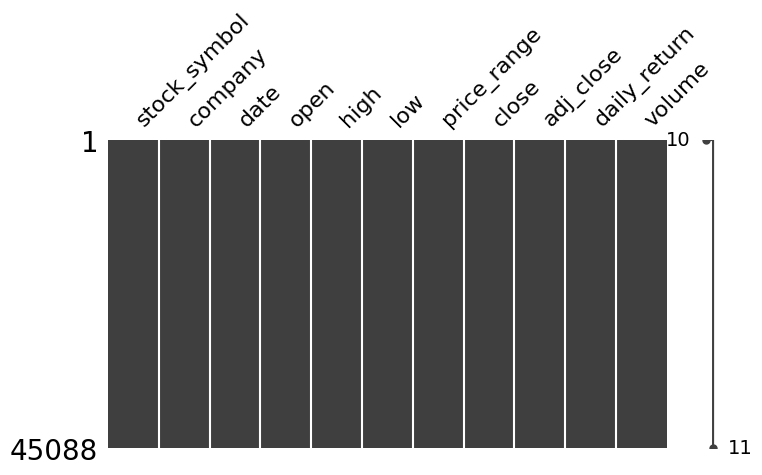

In [ ]:
#matriz de nulos
msno.matrix(df, figsize=(8,4))

<Axes: >

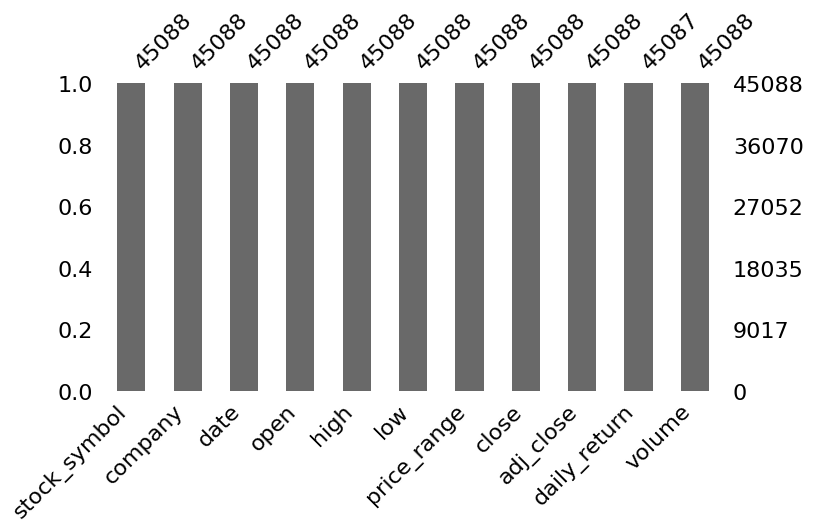

In [ ]:
#gráfico de nulos
msno.bar(df, figsize=(8,4))

## Desempenho geral de cada empresa

###Análise Descritiva

In [ ]:
#Estatísticas descritivas
#média, mediana, desvio padrão, mínimo e máximo
#dos preços de abertura, alto, baixo, diferença alto/baixo, fechamento, fechamento ajustado, variação close/adj_close e volume de negociações
df.describe()

date          open          high  \
count                          45088  45088.000000  45088.000000   
mean   2016-08-03 15:35:09.794180352     89.266584     90.369825   
min              2010-01-04 00:00:00      1.076000      1.108667   
25%              2013-05-30 00:00:00     25.670000     25.930135   
50%              2016-08-09 00:00:00     47.930000     48.459999   
75%              2019-10-21 06:00:00    128.662502    129.848900   
max              2023-01-24 00:00:00    696.280029    700.989990   
std                              NaN    101.626955    103.001073   

                low   price_range         close     adj_close  daily_return  \
count  45088.000000  45088.000000  45088.000000  45088.000000  45087.000000   
mean      88.111930      2.257896     89.271306     85.209631      0.000718   
min        0.998667      0.016667      1.053333      1.053333     -0.985428   
25%       25.360001      0.440001     25.660000     22.076433     -0.008680   
50%       47.465000      0.939995     47.970001     45.377333      0.000715   
75%      127.253945      2.323135    128.640609    113.672460      0.010760   
max      686.090027     57.790039    691.690002    691.690002      0.458604   
std      100.124399      3.633173    101.592916    100.995967      0.026423   

             volume  
count  4.508800e+04  
mean   5.297813e+07  
min    5.892000e+05  
25%    9.629425e+06  
50%    2.646315e+07  
75%    5.839768e+07  
max    1.880998e+09  
std    9.324730e+07

###Medidas de Tendência Central

Média dos Preços de Abertura para Cada Empresa:
company
Adobe Inc.                                     186.023938
Alphabet Inc.                                   49.149625
Amazon.com, Inc.                                58.937204
Apple Inc.                                      51.274171
Cisco Systems, Inc.                             33.493880
Intel Corporation                               36.481406
International Business Machines Corporation    148.427471
Meta Platforms, Inc.                           147.874275
Microsoft Corporation                          100.048490
NVIDIA Corporation                              50.560335
Netflix, Inc.                                  188.242206
Oracle Corporation                              46.242177
Salesforce, Inc.                               103.419948
Tesla, Inc.                                     58.859467
Name: open, dtype: float64


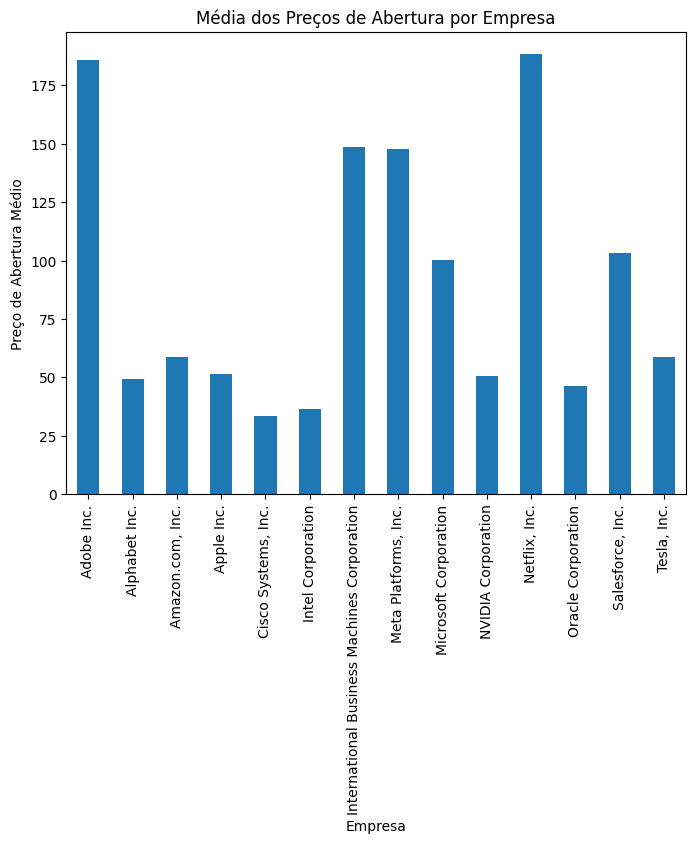

In [ ]:
#média dos preços de abertura para cada empresa
mean_open = df.groupby('company')['open'].mean() #agrupa os dados por empresa, seleciona a coluna de preços de abertura e calcula a média de 'open'
print("Média dos Preços de Abertura para Cada Empresa:")
print(mean_open)

#gráfico
mean_open.plot(kind='bar', title='Média dos Preços de Abertura por Empresa', figsize=(8, 6))
plt.xlabel('Empresa')
plt.ylabel('Preço de Abertura Médio')
plt.show()


Mediana dos Preços de Fechamento para Cada Empresa:
company
Adobe Inc.                                      97.720001
Alphabet Inc.                                   38.538502
Amazon.com, Inc.                                36.382500
Apple Inc.                                      29.812500
Cisco Systems, Inc.                             29.540001
Intel Corporation                               34.340000
International Business Machines Corporation    143.040146
Meta Platforms, Inc.                           142.065002
Microsoft Corporation                           55.700001
NVIDIA Corporation                              11.890000
Netflix, Inc.                                  110.099998
Oracle Corporation                              41.689999
Salesforce, Inc.                                76.260002
Tesla, Inc.                                     16.222334
Name: close, dtype: float64


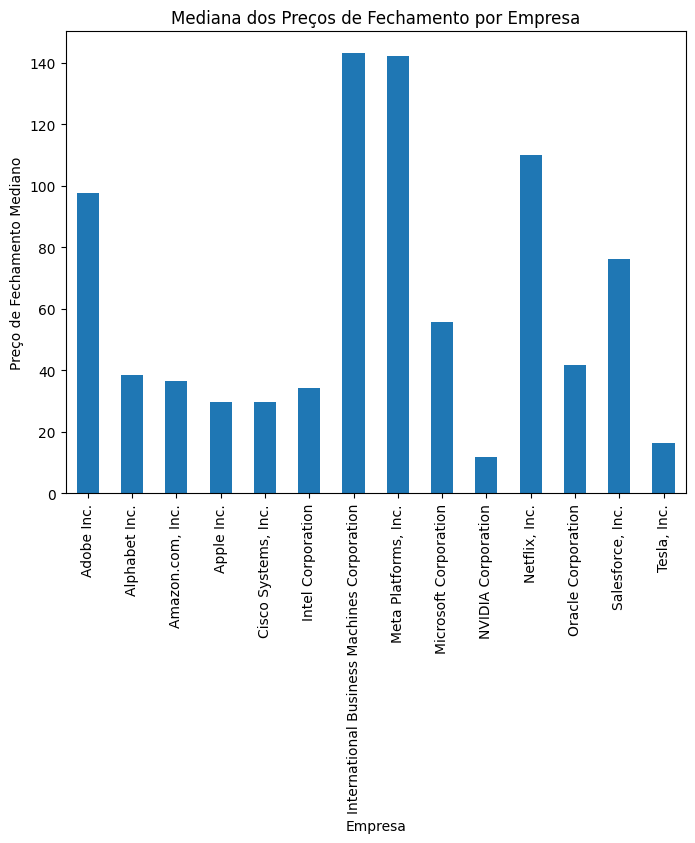

In [ ]:
#mediana dos preços de fechamento para cada empresa
median_close = df.groupby('company')['close'].median() #agrupa os dados por empresa, seleciona a coluna de preços de fechamento e calcula a mediana de 'close'
print("\nMediana dos Preços de Fechamento para Cada Empresa:")
print(median_close)

#gráfico
median_close.plot(kind='bar', title='Mediana dos Preços de Fechamento por Empresa', figsize=(8, 6))
plt.xlabel('Empresa')
plt.ylabel('Preço de Fechamento Mediano')
plt.show()


Moda dos Volumes de Negociação para Cada Empresa:
company
Adobe Inc.                                      1970900.0
Alphabet Inc.                                  30594000.0
Amazon.com, Inc.                               58272000.0
Apple Inc.                                     90956700.0
Cisco Systems, Inc.                            16717800.0
Intel Corporation                              17830400.0
International Business Machines Corporation     2590001.0
Meta Platforms, Inc.                           10793800.0
Microsoft Corporation                          20818000.0
NVIDIA Corporation                             23381200.0
Netflix, Inc.                                   3732200.0
Oracle Corporation                              6566700.0
Salesforce, Inc.                                2777100.0
Tesla, Inc.                                     9922500.0
Name: volume, dtype: float64


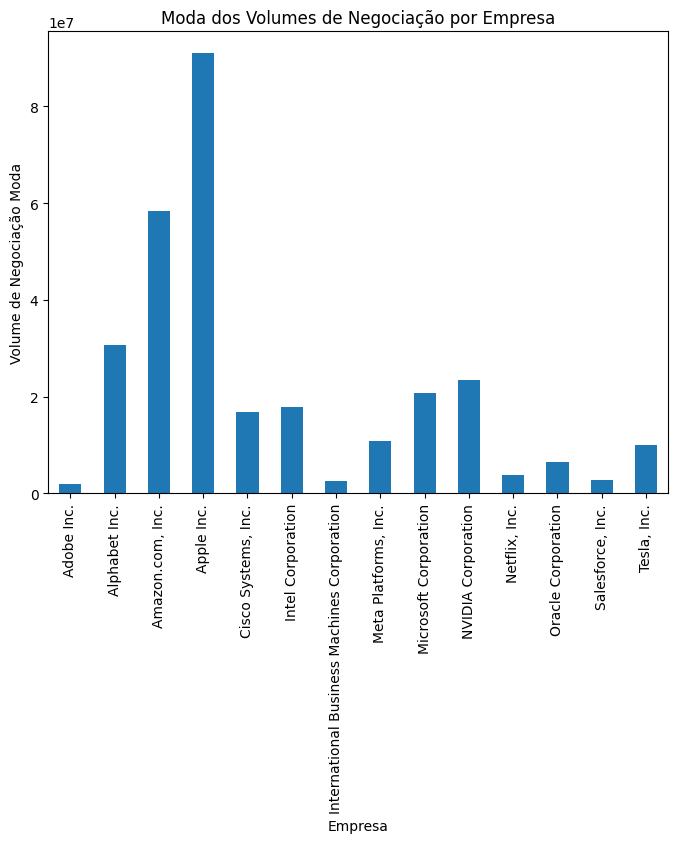

In [ ]:
#moda dos volumes de ações para cada empresa
mode_volume = df.groupby('company')['volume'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#agrupa os dados por empresa, seleciona a coluna de volume e calcula a moda de 'volume'
print("\nModa dos Volumes de Negociação para Cada Empresa:")
print(mode_volume)

#gráfico
mode_volume.plot(kind='bar', title='Moda dos Volumes de Negociação por Empresa', figsize=(8, 6))
plt.xlabel('Empresa')
plt.ylabel('Volume de Negociação Moda')
plt.show()

###Medidas de Dispersão

In [ ]:
#variância dos preços de abertura para cada empresa
variance_open = df.groupby('company')['open'].var() #agrupa os dados por empresa, seleciona a coluna de preços de abertura e calcula  a variância  de 'open'
print("Variância dos Preços de Abertura para Cada Empresa:")
print(variance_open)

Variância dos Preços de Abertura para Cada Empresa:
company
Adobe Inc.                                     30123.807865
Alphabet Inc.                                   1282.342887
Amazon.com, Inc.                                2930.988801
Apple Inc.                                      2238.852002
Cisco Systems, Inc.                              159.867878
Intel Corporation                                166.733539
International Business Machines Corporation      575.921155
Meta Platforms, Inc.                            7522.900473
Microsoft Corporation                           7784.181398
NVIDIA Corporation                              4835.628516
Netflix, Inc.                                  32029.352811
Oracle Corporation                               284.401014
Salesforce, Inc.                                5081.963775
Tesla, Inc.                                     9154.142307
Name: open, dtype: float64



Desvio Padrão dos Preços de Fechamento para Cada Empresa:
company
Adobe Inc.                                     173.466083
Alphabet Inc.                                   35.803048
Amazon.com, Inc.                                54.085034
Apple Inc.                                      47.344344
Cisco Systems, Inc.                             12.646739
Intel Corporation                               12.912266
International Business Machines Corporation     24.016125
Meta Platforms, Inc.                            86.763257
Microsoft Corporation                           88.234393
NVIDIA Corporation                              69.480441
Netflix, Inc.                                  178.877130
Oracle Corporation                              16.863128
Salesforce, Inc.                                71.213839
Tesla, Inc.                                     95.544413
Name: close, dtype: float64


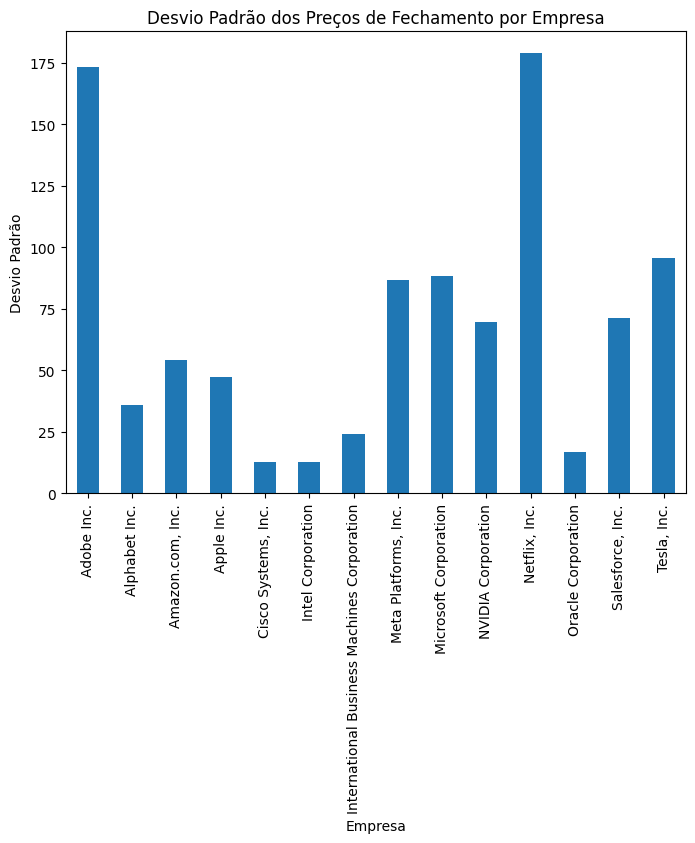

In [ ]:
#desvio padrão dos preços de fechamento para cada empresa
std_close = df.groupby('company')['close'].std() #agrupa os dados por empresa, seleciona a coluna de preços de fechamento e calcula o desvio padrão de 'close'
print("\nDesvio Padrão dos Preços de Fechamento para Cada Empresa:")
print(std_close)

#gráfico
std_close.plot(kind='bar', title='Desvio Padrão dos Preços de Fechamento por Empresa', figsize=(8, 6))
plt.xlabel('Empresa')
plt.ylabel('Desvio Padrão')
plt.show()


Amplitude dos Preços de Fechamento para Cada Empresa:
company
Adobe Inc.                                     665.679994
Alphabet Inc.                                  138.925838
Amazon.com, Inc.                               181.139996
Apple Inc.                                     175.151066
Cisco Systems, Inc.                             50.229999
Intel Corporation                               50.800001
International Business Machines Corporation    115.707458
Meta Platforms, Inc.                           364.449993
Microsoft Corporation                          320.099985
NVIDIA Corporation                             331.540010
Netflix, Inc.                                  684.671431
Oracle Corporation                              82.190003
Salesforce, Inc.                               294.439991
Tesla, Inc.                                    408.916668
dtype: float64


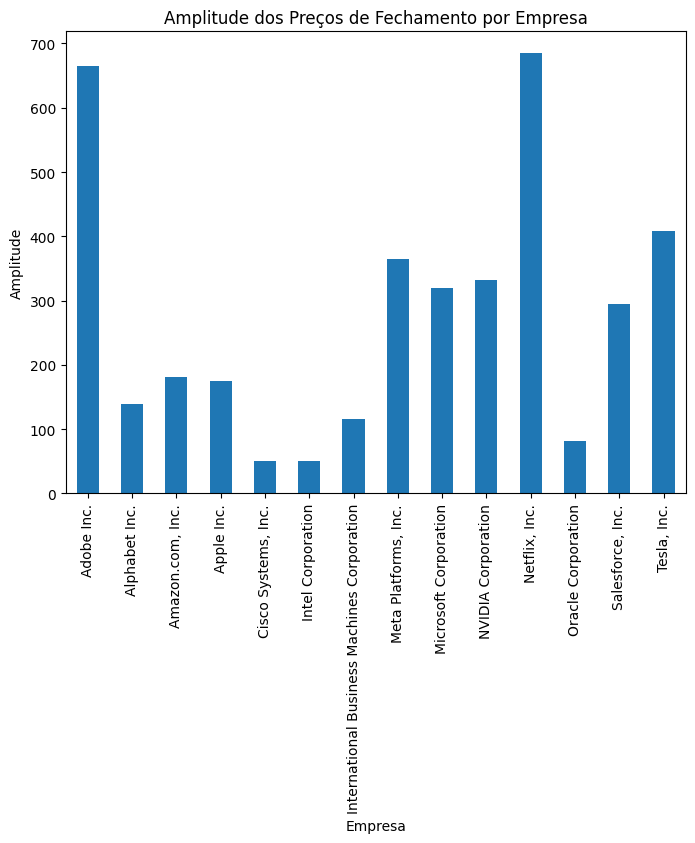

In [ ]:
#amplitude (range) dos preços de fechamento para cada empresa
range_close = df.groupby('company').apply(lambda x: x['close'].max() - x['close'].min())
#agrupa os dados por empresa e calcula  a amplitude de 'close'
print("\nAmplitude dos Preços de Fechamento para Cada Empresa:")
print(range_close)

#gráfico
range_close.plot(kind='bar', title='Amplitude dos Preços de Fechamento por Empresa', figsize=(8, 6))
plt.xlabel('Empresa')
plt.ylabel('Amplitude')
plt.show()

###Quartis


Quartis dos Preços Ajustados de Fechamento para Cada Empresa:
                                                   0.25        0.50  \
company                                                               
Adobe Inc.                                    42.910000   97.720001   
Alphabet Inc.                                 20.289915   38.538502   
Amazon.com, Inc.                              13.326250   36.382500   
Apple Inc.                                    16.625739   27.385101   
Cisco Systems, Inc.                           16.726562   23.570276   
Intel Corporation                             18.506160   28.492294   
International Business Machines Corporation  105.861477  113.695961   
Meta Platforms, Inc.                          77.980000  142.065002   
Microsoft Corporation                         25.954647   50.052330   
NVIDIA Corporation                             3.718987   11.685297   
Netflix, Inc.                                 34.662142  110.099998   
Oracle Corpora

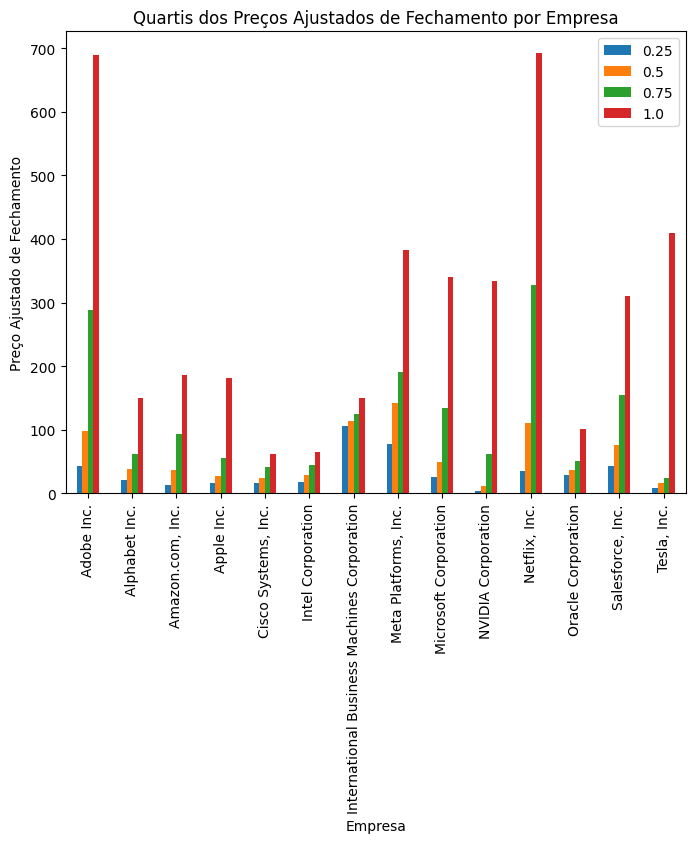

In [ ]:
#quartis dos preços ajustados de fechamento para cada empresa
quartiles_adj_close = df.groupby('company')['adj_close'].quantile([0.25, 0.5, 0.75, 1]).unstack()
#agrupa os dados por empresa, seleciona a coluna de preços ajustados de fechamento e calcula os quartis (25%, 50%, 75%, 100%) de 'adj_close'
print("\nQuartis dos Preços Ajustados de Fechamento para Cada Empresa:")
print(quartiles_adj_close)

#gráfico
quartiles_adj_close.plot(kind='bar', title='Quartis dos Preços Ajustados de Fechamento por Empresa', figsize=(8, 6))
plt.xlabel('Empresa')
plt.ylabel('Preço Ajustado de Fechamento')
plt.show()

##Comportamento dos dados de ações ao longo do tempo

###Análise Temporal

In [ ]:
#date definida como o índice
df.set_index('date', inplace=True)

Tendência dos preços ajustados de fechamento (adj_close)

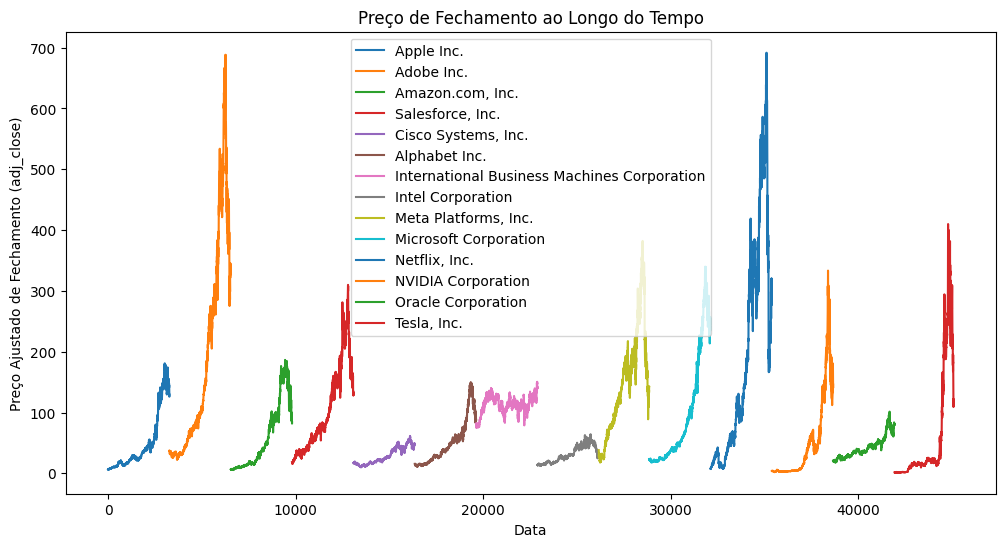

In [ ]:
#14 empresas
#tendência dos preços ajustados de fechamento (adj_close)
companies = df['company'].unique()

#preço no fechamento do mercado ao longo do tempo para cada empresa
plt.figure(figsize=(12, 6))

for company in companies:
    company_data = df[df['company'] == company]
    plt.plot(company_data.index, company_data['adj_close'], label=company)

plt.title('Preço de Fechamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado de Fechamento (adj_close)')
plt.legend()
plt.show()

Variação do preço de abertura (open) e fechamento (close) do mercado

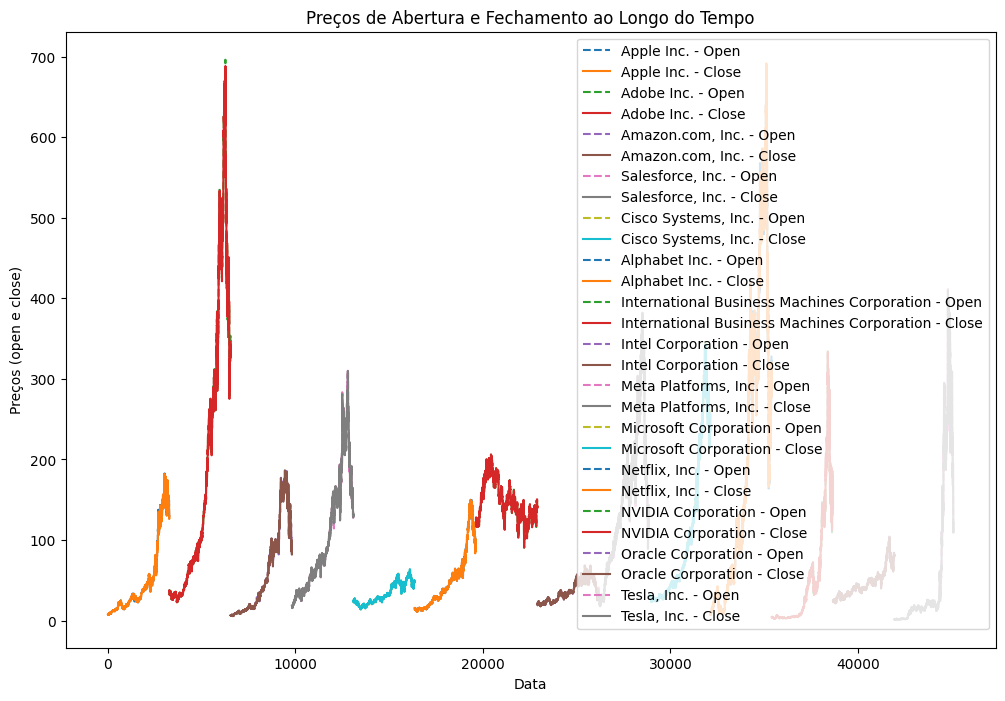

In [ ]:
#preço de abertura e fechamento ao longo do tempo para cada empresa
plt.figure(figsize=(12, 8))

for company in companies:
    company_data = df[df['company'] == company]
    plt.plot(company_data.index, company_data['open'], label=f'{company} - Open', linestyle='--')
    plt.plot(company_data.index, company_data['close'], label=f'{company} - Close')

plt.title('Preços de Abertura e Fechamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preços (open e close)')
plt.legend()
plt.show()


gráfico de dispersão dos preços de abertura vs fechamento

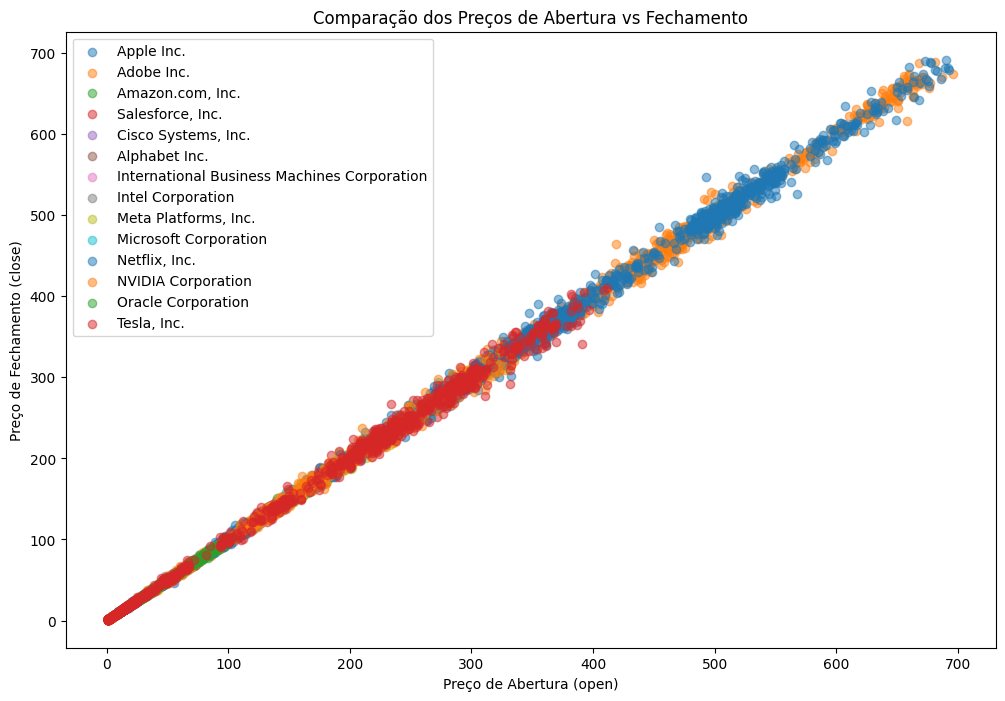

In [ ]:
plt.figure(figsize=(12, 8))

for company in companies:
    company_data = df[df['company'] == company]
    plt.scatter(company_data['open'], company_data['close'], label=company, alpha=0.5)

plt.title('Comparação dos Preços de Abertura vs Fechamento')
plt.xlabel('Preço de Abertura (open)')
plt.ylabel('Preço de Fechamento (close)')
plt.legend()
plt.show()


Volume de ações ao longo do tempo

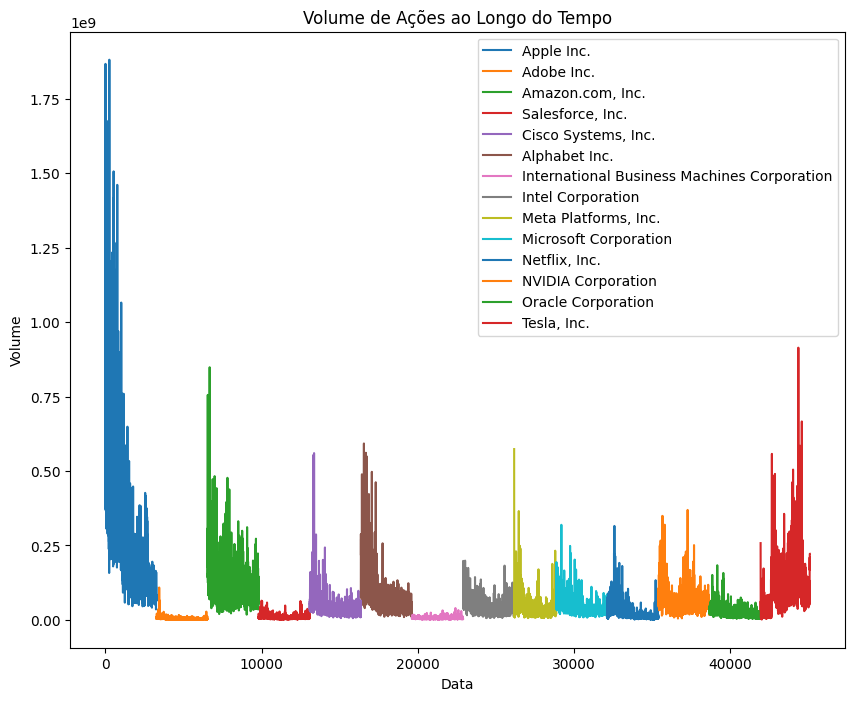

In [ ]:
plt.figure(figsize=(10, 8))

for company in companies:
    company_data = df[df['company'] == company]
    plt.plot(company_data.index, company_data['volume'], label=company)

plt.title('Volume de Ações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.show()


Retornos diários ao longo do tempo

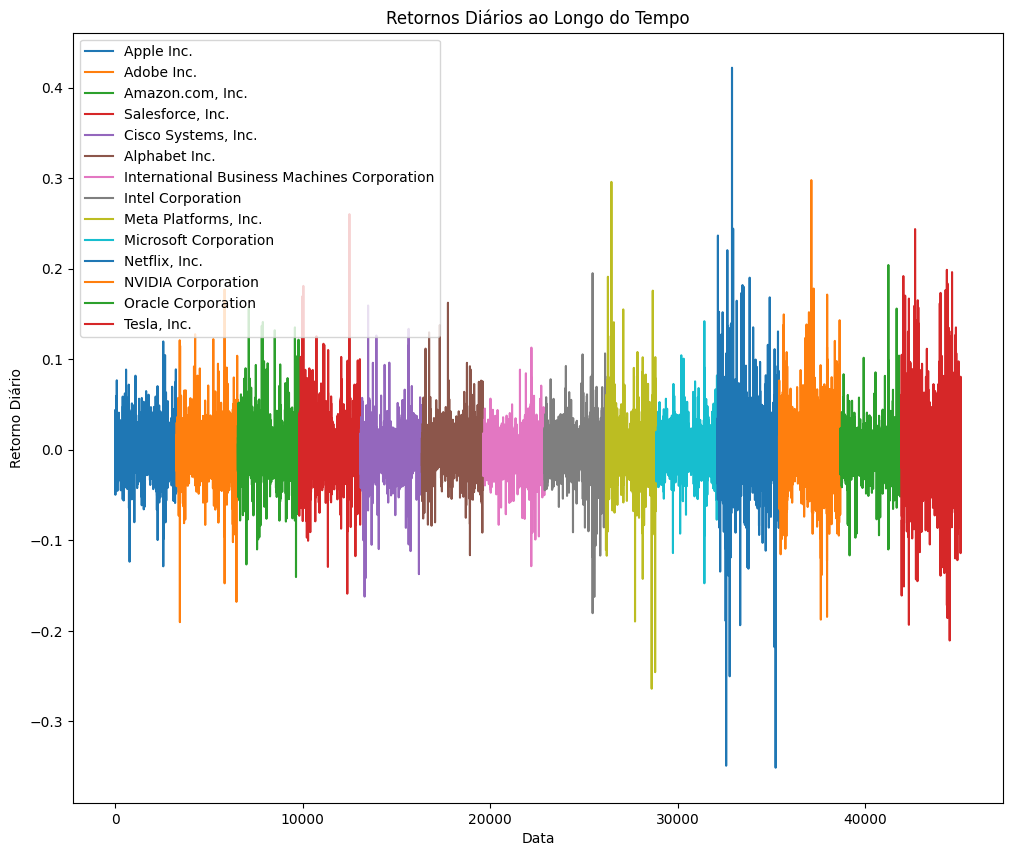

In [ ]:
plt.figure(figsize=(12, 10))

for company in companies:
    company_data = df[df['company'] == company]
    plt.plot(company_data.index, company_data['daily_return'], label=company)

plt.title('Retornos Diários ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.legend()
plt.show()


Médias móveis para identificar tendências

As médias móveis são úteis para suavizar as séries temporais e identificar tendências de longo prazo.

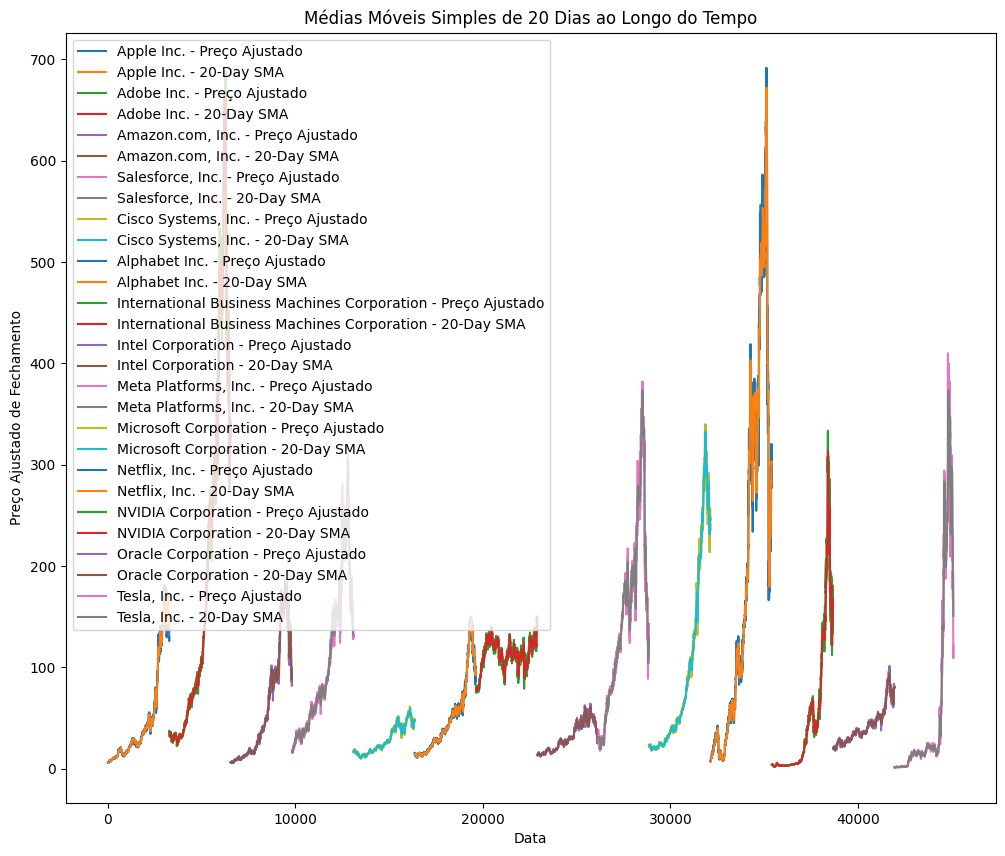

In [ ]:
#cálculo de médias móveis simples de 20 dias

#tamanho da janela para a média móvel simples
window_size = 20

plt.figure(figsize=(12, 10))

#loop através de cada empresa para calcular e plotar a média móvel simples
for company in companies:
    company_data = df[df['company'] == company].copy()  #usar .copy() para evitar o SettingWithCopyWarning (permite fazer alterações sem afetar o dataframe original)
    company_data['SMA'] = company_data['adj_close'].rolling(window=window_size).mean() #calcula a média móvel simples para adj_close
    plt.plot(company_data.index, company_data['adj_close'], label=f'{company} - Preço Ajustado')
    plt.plot(company_data.index, company_data['SMA'], label=f'{company} - {window_size}-Day SMA') #plota a média móvel simples calculada

#títulos e rótulos do gráfico
plt.title(f'Médias Móveis Simples de {window_size} Dias ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado de Fechamento')
plt.legend()
plt.show()


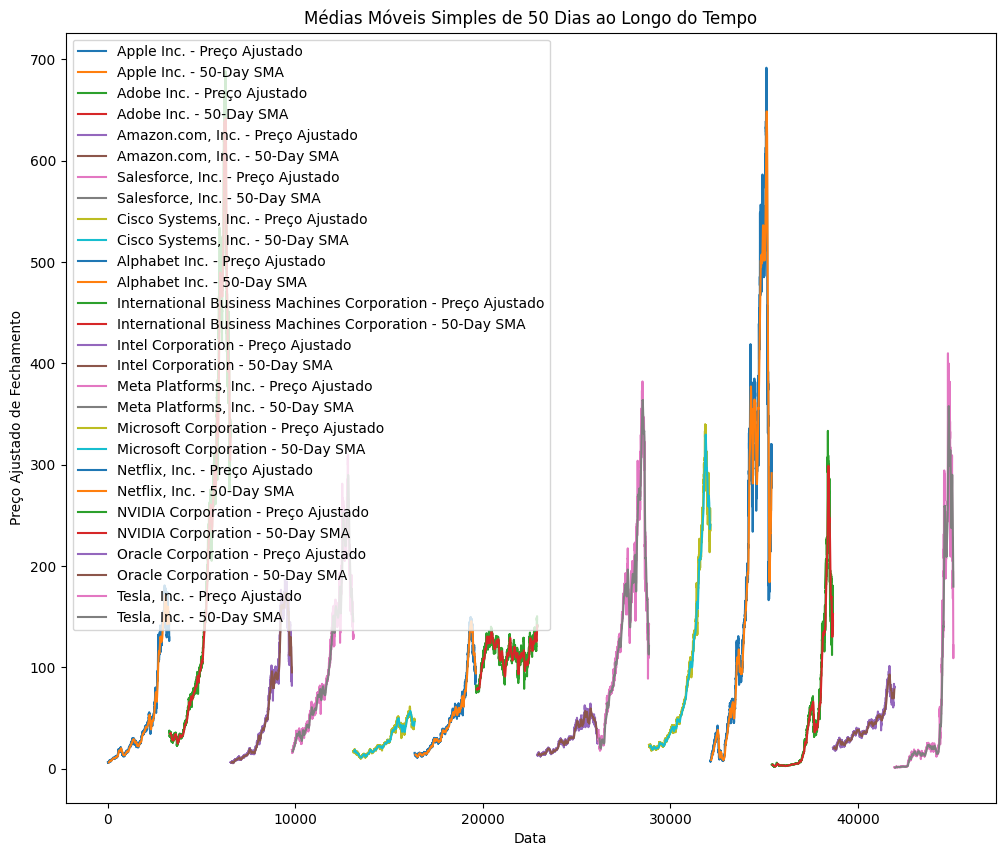

In [ ]:
#cálculo de simple moving average de 50 dias
#SMA = simple moving average

#tamanho da janela para a média móvel simples
window_size = 50

plt.figure(figsize=(12, 10))

#loop através de cada empresa para calcular e plotar a média móvel simples
for company in companies:
    company_data = df[df['company'] == company].copy()  #usar .copy() para evitar o SettingWithCopyWarning (permite fazer alterações sem afetar o dataframe original)
    company_data['SMA'] = company_data['adj_close'].rolling(window=window_size).mean() #calcula a média móvel simples para adj_close
    plt.plot(company_data.index, company_data['adj_close'], label=f'{company} - Preço Ajustado')
    plt.plot(company_data.index, company_data['SMA'], label=f'{company} - {window_size}-Day SMA') #plota a média móvel simples calculada

#títulos e rótulos do gráfico
plt.title(f'Médias Móveis Simples de {window_size} Dias ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado de Fechamento')
plt.legend()
plt.show()

## Análise de Correlação

Matriz de Correlação dos Retornos Diários:
company                                      Adobe Inc.  Alphabet Inc.  \
company                                                                  
Adobe Inc.                                     1.000000       0.576557   
Alphabet Inc.                                  0.576557       1.000000   
Amazon.com, Inc.                               0.531730       0.599524   
Apple Inc.                                     0.518865       0.564586   
Cisco Systems, Inc.                            0.474470       0.469351   
Intel Corporation                              0.497357       0.489527   
International Business Machines Corporation    0.391783       0.426360   
Meta Platforms, Inc.                           0.478035       0.542551   
Microsoft Corporation                          0.657480       0.651814   
NVIDIA Corporation                             0.545123       0.521216   
Netflix, Inc.                                  0.359847       0.36016

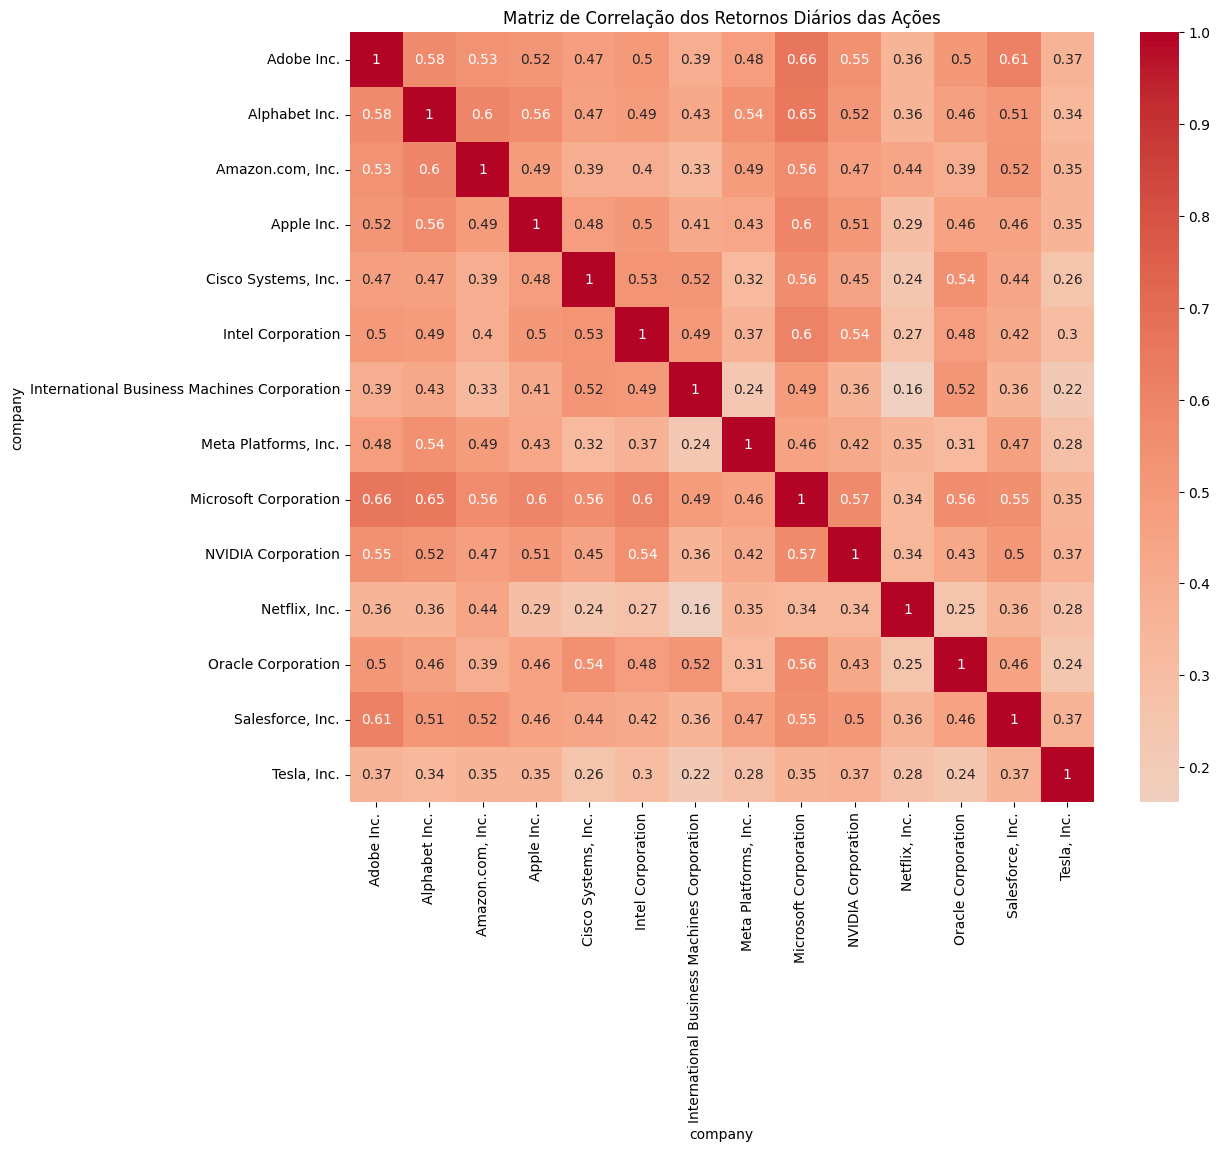

In [ ]:
#Quais são as correlações entre as ações das diferentes empresas?
#matriz de correlação entre os retornos diários (daily_return) das empresas

#tabela pivô com os retornos diários de cada empresa
pivot_table = df.pivot_table(index='date', columns='company', values='daily_return')
#cada coluna representa uma empresa e cada linha representa uma data, com os valores sendo os retornos diários

#matriz de correlação
correlation_matrix = pivot_table.corr()

print("Matriz de Correlação dos Retornos Diários:")
print(correlation_matrix)

#matriz de correlação usando um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação dos Retornos Diários das Ações')
plt.show()

Matriz de Correlação dos Preços Ajustados de Fechamento:
company                                      Adobe Inc.  Alphabet Inc.  \
company                                                                  
Adobe Inc.                                     1.000000       0.955676   
Alphabet Inc.                                  0.955676       1.000000   
Amazon.com, Inc.                               0.987418       0.943111   
Apple Inc.                                     0.927508       0.965205   
Cisco Systems, Inc.                            0.925031       0.915927   
Intel Corporation                              0.871856       0.801399   
International Business Machines Corporation    0.181050       0.291220   
Meta Platforms, Inc.                           0.935745       0.870164   
Microsoft Corporation                          0.966768       0.980889   
NVIDIA Corporation                             0.922537       0.963155   
Netflix, Inc.                                  0.953595

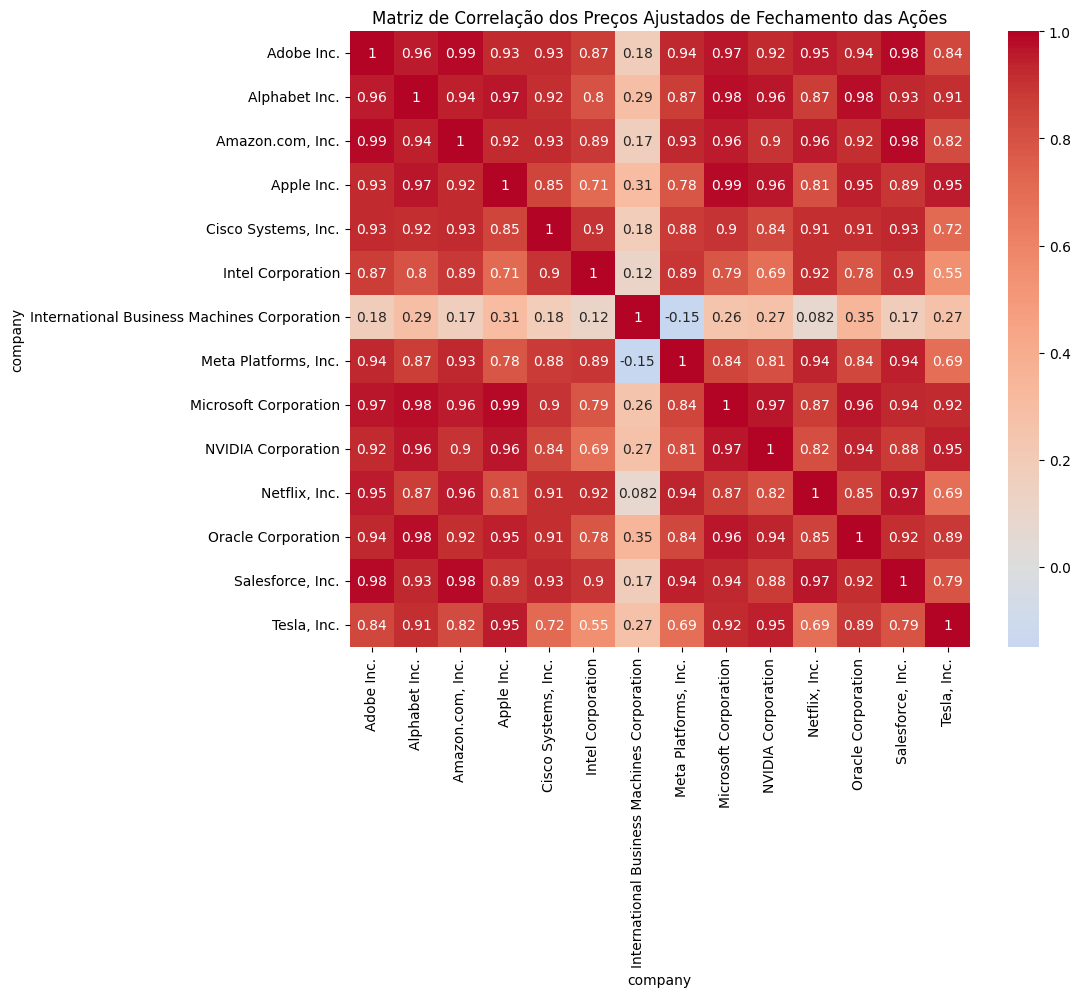

In [ ]:
#calcular a correlação de preços ajustados de fechamento (adj_close)

#tabela pivô com os preços ajustados de fechamento de cada empresa
pivot_table_adj_close = df.pivot_table(index='date', columns='company', values='adj_close')

# Calcular a matriz de correlação
correlation_matrix_adj_close = pivot_table_adj_close.corr()

print("Matriz de Correlação dos Preços Ajustados de Fechamento:")
print(correlation_matrix_adj_close)

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_adj_close, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação dos Preços Ajustados de Fechamento das Ações')
plt.show()

Matriz de Correlação dos Preços de Abertura:
company                                      Adobe Inc.  Alphabet Inc.  \
company                                                                  
Adobe Inc.                                     1.000000       0.955471   
Alphabet Inc.                                  0.955471       1.000000   
Amazon.com, Inc.                               0.987446       0.942886   
Apple Inc.                                     0.927288       0.964669   
Cisco Systems, Inc.                            0.897203       0.880018   
Intel Corporation                              0.822680       0.737450   
International Business Machines Corporation   -0.599143      -0.532242   
Meta Platforms, Inc.                           0.935676       0.869858   
Microsoft Corporation                          0.968021       0.980808   
NVIDIA Corporation                             0.922464       0.962915   
Netflix, Inc.                                  0.953469       0.868

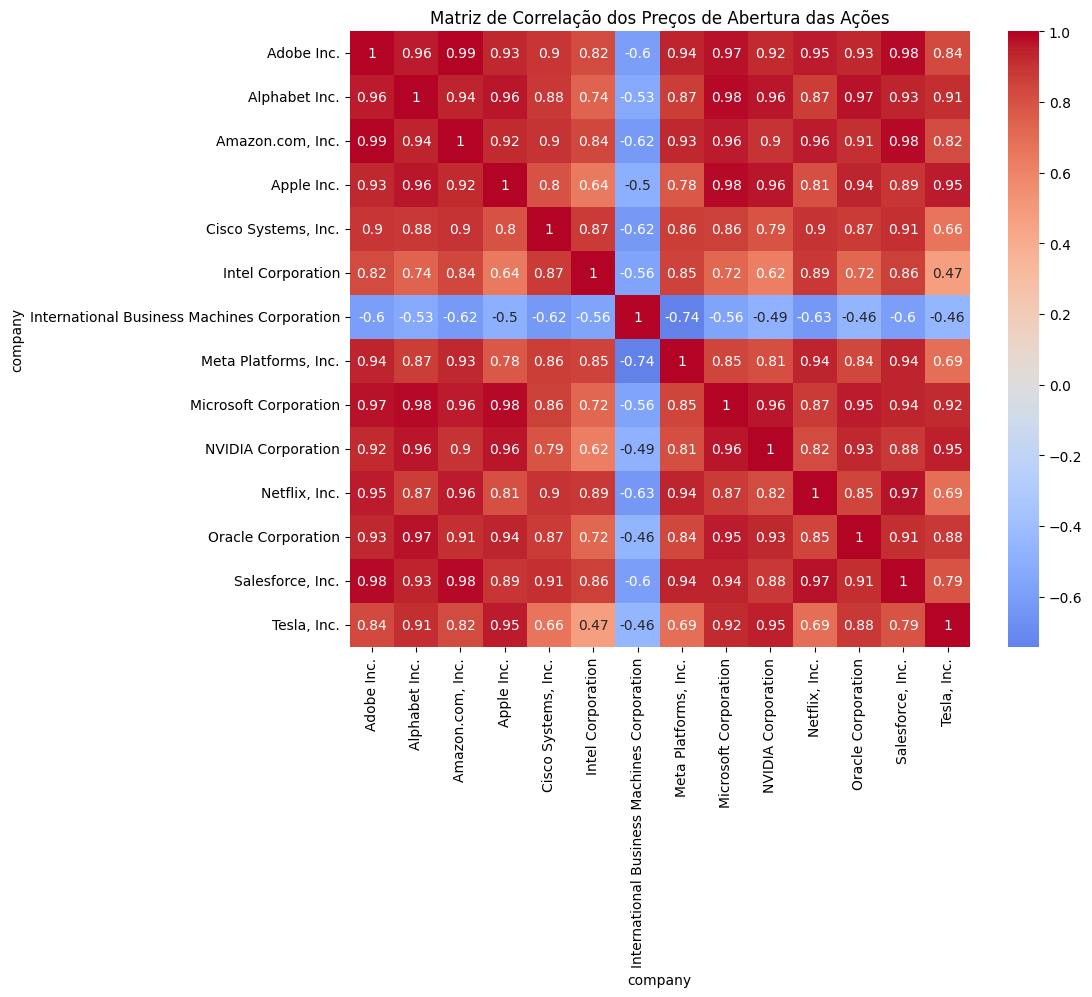

In [ ]:
#calcular a correlação de preços de abertura (open)

#tabela pivô com os preços de abertura
pivot_table_open = df.pivot_table(index='date', columns='company', values='open')

# Calcular a matriz de correlação
correlation_matrix_open = pivot_table_open.corr()

print("Matriz de Correlação dos Preços de Abertura:")
print(correlation_matrix_open)

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_open, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação dos Preços de Abertura das Ações')
plt.show()


##Distribuição de preços das ações

###Histogramas para visualizar a distribuição de preços das ações

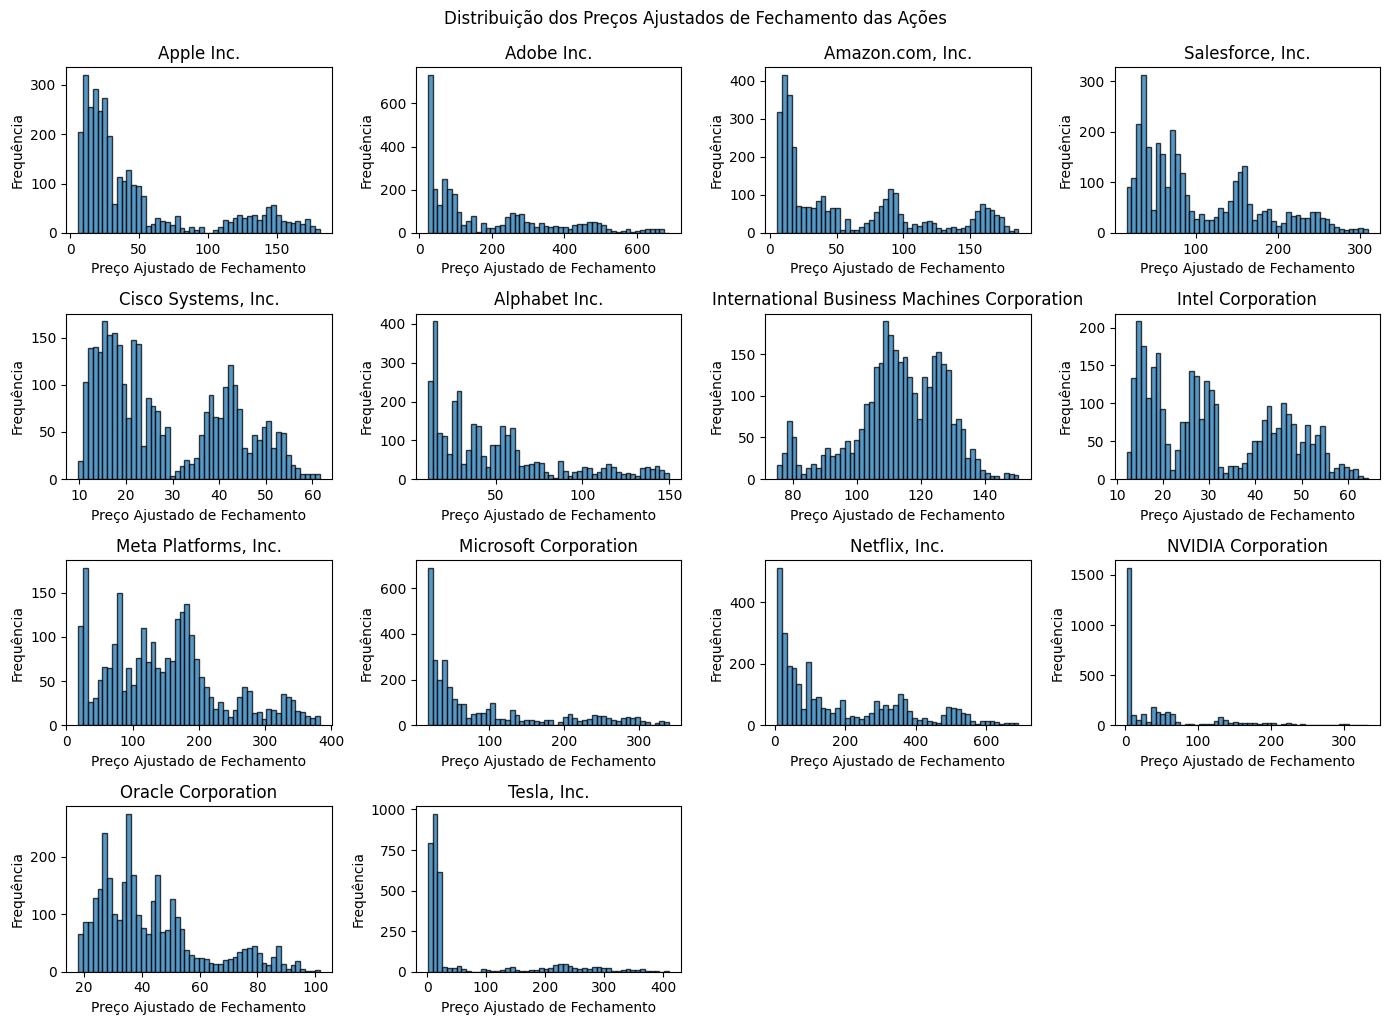

In [ ]:
#número de bins para o histograma
num_bins = 50

#histograma
plt.figure(figsize=(14, 10))

#loop através de cada empresa para filtrar os dados correspondentes
for i, company in enumerate(companies, 1):
    company_data = df[df['company'] == company]
    plt.subplot(4, 4, i) #subplots para cada empresa (layout de 4x4)
    plt.hist(company_data['adj_close'], bins=num_bins, alpha=0.75, edgecolor='black')
    plt.title(f'{company}')
    plt.xlabel('Preço Ajustado de Fechamento')
    plt.ylabel('Frequência')

#layout
plt.tight_layout()
plt.suptitle('Distribuição dos Preços Ajustados de Fechamento das Ações', y=1.02)
plt.show()

###Boxplots para identificar outliers nos dados de preços das ações

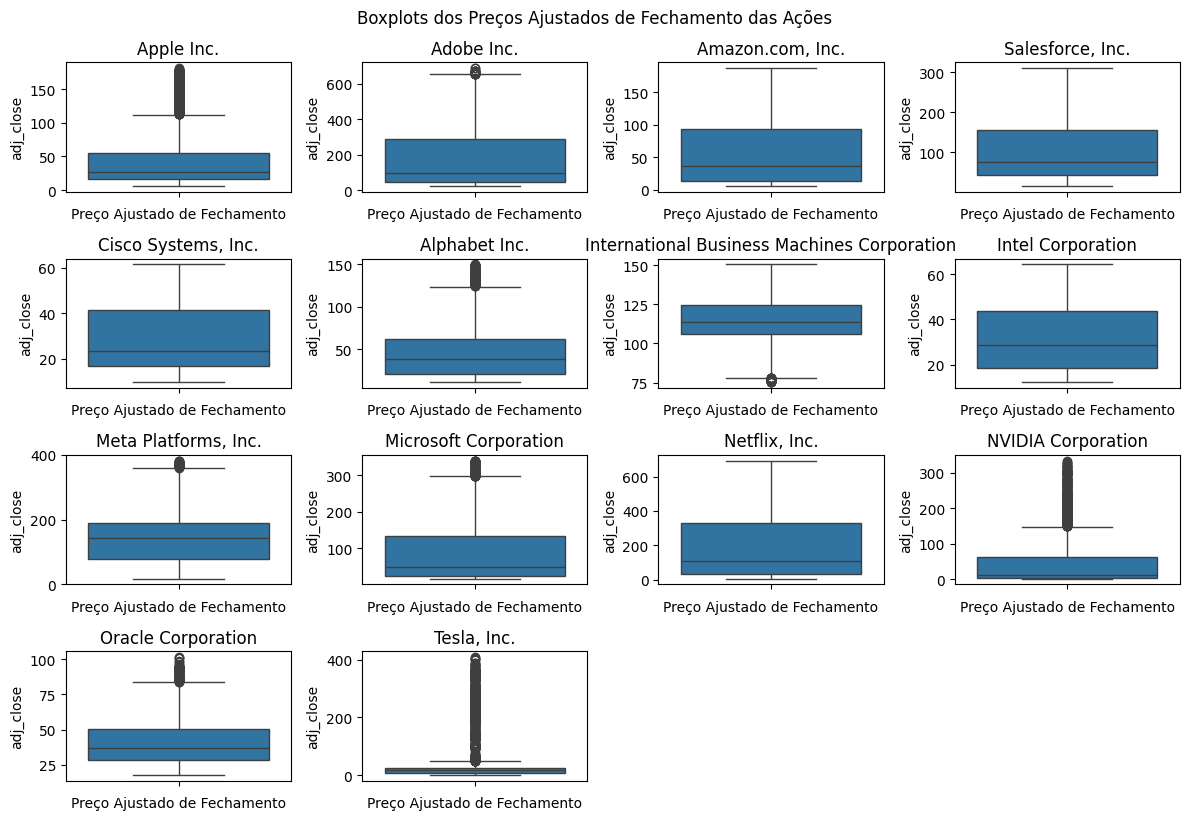

In [ ]:
#boxplots dos Preços Ajustados de Fechamento
plt.figure(figsize=(12, 8))

#loop através de cada empresa, filtrando os dados correspondentes
for i, company in enumerate(companies, 1):
    plt.subplot(4, 4, i)
    company_data = df[df['company'] == company]
    sns.boxplot(y=company_data['adj_close'])
    plt.title(f'{company}')
    plt.xlabel('Preço Ajustado de Fechamento')

#layout e título
plt.tight_layout()
plt.suptitle('Boxplots dos Preços Ajustados de Fechamento das Ações', y=1.02)
plt.show()

visualizar a distribuição dos preços ajustados de fechamento entre as 14 empresas

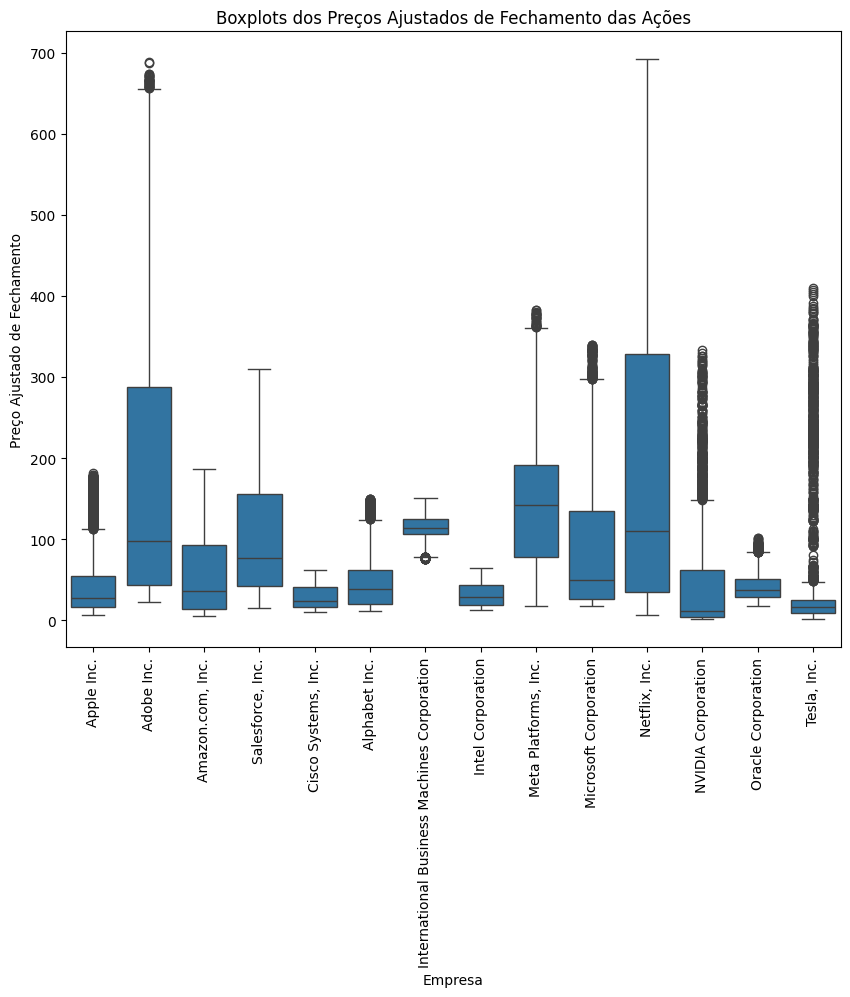

In [ ]:
#gráfico combinado com todas as empresas
#boxplot individual com Company como eixo X

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='company', y='adj_close')
plt.xticks(rotation=90)
plt.title('Boxplots dos Preços Ajustados de Fechamento das Ações')
plt.xlabel('Empresa')
plt.ylabel('Preço Ajustado de Fechamento')
plt.show()


#Retorno e Risco



✅Qual empresa oferece os maiores retornos?

*   Netflix possui o maior retorno diário máximo, seguido por Tesla e NVIDIA.

✅Qual empresa apresenta os menores retornos?

*   IBM apresentou o menor retorno mínimo, seguido por Cisco e Intel.

☑ **Média do retorno diário:** 0.0009216606092802763

☑ **Desvio padrão do retorno diário:** 0.02251876598907712

---


✅Quais ações são mais voláteis e, portanto, mais arriscadas?
*   Adobe, Google e Amazon apresentam alta volatilidade e desvio padrão acima de 0.0200.

✅Quais ações são menos voláteis?
*   Apple e IBM são menos voláteis e possuem desvio padrão entre 0.0150 e 0.0200.

☑ **Média da volatilidade:** 0.02168627791077098

☑ **Desvio padrão da volatilidade:** 0.006602319047812381

In [ ]:
#medidas de dispersão
#retorno diário, semanal, mensal e anual das ações

df['daily_return'] = df.groupby('company')['adj_close'].pct_change()

print(f'Média do retorno diário: {df["daily_return"].mean()}')
print(f'Desvio padrão do retorno diário: {df["daily_return"].std()}')

#volatilidade intradiária

Média do retorno diário: 0.0009216606092802763
Desvio padrão do retorno diário: 0.02251876598907712


In [ ]:
#volatilidade dos retornos diários
volatility = df.groupby('company')['daily_return'].std()

print(f'Média da volatilidade: {volatility.mean()}')
print(f'Desvio padrão da volatilidade: {volatility.std()}')


#Volatilidade é uma medida de dispersão dos retornos do índice de mercado.
#Quanto mais o preço de uma ação varia em um período curto de tempo, maior o risco de se ganhar ou perder dinheiro negociando esta ação
#a volatilidade é uma medida de risco

Média da volatilidade: 0.02168627791077098
Desvio padrão da volatilidade: 0.006602319047812381


## Retorno Diário por Empresa

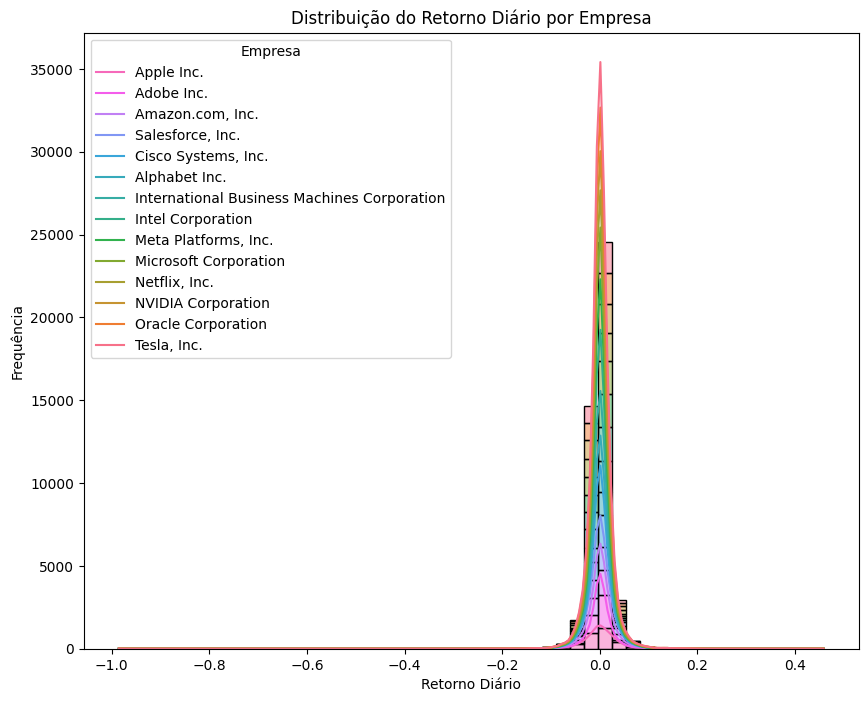

In [ ]:
#cálculo do retorno diário por empresa
#df['daily_return'] = df.groupby('company')['adj_close'].pct_change()

#visualizar a distribuição do retorno diário para todas as empresas
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='daily_return', hue='company', bins=50, kde=True, multiple='stack')
plt.title('Distribuição do Retorno Diário por Empresa')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend(title='Empresa', labels=df['company'].unique())  #define os rótulos das empresas na legenda
plt.show()

**Estatísticas Descritivas do Retorno Diário por Empresa**

Estatísticas Descritivas do Retorno Diário por Empresa:
                                              count      mean       std  \
company                                                                   
Adobe Inc.                                   3270.0  0.000876  0.019975   
Alphabet Inc.                                3270.0  0.000674  0.017032   
Amazon.com, Inc.                             3270.0  0.000990  0.020811   
Apple Inc.                                   3270.0  0.001079  0.018092   
Cisco Systems, Inc.                          3270.0  0.000448  0.016845   
Intel Corporation                            3270.0  0.000365  0.018606   
International Business Machines Corporation  3270.0  0.000270  0.014187   
Meta Platforms, Inc.                         2687.0  0.000812  0.025248   
Microsoft Corporation                        3270.0  0.000844  0.016377   
NVIDIA Corporation                           3270.0  0.001475  0.028087   
Netflix, Inc.                               

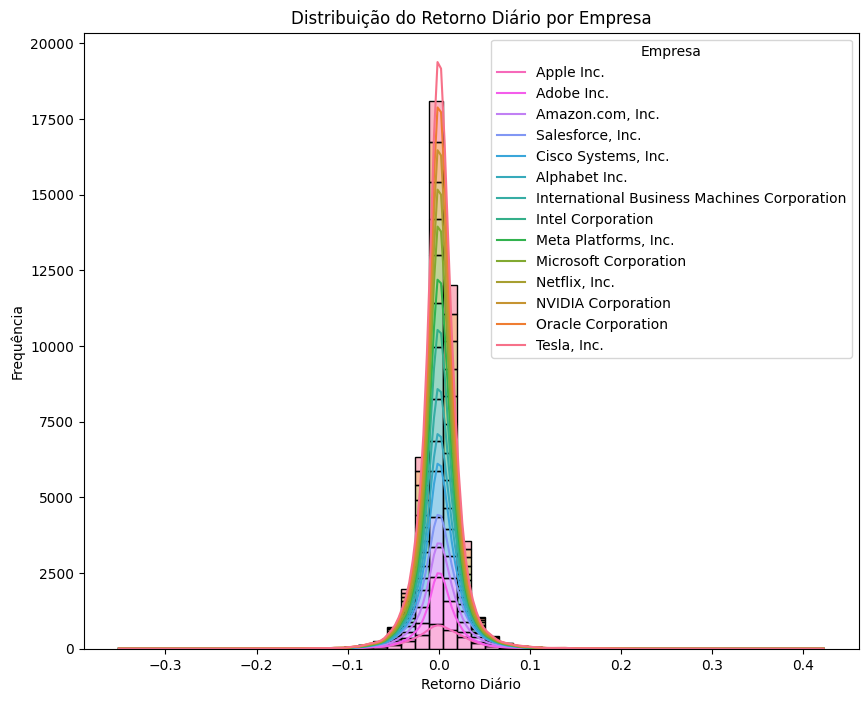

In [ ]:
#import df
df = pd.read_csv('/content/stock_prices_clean.csv')

#'date' no formato datetime
df['date'] = pd.to_datetime(df['date'])

#cálculo do retorno diário por empresa
df['daily_return'] = df.groupby('company')['adj_close'].pct_change()

#calcular estatísticas descritivas do retorno diário por empresa
descriptive_stats = df.groupby('company')['daily_return'].describe()

#exibir estatísticas descritivas
print('Estatísticas Descritivas do Retorno Diário por Empresa:')
print(descriptive_stats)

#visualizar a distribuição do retorno diário para todas as empresas
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='daily_return', hue='company', bins=50, kde=True, multiple='stack')
plt.title('Distribuição do Retorno Diário por Empresa')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend(title='Empresa', labels=df['company'].unique())  #rótulos das empresas na legenda
plt.show()

**Standard Deviation => O indicador Desvio Padrão (std)**

### Retorno Diário da Apple

Média do retorno diário da Apple: 0.0010786607590580867
Desvio padrão do retorno diário da Apple: 0.018092006548984657


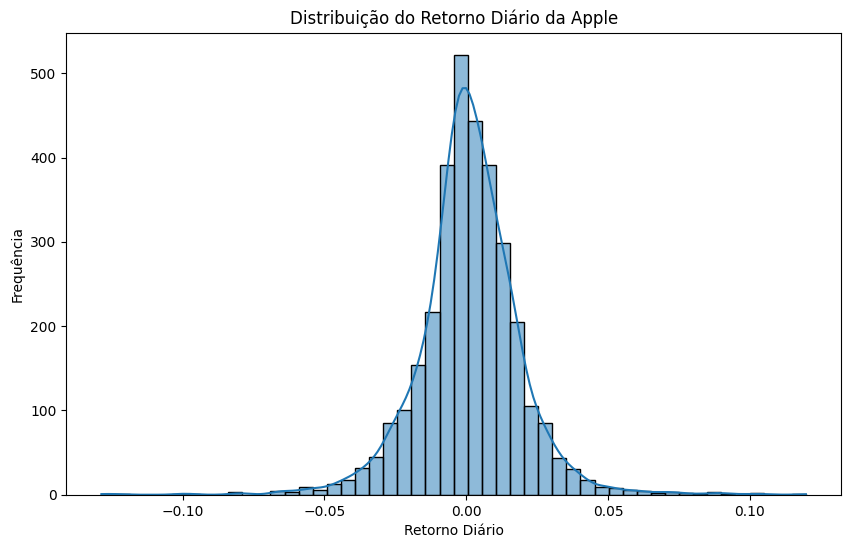

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Apple

#filtra o dataframe original para incluir apenas os dados da Apple
apple_data = df[df['company'] == 'Apple Inc.'].copy()

##calcular o retorno diário, removendo os valores NaN resultantes da mudança percentual
apple_data.loc[:, 'daily_return'] = apple_data['adj_close'].pct_change()
apple_data = apple_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = apple_data['daily_return'].mean()
desvio_padrao_retorno_diario = apple_data['daily_return'].std()

print(f'Média do retorno diário da Apple: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Apple: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(apple_data['daily_return'], bins=50, kde=True) #histograma
plt.title('Distribuição do Retorno Diário da Apple')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

### Retorno Diário da Adobe

Média do retorno diário da Adobe: 0.0008759516256598255
Desvio padrão do retorno diário da Adobe: 0.01997496212253162


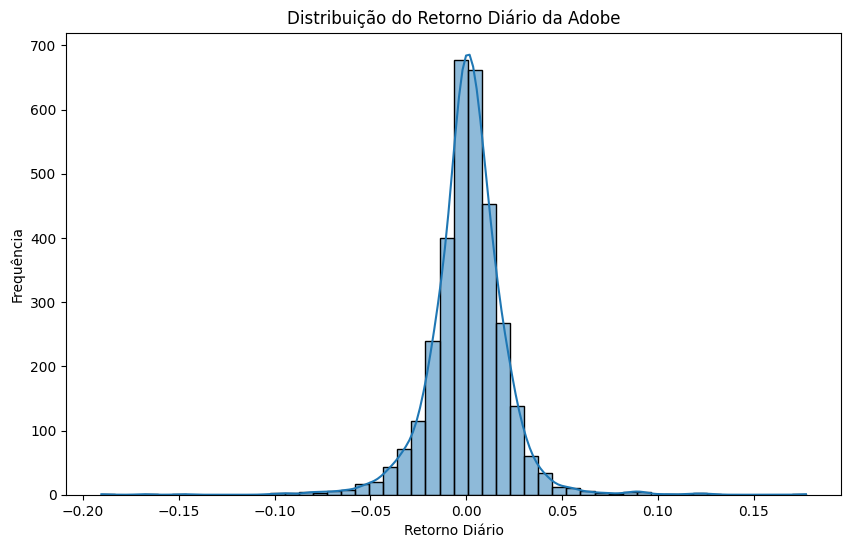

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Adobe

#filtra o dataframe original para incluir apenas os dados da Adobe
adobe_data = df[df['company'] == 'Adobe Inc.']

#calcular o retorno diário
adobe_data.loc[:, 'daily_return'] = adobe_data['adj_close'].pct_change()
adobe_data = adobe_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = adobe_data['daily_return'].mean()
desvio_padrao_retorno_diario = adobe_data['daily_return'].std()

print(f'Média do retorno diário da Adobe: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Adobe: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(adobe_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Adobe')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

#print(f"Número de registros para a Adobe: {len(Adobe_data)}")


###Retorno Diário da Amazon

Média do retorno diário da Amazon: 0.0009903150192354549
Desvio padrão do retorno diário da Amazon: 0.020811091125390806


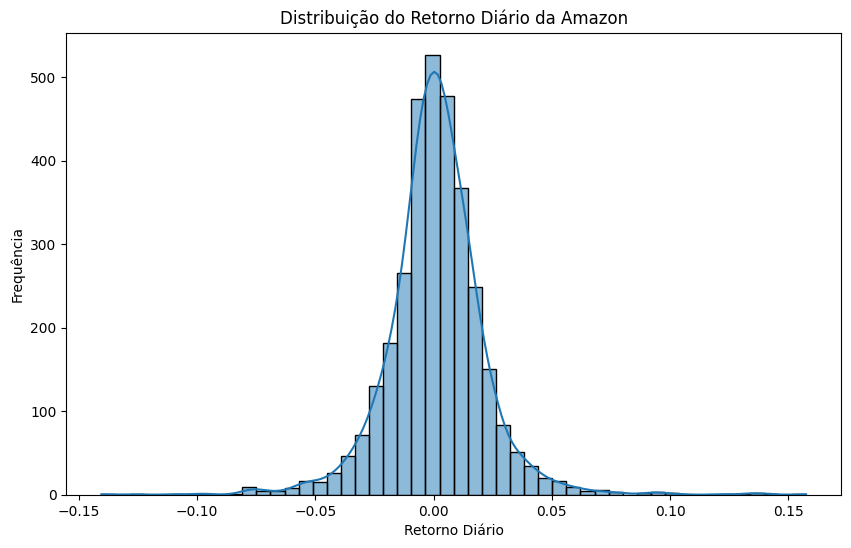

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Amazon

#filtra o dataframe original para incluir apenas os dados da Amazon
Amazon_data = df[df['company'] == 'Amazon.com, Inc.']

#calcular o retorno diário
Amazon_data.loc[:, 'daily_return'] = Amazon_data['adj_close'].pct_change()
Amazon_data = Amazon_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Amazon_data['daily_return'].mean()
desvio_padrao_retorno_diario = Amazon_data['daily_return'].std()

print(f'Média do retorno diário da Amazon: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Amazon: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Amazon_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Amazon')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Salesforce

Média do retorno diário da Salesforce: 0.0008643500967017695
Desvio padrão do retorno diário da Salesforce: 0.023133490521896574


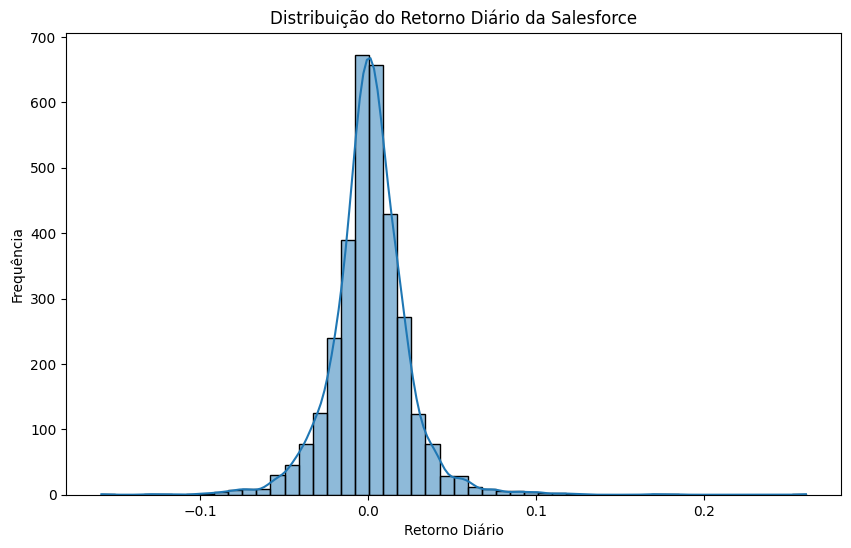

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Salesforce

#filtra o dataframe original para incluir apenas os dados da Salesforce
Salesforce_data = df[df['company'] == 'Salesforce, Inc.'].copy() #garantia que estou lidando com uma cópia independente do dataframe original

#calcular o retorno diário
Salesforce_data.loc[:, 'daily_return'] = Salesforce_data['adj_close'].pct_change()
Salesforce_data = Salesforce_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Salesforce_data['daily_return'].mean()
desvio_padrao_retorno_diario = Salesforce_data['daily_return'].std()

print(f'Média do retorno diário da Salesforce: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Salesforce: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Salesforce_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Salesforce')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Cisco Systems

Média do retorno diário da Cisco: 0.0004476229224557954
Desvio padrão do retorno diário da Cisco: 0.01684471868933063


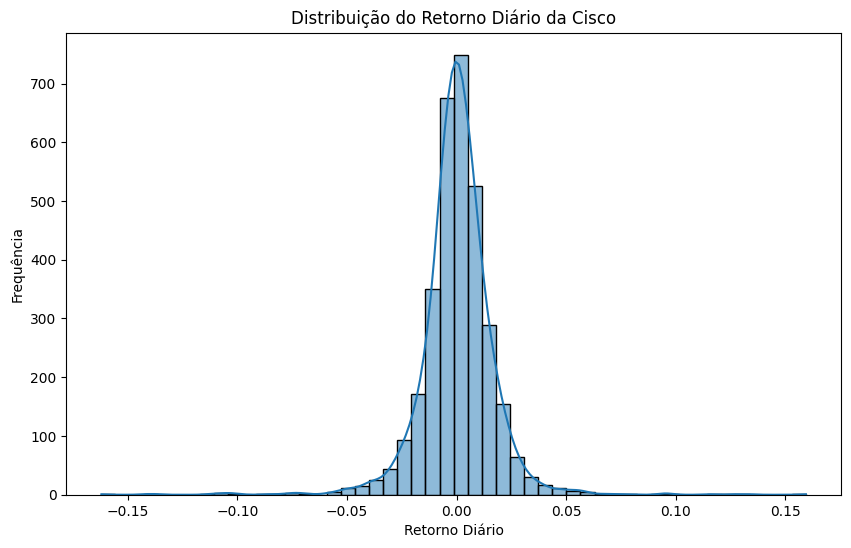

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Cisco

#filtra o dataframe original para incluir apenas os dados da Cisco
Cisco_data = df[df['company'] == 'Cisco Systems, Inc.'].copy()

#calcular o retorno diário
Cisco_data.loc[:, 'daily_return'] = Cisco_data['adj_close'].pct_change()
Cisco_data = Cisco_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Cisco_data['daily_return'].mean()
desvio_padrao_retorno_diario = Cisco_data['daily_return'].std()

print(f'Média do retorno diário da Cisco: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Cisco: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Cisco_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Cisco')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Alphabet

Média do retorno diário da Alphabet: 0.0006735242804569003
Desvio padrão do retorno diário da Alphabet: 0.017031512980548145


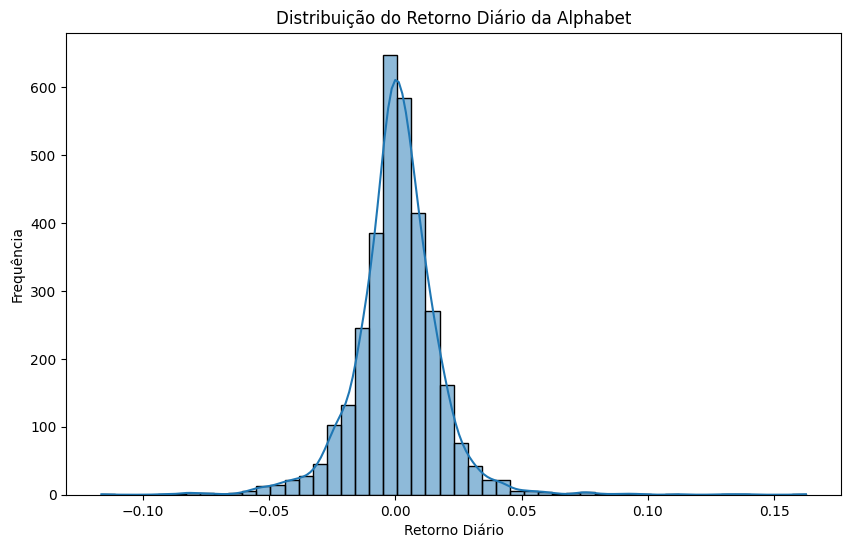

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Alphabet

#filtra o dataframe original para incluir apenas os dados da Alphabet
Alphabet_data = df[df['company'] == 'Alphabet Inc.'].copy()

#calcular o retorno diário
Alphabet_data.loc[:, 'daily_return'] = Alphabet_data['adj_close'].pct_change()
Alphabet_data = Alphabet_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Alphabet_data['daily_return'].mean()
desvio_padrao_retorno_diario = Alphabet_data['daily_return'].std()

print(f'Média do retorno diário da Alphabet: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Alphabet: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Alphabet_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Alphabet')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da IBM

Média do retorno diário da IBM: 0.000269655010655964
Desvio padrão do retorno diário da IBM: 0.01418731925736102


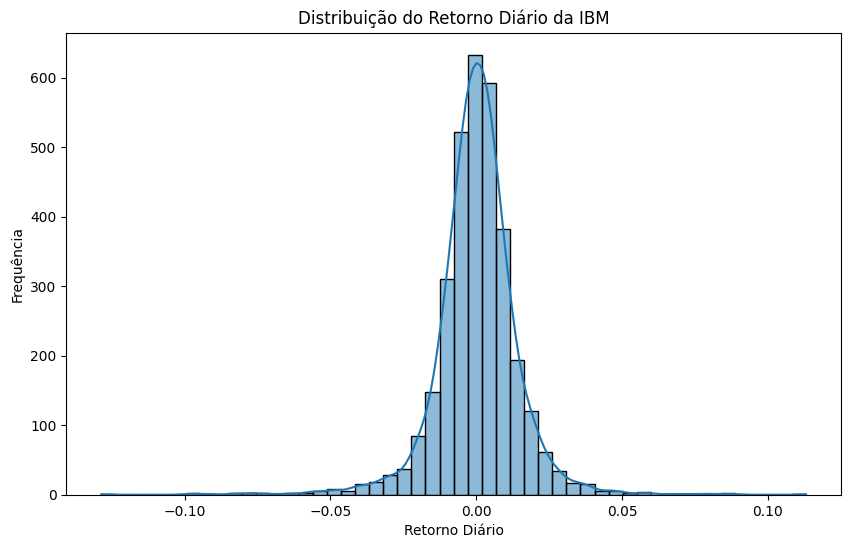

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a IBM

#filtra o dataframe original para incluir apenas os dados da IBM
IBM_data = df[df['company'] == 'International Business Machines Corporation'].copy()

#calcular o retorno diário
IBM_data.loc[:, 'daily_return'] = IBM_data['adj_close'].pct_change()
IBM_data = IBM_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = IBM_data['daily_return'].mean()
desvio_padrao_retorno_diario = IBM_data['daily_return'].std()

print(f'Média do retorno diário da IBM: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da IBM: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(IBM_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da IBM')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Intel

Média do retorno diário da Intel: 0.00036514426913004277
Desvio padrão do retorno diário da Intel: 0.01860580158249824


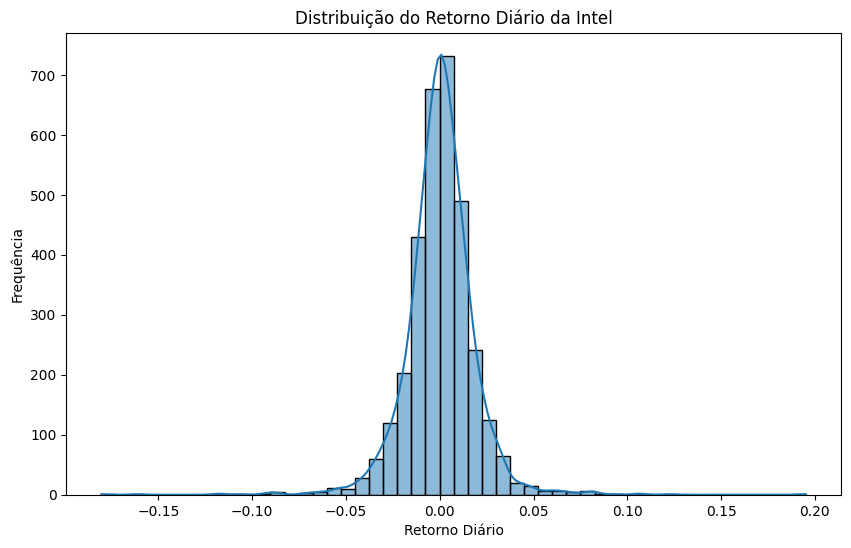

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Intel

#filtra o dataframe original para incluir apenas os dados da Intel
Intel_data = df[df['company'] == 'Intel Corporation'].copy()

#calcular o retorno diário
Intel_data.loc[:, 'daily_return'] = Intel_data['adj_close'].pct_change()
Intel_data = Intel_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Intel_data['daily_return'].mean()
desvio_padrao_retorno_diario = Intel_data['daily_return'].std()

print(f'Média do retorno diário da Intel: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Intel: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Intel_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Intel')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Meta

Média do retorno diário da Meta: 0.0008122358630410764
Desvio padrão do retorno diário da Meta: 0.02524789091248984


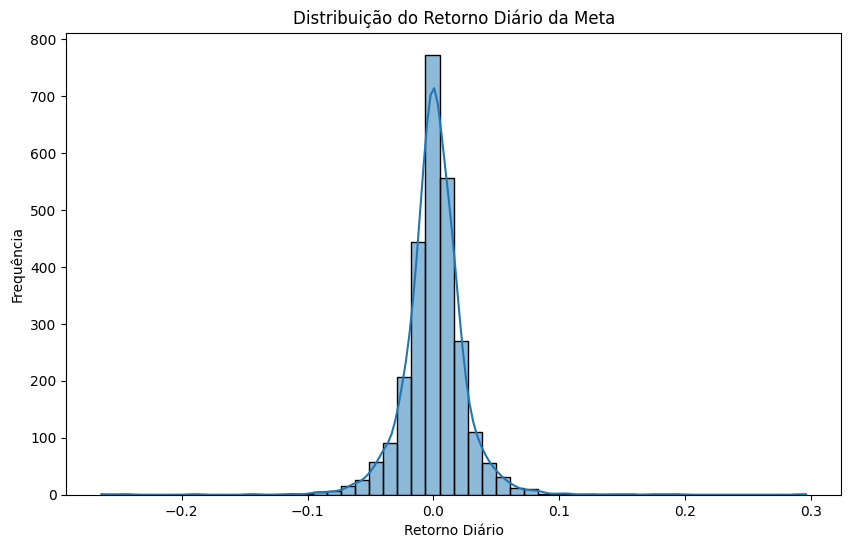

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Meta

#filtra o dataframe original para incluir apenas os dados da Meta
Meta_data = df[df['company'] == 'Meta Platforms, Inc.'].copy()

#calcular o retorno diário
Meta_data.loc[:, 'daily_return'] = Meta_data['adj_close'].pct_change()
Meta_data = Meta_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Meta_data['daily_return'].mean()
desvio_padrao_retorno_diario = Meta_data['daily_return'].std()

print(f'Média do retorno diário da Meta: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Meta: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Meta_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Meta')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Microsoft

Média do retorno diário da Microsoft: 0.0008438413986686718
Desvio padrão do retorno diário da Microsoft: 0.01637661716247677


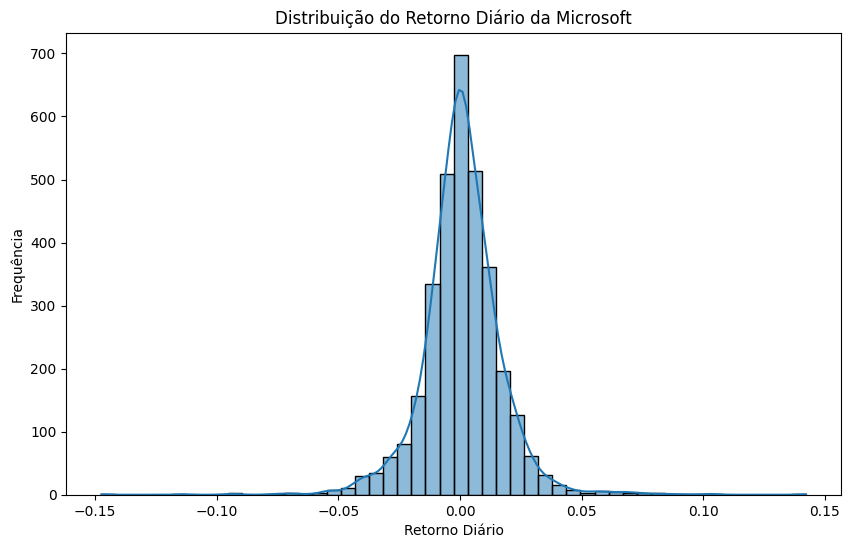

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Microsoft

#filtra o dataframe original para incluir apenas os dados da Microsoft
Microsoft_data = df[df['company'] == 'Microsoft Corporation'].copy()

#calcular o retorno diário
Microsoft_data.loc[:, 'daily_return'] = Microsoft_data['adj_close'].pct_change()
Microsoft_data = Microsoft_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Microsoft_data['daily_return'].mean()
desvio_padrao_retorno_diario = Microsoft_data['daily_return'].std()

print(f'Média do retorno diário da Microsoft: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Microsoft: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Microsoft_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Microsoft')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Netflix

Média do retorno diário da Netflix: 0.0016537727163009666
Desvio padrão do retorno diário da Netflix: 0.03277808483222465


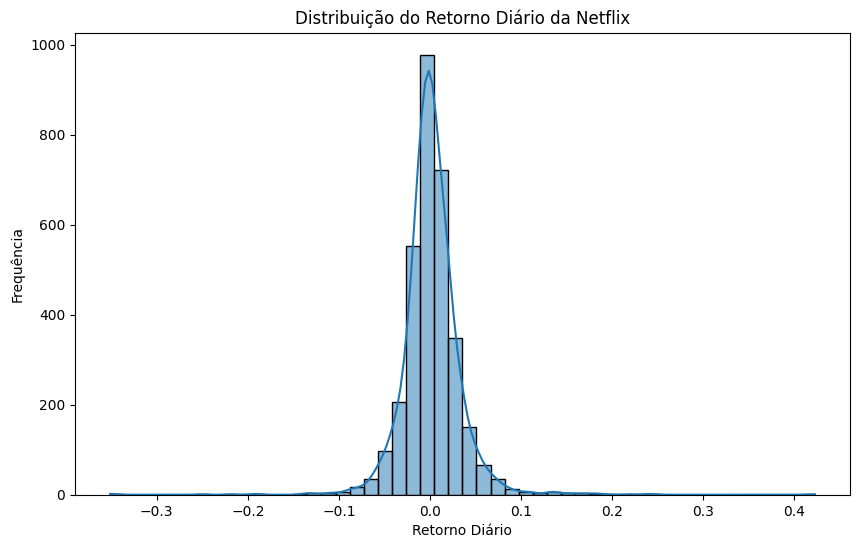

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Netflix

#filtra o dataframe original para incluir apenas os dados da Netflix
Netflix_data = df[df['company'] == 'Netflix, Inc.'].copy()

#calcular o retorno diário
Netflix_data.loc[:, 'daily_return'] = Netflix_data['adj_close'].pct_change()
Netflix_data = Netflix_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Netflix_data['daily_return'].mean()
desvio_padrao_retorno_diario = Netflix_data['daily_return'].std()

print(f'Média do retorno diário da Netflix: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Netflix: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Netflix_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Netflix')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da NVIDIA

Média do retorno diário da NVIDIA: 0.0014745488857813493
Desvio padrão do retorno diário da NVIDIA: 0.028086829900427896


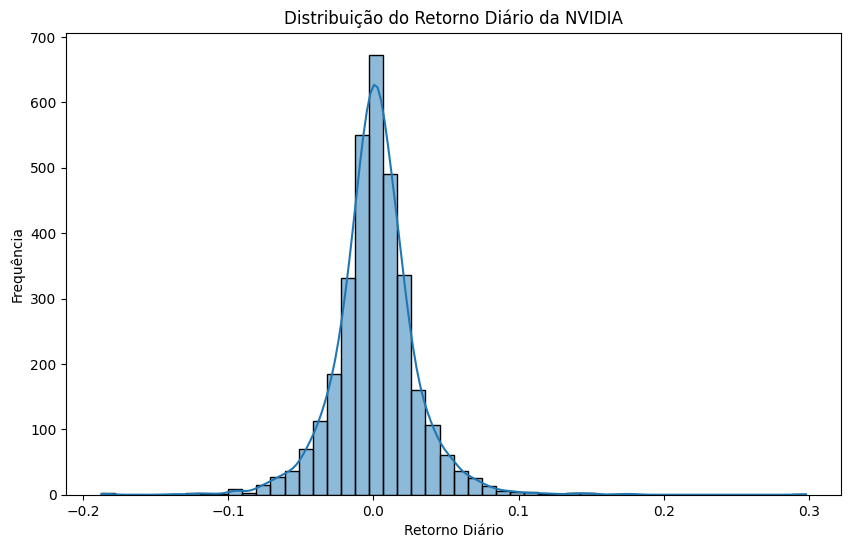

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a NVIDIA

#filtra o dataframe original para incluir apenas os dados da NVIDIA
NVIDIA_data = df[df['company'] == 'NVIDIA Corporation'].copy()

#calcular o retorno diário
NVIDIA_data.loc[:, 'daily_return'] = NVIDIA_data['adj_close'].pct_change()
NVIDIA_data = NVIDIA_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = NVIDIA_data['daily_return'].mean()
desvio_padrao_retorno_diario = NVIDIA_data['daily_return'].std()

print(f'Média do retorno diário da NVIDIA: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da NVIDIA: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(NVIDIA_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da NVIDIA')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

###Retorno Diário da Oracle

Média do retorno diário da Oracle: 0.0005515045873060064
Desvio padrão do retorno diário da Oracle: 0.01644179481466058


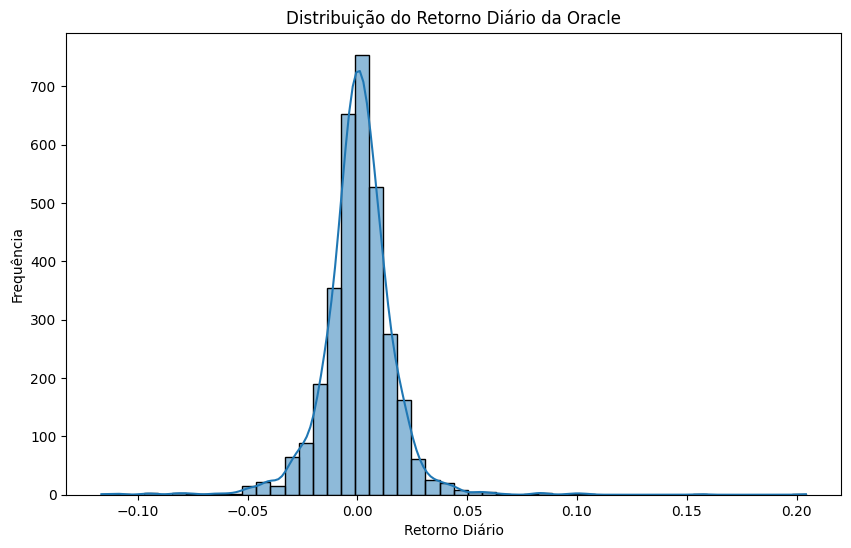

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Oracle

#filtra o dataframe original para incluir apenas os dados da Oracle
Oracle_data = df[df['company'] == 'Oracle Corporation'].copy()

#calcular o retorno diário
Oracle_data.loc[:, 'daily_return'] = Oracle_data['adj_close'].pct_change()
Oracle_data = Oracle_data.dropna(subset=['daily_return'])

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = Oracle_data['daily_return'].mean()
desvio_padrao_retorno_diario = Oracle_data['daily_return'].std()

print(f'Média do retorno diário da Oracle: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Oracle: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(10, 6))
sns.histplot(Oracle_data['daily_return'], bins=50, kde=True)
plt.title('Distribuição do Retorno Diário da Oracle')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

### Retorno Diário da Tesla

Média do retorno diário da Tesla: 0.002023728958323907
Desvio padrão do retorno diário da Tesla: 0.03599577029997221


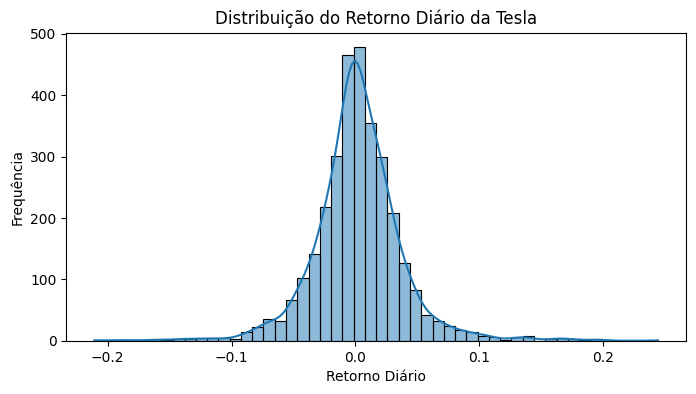

In [ ]:
#histograma da distribuição do retorno diário com uma linha de densidade (KDE) para a Tesla

#filtra o dataframe original para incluir apenas os dados da Tesla
tesla_data = df[df['company'] == 'Tesla, Inc.']

#calcular o retorno diário
tesla_data.loc[:, 'daily_return'] = tesla_data['adj_close'].pct_change()
#.pct_change() calcula o retorno percentual de mudança para a coluna 'adj_close' dentro de cada grupo (para cada empresa)

#calcular a média e o desvio padrão do retorno diário
media_retorno_diario = tesla_data['daily_return'].mean()
desvio_padrao_retorno_diario = tesla_data['daily_return'].std()

print(f'Média do retorno diário da Tesla: {media_retorno_diario}')
print(f'Desvio padrão do retorno diário da Tesla: {desvio_padrao_retorno_diario}')

#visualizar a distribuição do retorno diário
plt.figure(figsize=(8, 4))
sns.histplot(tesla_data['daily_return'].dropna(), bins=50, kde=True) #histograma
plt.title('Distribuição do Retorno Diário da Tesla')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()


## Retorno Mensal por Empresa

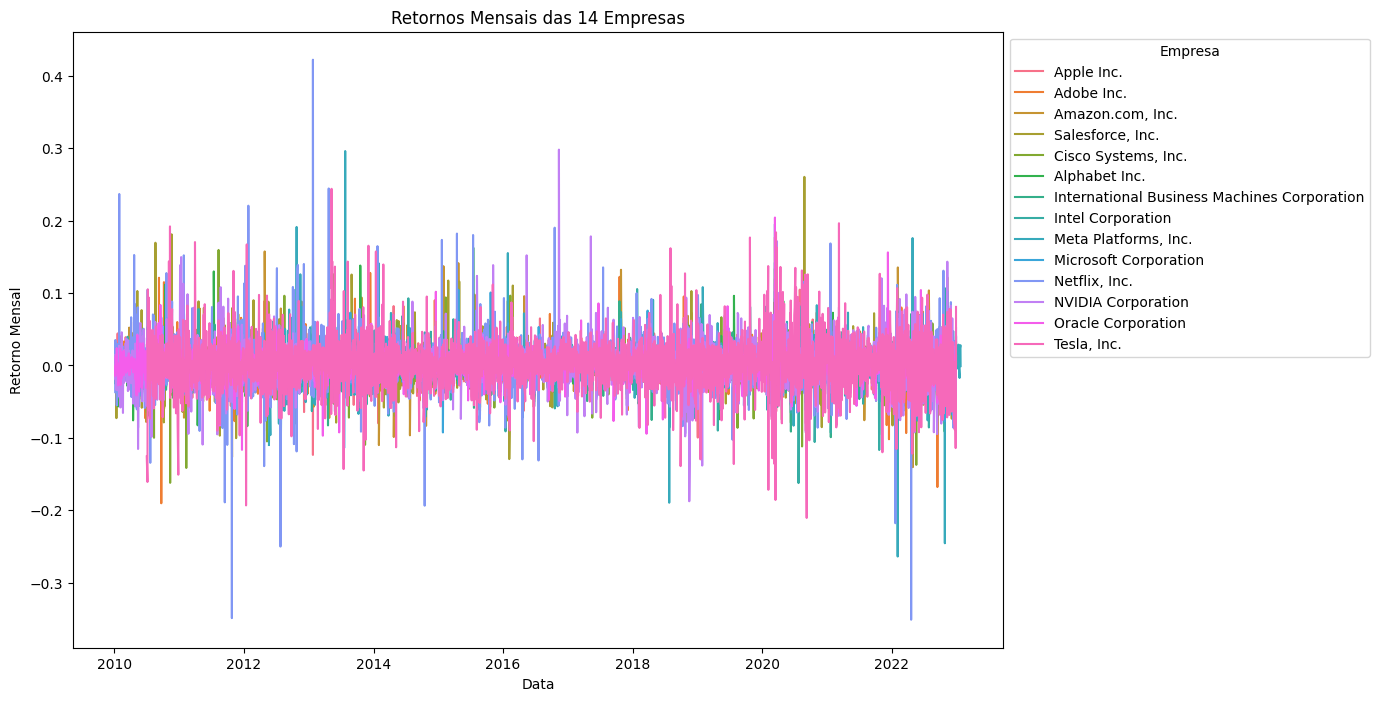

In [ ]:
#calcular os retornos mensais para cada empresa
df['monthly_return'] = df.groupby(['company', df['date'].dt.to_period('M')])['adj_close'].pct_change()

#gráfico dos retornos mensais
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='date', y='monthly_return', hue='company', estimator=None)
plt.title('Retornos Mensais das 14 Empresas')
plt.xlabel('Data')
plt.ylabel('Retorno Mensal')
plt.legend(title='Empresa', labels=df['company'].unique(), loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Retorno Anual por Empresa

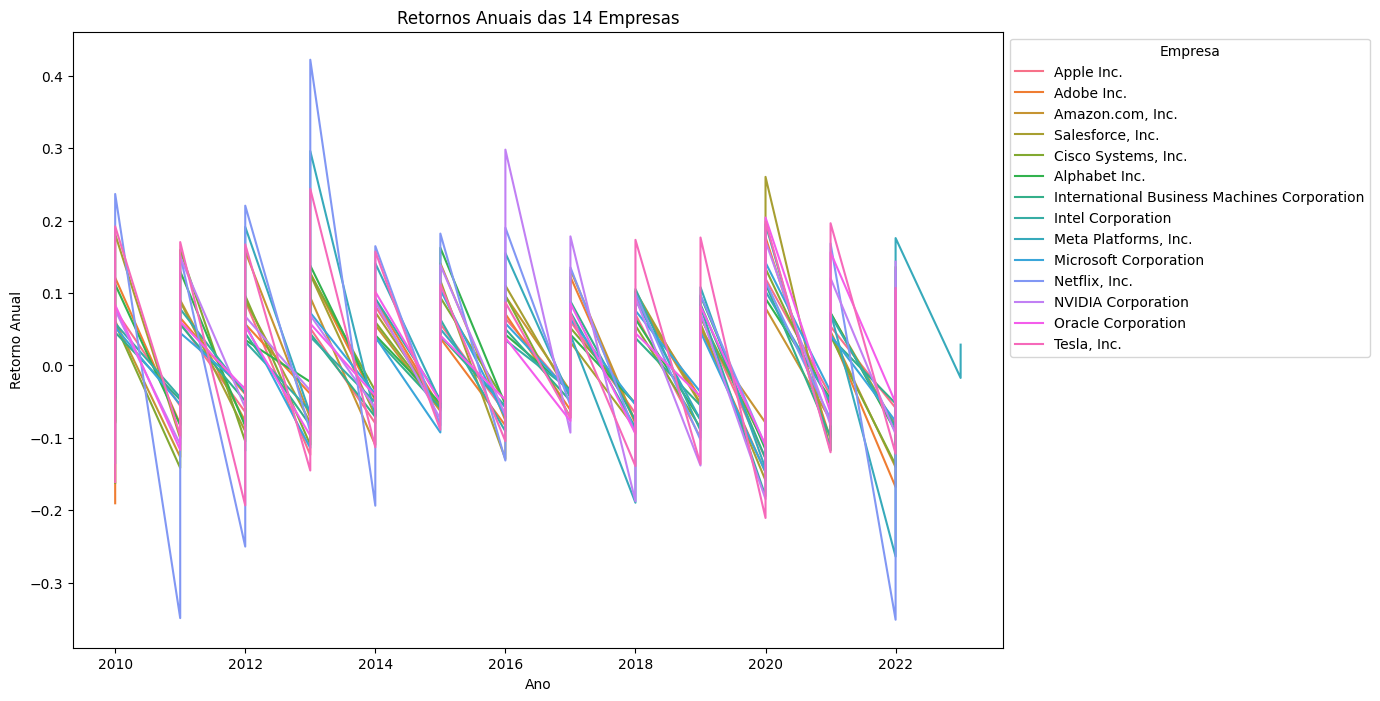

In [ ]:
#calcular os retornos anuais para cada empresa
df['year'] = df['date'].dt.year #extrai o ano da coluna de data para agrupamento por ano
df['annual_return'] = df.groupby(['company', 'year'])['adj_close'].pct_change() #agrupa os dados pelo nome da empresa e pelo ano da data
#.pct_change() calcula o retorno percentual de mudança para os preços ajustados de fechamento (adj_close) dentro de cada grupo (empresa e ano)


#gráfico dos retornos anuais
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='year', y='annual_return', hue='company', estimator=None) #função do Seaborn para criar gráfico de linha
plt.title('Retornos Anuais das 14 Empresas')
plt.xlabel('Ano')
plt.ylabel('Retorno Anual')
plt.legend(title='Empresa', labels=df['company'].unique(), loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Análise de Risco

O cálculo do Valor em Risco (VaR) é uma importante medida de risco financeiro para avaliar a probabilidade de perdas significativas. Nessa análise de risco foi usada uma abordagem histórica para calcular o VaR, que considera os retornos históricos para estimar o potencial de perda em um determinado horizonte de tempo, dado um nível de confiança específico.

Foi considerado um nível de confiança de 95% e um horizonte de tempo de 1 dia.

*   O VaR a 95% de confiança para os últimos 5 anos fornece uma visão do risco potencial de perda anual para cada empresa.

*   Empresas com VaR mais alto apresentam maior risco de perdas anuais inesperadas.



Valor em Risco (VaR) a 95% de confiança para cada empresa:
                                        company    VaR_95
0                                    Adobe Inc. -0.037330
1                                 Alphabet Inc. -0.031585
2                              Amazon.com, Inc. -0.035911
3                                    Apple Inc. -0.032437
4                           Cisco Systems, Inc. -0.027456
5                             Intel Corporation -0.033894
6   International Business Machines Corporation -0.025850
7                          Meta Platforms, Inc. -0.040632
8                         Microsoft Corporation -0.030114
9                            NVIDIA Corporation -0.052230
10                                Netflix, Inc. -0.044618
11                           Oracle Corporation -0.026266
12                             Salesforce, Inc. -0.038524
13                                  Tesla, Inc. -0.064165


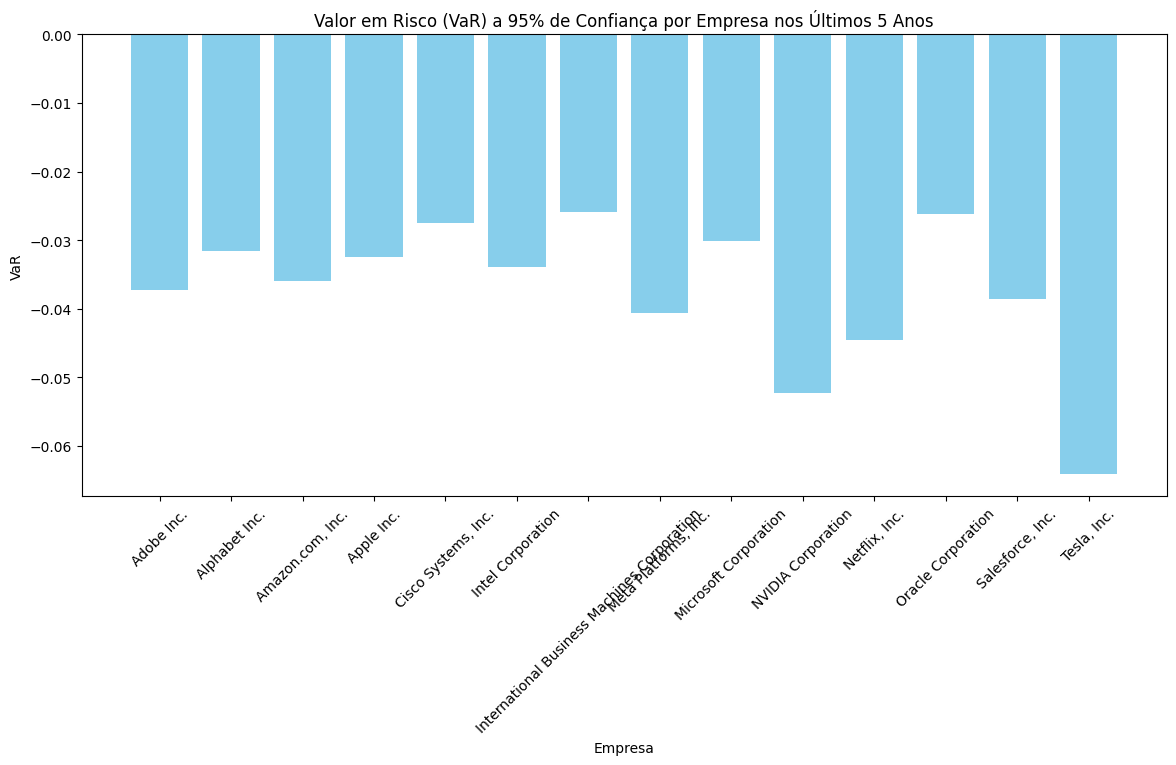

In [ ]:
#import df
df_original = pd.read_csv('/content/stock_prices_clean.csv')

#'date' no formato datetime
df_original['date'] = pd.to_datetime(df_original['date'])

#criar df_copy do df_original
df_copy = df_original.copy()

#filtrar os últimos 5 anos (2019-2023)
end_date = df_copy['date'].max()
start_date = end_date - pd.DateOffset(years=5)
df_copy = df_copy[(df_copy['date'] >= start_date) & (df_copy['date'] <= end_date)]

#retornos diários calculados para cada empresa
#cálculo do retorno diário por empresa
df_copy['daily_return'] = df_copy.groupby('company')['adj_close'].pct_change()

#O VaR é calculado para cada empresa usando a função calcular_var_historico
#função para calcular o VaR histórico
def calcular_var_historico(retornos, confianca=0.95):
    #ordenar os retornos
    retornos_ordenados = np.sort(retornos.dropna())

    #calcular o percentil do VaR
    indice_var = int((1 - confianca) * len(retornos_ordenados))
    var = retornos_ordenados[indice_var]

    return var

#calcular o VaR para cada empresa
var_por_empresa = df_copy.groupby('company')['daily_return'].apply(lambda x: calcular_var_historico(x, 0.95))

#criar novo dfe para armazenar o resultado
valor_em_risco = var_por_empresa.reset_index()
valor_em_risco.columns = ['company', 'VaR_95']

#salvar os resultados em uma nova tabela chamada valor_em_risco
valor_em_risco.to_csv('/content/valor_em_risco.csv', index=False)

#exibir o VaR calculado para cada empresa
print('Valor em Risco (VaR) a 95% de confiança para cada empresa:')
print(valor_em_risco)

#visualizar o VaR por empresa em um gráfico de barras
plt.figure(figsize=(14, 6))
plt.bar(valor_em_risco['company'], valor_em_risco['VaR_95'], color='skyblue')
plt.title('Valor em Risco (VaR) a 95% de Confiança por Empresa nos Últimos 5 Anos')
plt.xlabel('Empresa')
plt.ylabel('VaR')
plt.xticks(rotation=45)
plt.show()


*    **NVIDIA, Netflix e Tesla:** Apresentam VaR relativamente alto, sugerindo maior risco potencial de perdas anuais.
*    **IBM e Oracle:** Possuem VaR mais baixo, indicando menor risco potencial de perdas anuais.

Todos os valores de VaR são negativos, indicando perdas potenciais.

O VaR varia entre -0.0258 (IBM) e -0.0642 (Tesla), o que significa que a perda máxima anual esperada varia entre 2,58% e 6,42%.

Empresas com maior volatilidade diária tendem a ter uma diferença maior entre os VaRs.

---

**Observações sobre a tendências ao longo dos anos:**
*    **Adobe, Amazon, Apple, Microsoft e Salesforce:** Apresentaram uma tendência de aumento nos últimos 5 anos, indicando um aumento no risco das empresas.

*    **Cisco, Intel, IBM, Oracle e Tesla:** Apresentaram uma tendência de diminuição.


O VaR anual apresentado é maior que o VaR diário (anteriormente analisado).

# Análise Técnica

O objetivo da aplicação das técnicas de análise é identificar as ações das 14 empresas com o maior crescimento no preço ajustado de fechamento ao longo dos anos, utilizando a taxa de crescimento anual composta (CAGR) como métrica de avaliação, e avaliar a volatilidade e o risco dessas ações, para que um novo investidor possa tomar decisões informadas sobre investimentos com bom histórico de crescimento e menor variação.

Métricas para crescimento:
*   Taxa de crescimento anual composta (CAGR) do preço ajustado de fechamento
*   Desempenho anualizado

Métricas para risco:
*   Desvio padrão dos retornos diários (volatilidade)
*   Valor em risco (VaR)



A CAGR (do inglês Compound Annual Growth Rate) é uma métrica utilizada para calcular a taxa média de crescimento de um investimento, levando em consideração a volatilidade e as flutuações ao longo do tempo.


## CAGR para cada empresa

In [ ]:
#cálculo da CAGR
def calculate_cagr(data, start_date, end_date):
    data_period = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    start_value = data_period.iloc[0]['adj_close']
    end_value = data_period.iloc[-1]['adj_close']
    periods = (data_period['date'].iloc[-1] - data_period['date'].iloc[0]).days / 365.25
    cagr = (end_value / start_value) ** (1 / periods) - 1
    return cagr

#aplicar o cálculo da CAGR para cada empresa
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    cagr = calculate_cagr(company_data, '2019-01-01', '2023-12-31')
    print(f'CAGR da {company}: {cagr:.2%}')


CAGR da Apple Inc.: 35.92%
CAGR da Adobe Inc.: 10.76%
CAGR da Amazon.com, Inc.: 2.27%
CAGR da Salesforce, Inc.: -0.56%
CAGR da Cisco Systems, Inc.: 5.73%
CAGR da Alphabet Inc.: 13.84%
CAGR da International Business Machines Corporation: 11.74%
CAGR da Intel Corporation: -11.16%
CAGR da Meta Platforms, Inc.: 1.33%
CAGR da Microsoft Corporation: 25.67%
CAGR da Netflix, Inc.: 2.13%
CAGR da NVIDIA Corporation: 44.31%
CAGR da Oracle Corporation: 17.84%
CAGR da Tesla, Inc.: 55.99%


**Variações significativas no CAGR (Taxa de Crescimento Anual Composta) de 5 anos para estas empresas:**

*   **Alto Crescimento:** Tesla (55.99%), NVIDIA  (44.31%), Apple (35.92%) e Microsoft (25.67%) lideram o grupo com CAGR acima de 25%.

*   **Crescimento Moderado:** Alphabet (13.84%), Oracle (17.84%), Cisco (5.73%), Adobe (10.76%) e IBM (11.74%) apresentam crescimento moderado entre 5% e 18%.

*   **Estagnação/Declínio:** Meta (1.33%), Netflix (2.13%), Amazon (2.27%), Salesforce (-0.56%) e Intel (-11.16%) exibem crescimento estagnado ou negativo no período.

✅**Considerando apenas o CAGR, Tesla, Nvidia e Apple se destacam.**

In [ ]:
#Calcular CAGR para cada empresa por ano
#função para calcular CAGR

def calculate_annual_cagr(df, start_year, end_year):
    cagr_dict = {}
    for company in df['company'].unique():
        company_data = df[df['company'] == company]
        cagr_values = []
        for year in range(start_year, end_year):
            start_date = f'{year}-01-01'
            end_date = f'{year}-12-31'
            data_period = company_data[(company_data['date'] >= start_date) & (company_data['date'] <= end_date)]
            if not data_period.empty:
                start_value = data_period.iloc[0]['adj_close']
                end_value = data_period.iloc[-1]['adj_close']
                if start_value != 0:
                    cagr = (end_value / start_value) ** (1 / 1) - 1
                    cagr_values.append(cagr)
        cagr_dict[company] = cagr_values
    return cagr_dict

#calcular CAGR de 2019 a 2023 (úlitmos 5 anos)
cagr_data = calculate_annual_cagr(df, 2019, 2024)


In [ ]:
#Preparar os dados para ANOVA convertendo os dados de CAGR calculados em formato que possa ser usado para o teste ANOVA

# Converter o dicionário de CAGR em um dataframe
cagr_list = []
for company, cagr_values in cagr_data.items():
    for cagr in cagr_values:
        cagr_list.append({'company': company, 'cagr': cagr})

cagr_df = pd.DataFrame(cagr_list)


In [ ]:
#Realizar o teste ANOVA com os dados prontos
from scipy.stats import f_oneway

#criar lista de CAGRs por empresa
groups = [cagr_df[cagr_df['company'] == company]['cagr'] for company in cagr_df['company'].unique()]

#ANOVA
anova_result = f_oneway(*groups)

print(f"Estatística do Teste F: {anova_result.statistic}")
print(f"P-valor: {anova_result.pvalue}")

#resultado
alpha = 0.05  #nível de significância
if anova_result.pvalue < alpha:
  #se o p-valor do teste for menor que o nível de significância (0.05), há uma diferença significativa entre as CAGRs das empresas
    print("Resultado: Rejeitamos a hipótese nula. Há diferença significativa nas CAGRs entre as empresas.")
else:
  #caso contrário, não há evidências suficientes para afirmar que as CAGRs das empresas são diferentes
    print("Resultado: Não há evidências suficientes para rejeitar a hipótese nula.")


Estatística do Teste F: 0.8141268350375086
P-valor: 0.6427312816103227
Resultado: Não há evidências suficientes para rejeitar a hipótese nula.


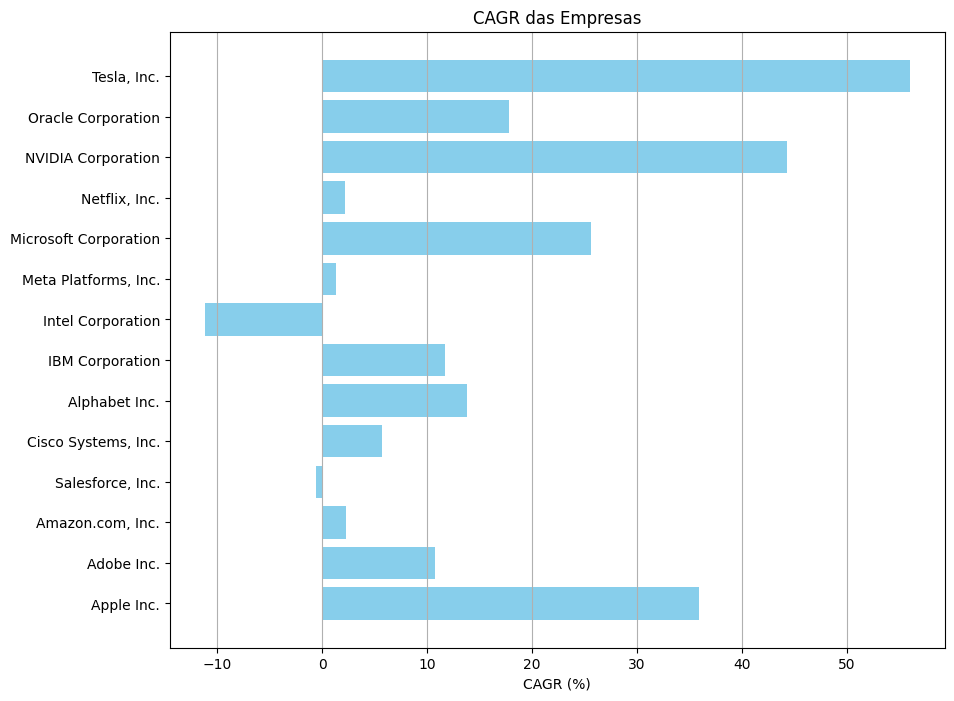

In [ ]:
import matplotlib.pyplot as plt

#dados de CAGR
companies = [
    'Apple Inc.', 'Adobe Inc.', 'Amazon.com, Inc.', 'Salesforce, Inc.', 'Cisco Systems, Inc.',
    'Alphabet Inc.', 'IBM Corporation', 'Intel Corporation',
    'Meta Platforms, Inc.', 'Microsoft Corporation', 'Netflix, Inc.', 'NVIDIA Corporation',
    'Oracle Corporation', 'Tesla, Inc.'
]

cagrs = [
    35.92, 10.76, 2.27, -0.56, 5.73, 13.84, 11.74, -11.16, 1.33, 25.67, 2.13, 44.31, 17.84, 55.99
]

#criar dataframe para os CAGRs
cagr_df = pd.DataFrame({
    'company': companies,
    'cagr': cagrs
})

#gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(cagr_df['company'], cagr_df['cagr'], color='skyblue')
plt.xlabel('CAGR (%)')
plt.title('CAGR das Empresas')
plt.grid(axis='x')
plt.show()


In [ ]:
# Estatísticas descritivas
cagr_descriptive = cagr_df['cagr'].describe()
print(cagr_descriptive)

print(f'Média CAGR: {cagr_descriptive["mean"]:.2%}')
print(f'Desvio Padrão CAGR: {cagr_descriptive["std"]:.2%}')

count    14.00000
mean     15.41500
std      18.91948
min     -11.16000
25%       2.16500
50%      11.25000
75%      23.71250
max      55.99000
Name: cagr, dtype: float64
Média CAGR: 1541.50%
Desvio Padrão CAGR: 1891.95%


A análise do CAGR pode complementar outras técnicas de análise fundamental e técnica para fornecer uma compreensão mais completa das perspectivas e valor potencial de uma empresa.

Segmentar empresas com base no CAGR permite a comparação direta de suas trajetórias de crescimento. Os investidores podem identificar empresas que superaram ou ficaram abaixo da média do mercado, o que pode informar decisões de investimento e estratégias de alocação de setores.

### Hipóteses

Análise dos Retornos Diários com  Teste ANOVA (Análise de Variância):

A análise de daily_return verifica se há diferenças significativas entre as empresas em termos de seus retornos diários.

In [ ]:
#teste de significância para determinar se os resultados do teste ANOVA são significativos para os retornos diários

from scipy.stats import f_oneway

#realizar teste ANOVA para comparar retornos médios das 14 empresas
anova_result = f_oneway(*groups)

print(f"Estatística do Teste F: {anova_result.statistic}")
print(f"P-valor: {anova_result.pvalue}")

#resultado
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Resultado: Rejeitamos a hipótese H0. Há diferença significativa nos retornos diários médios entre as empresas.")
else:
    print("Resultado: Não há evidências suficientes para rejeitar a hipótese H0.")
    #Não há evidências suficientes para rejeitar a hipótese de que as médias dos CAGRs são iguais entre todas as empresas.


Estatística do Teste F: 0.8141268350375086
P-valor: 0.6427312816103227
Resultado: Não há evidências suficientes para rejeitar a hipótese H0.


**1.   Hipótese (H0): As médias dos retornos diários médios são iguais entre todas as empresas.**

► Não foi rejeitada.

A hipótese de que as médias dos CAGRs são iguais entre todas as empresas não foi rejeitada com base nos dados e no teste ANOVA realizado, pois não há evidências estatísticas suficientes para concluir que há uma diferença significativa nas médias dos CAGRs entre as empresas.

---

**2.   Hipótese (H1): Pelo menos uma das médias dos CAGRs é diferente entre as empresas.**

►Não foi validada.

A hipótese de que pelo menos uma das médias dos CAGRs é diferente entre as empresas não foi validada, pois não foi encontrada uma diferença significativa entre os CAGRs das empresas.

---
**Resultados**

*   Estatística do Teste F: 0.8141268350375086
*   P-valor: 0.6427312816103227


**Conclusão**

Com base nos resultados do teste ANOVA (estatística F e p-valor), não há evidências suficientes para rejeitar a hipótese H0 de que as médias dos CAGRs das 14 empresas são iguais. Portanto, a hipótese foi mantida, indicando que as diferenças observadas nos CAGRs podem ser explicadas pela variabilidade dentro das empresas, e não por diferenças reais entre as empresas.
Como o nível de significância comum utilizado em testes estatísticos é 0.05 e o p-valor é maior (0.64), não há evidências suficientes para rejeitar a hipótese H0.

# Segmentação

Os dados foram segmentados para identificar padrões em diferentes grupos.

A segmentação dos preços de ações de 14 empresas entre 2019 e 2023 oferece diversos benefícios no contexto de compreender tendências de mercado, identificar oportunidades de investimento e avaliar o desempenho das empresas.

A seguir vamos explorar algumas segmentações:

### Segmentação por Volume de Negociação

Empresa: Apple Inc., Volume Médio: 256325536.41, Segmento: Alto Volume
Empresa: Adobe Inc., Volume Médio: 3814336.66, Segmento: Alto Volume
Empresa: Amazon.com, Inc., Volume Médio: 88339985.05, Segmento: Alto Volume
Empresa: Salesforce, Inc., Volume Médio: 6910973.46, Segmento: Alto Volume
Empresa: Cisco Systems, Inc., Volume Médio: 32696560.26, Segmento: Alto Volume
Empresa: Alphabet Inc., Volume Médio: 60186468.94, Segmento: Alto Volume
Empresa: International Business Machines Corporation, Volume Médio: 5036544.90, Segmento: Alto Volume
Empresa: Intel Corporation, Volume Médio: 36071695.51, Segmento: Alto Volume
Empresa: Meta Platforms, Inc., Volume Médio: 31178146.69, Segmento: Alto Volume
Empresa: Microsoft Corporation, Volume Médio: 38016469.34, Segmento: Alto Volume
Empresa: Netflix, Inc., Volume Médio: 18414854.14, Segmento: Alto Volume
Empresa: NVIDIA Corporation, Volume Médio: 50806126.60, Segmento: Alto Volume
Empresa: Oracle Corporation, Volume Médio: 18018558.61, Segmento: 

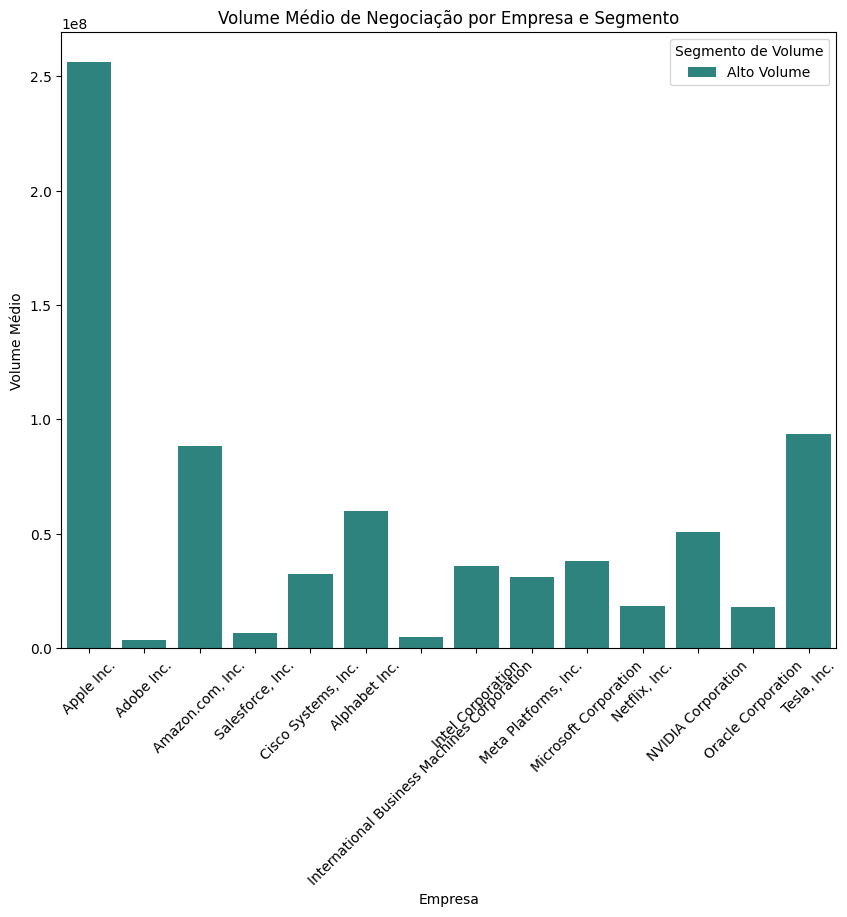

In [ ]:
#carregar o df original do arquivo CSV
df_original = pd.read_csv('/content/stock_prices_clean.csv')

#criar cópia do DF original
df_copy = df_original.copy()

#função para segmentar o volume de negociação
def segmentar_volume(volume):
    if volume > 1000000:
        return 'Alto Volume'
    elif 500000 < volume <= 1000000:
        return 'Volume Moderado'
    else:
        return 'Baixo Volume'

#calcular o volume médio por empresa
volume_medio = df_copy.groupby('company')['volume'].mean().reset_index()
volume_medio.columns = ['company', 'avg_volume']

#unir o volume médio ao df_copy
df_copy = df_copy.merge(volume_medio, on='company', how='left')

#aplicar a segmentação
df_copy['segmento_volume'] = df_copy['avg_volume'].apply(segmentar_volume)

#salvar os resultados em uma nova tabela chamada segmentacao_volume
segmentacao_volume = df_copy[['company', 'avg_volume', 'segmento_volume']].drop_duplicates().reset_index(drop=True)
segmentacao_volume.to_csv('/content/segmentacao_volume.csv', index=False)

#exibir os resultados descritos
for index, row in segmentacao_volume.iterrows():
    print(f"Empresa: {row['company']}, Volume Médio: {row['avg_volume']:.2f}, Segmento: {row['segmento_volume']}")

#visualização com gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='company', y='avg_volume', hue='segmento_volume', data=segmentacao_volume, palette='viridis')
plt.title('Volume Médio de Negociação por Empresa e Segmento')
plt.xlabel('Empresa')
plt.ylabel('Volume Médio')
plt.xticks(rotation=45)
plt.legend(title='Segmento de Volume')
plt.show()



*   **Liquidez Geral do Mercado:**

O fato de todas as 14 empresas estarem na categoria "Alto Volume" indica que o mercado geral para essas ações de tecnologia é líquido. Isso significa que os novos investidores devem poder comprar e vender ações dessas empresas com relativa facilidade, sem impactar significativamente o preço.

*   **Liquidez Relativa de Cada Empresa:**

Dentro do segmento "Alto Volume", ainda existe uma ampla faixa de volumes médios de transação entre as empresas. A Tesla tem um volume médio superior a 935 milhões, enquanto a Adobe tem um volume médio inferior a 4 milhões. Isso indica que as ações da Tesla são mais líquidas do que as da Adobe.

In [ ]:
df_seg_volume = pd.read_csv('/content/segmentacao_volume.csv')
print(df_seg_volume.info())
print(df_seg_volume.dtypes)
print(df_seg_volume.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          14 non-null     object 
 1   avg_volume       14 non-null     float64
 2   segmento_volume  14 non-null     object 
dtypes: float64(1), object(2)
memory usage: 464.0+ bytes
None
company             object
avg_volume         float64
segmento_volume     object
dtype: object
               company    avg_volume segmento_volume
0           Apple Inc.  2.563255e+08     Alto Volume
1           Adobe Inc.  3.814337e+06     Alto Volume
2     Amazon.com, Inc.  8.833999e+07     Alto Volume
3     Salesforce, Inc.  6.910973e+06     Alto Volume
4  Cisco Systems, Inc.  3.269656e+07     Alto Volume


### Segmentação por Crescimento do CAGR

A segmentação por CAGR permite identificar empresas com alto, moderado ou baixo potencial de crescimento.

Empresa: Apple Inc., CAGR: 35.92%, Segmento: Alto Crescimento
Empresa: Adobe Inc., CAGR: 10.76%, Segmento: Crescimento Moderado
Empresa: Amazon.com, Inc., CAGR: 2.27%, Segmento: Baixo Crescimento
Empresa: Salesforce, Inc., CAGR: -0.56%, Segmento: Baixo Crescimento
Empresa: Cisco Systems, Inc., CAGR: 5.73%, Segmento: Baixo Crescimento
Empresa: Alphabet Inc., CAGR: 13.84%, Segmento: Crescimento Moderado
Empresa: International Business Machines Corporation, CAGR: 11.74%, Segmento: Crescimento Moderado
Empresa: Intel Corporation, CAGR: -11.16%, Segmento: Baixo Crescimento
Empresa: Meta Platforms, Inc., CAGR: 1.33%, Segmento: Baixo Crescimento
Empresa: Microsoft Corporation, CAGR: 25.67%, Segmento: Alto Crescimento
Empresa: Netflix, Inc., CAGR: 2.13%, Segmento: Baixo Crescimento
Empresa: NVIDIA Corporation, CAGR: 44.31%, Segmento: Alto Crescimento
Empresa: Oracle Corporation, CAGR: 17.84%, Segmento: Crescimento Moderado
Empresa: Tesla, Inc., CAGR: 55.99%, Segmento: Alto Crescimento


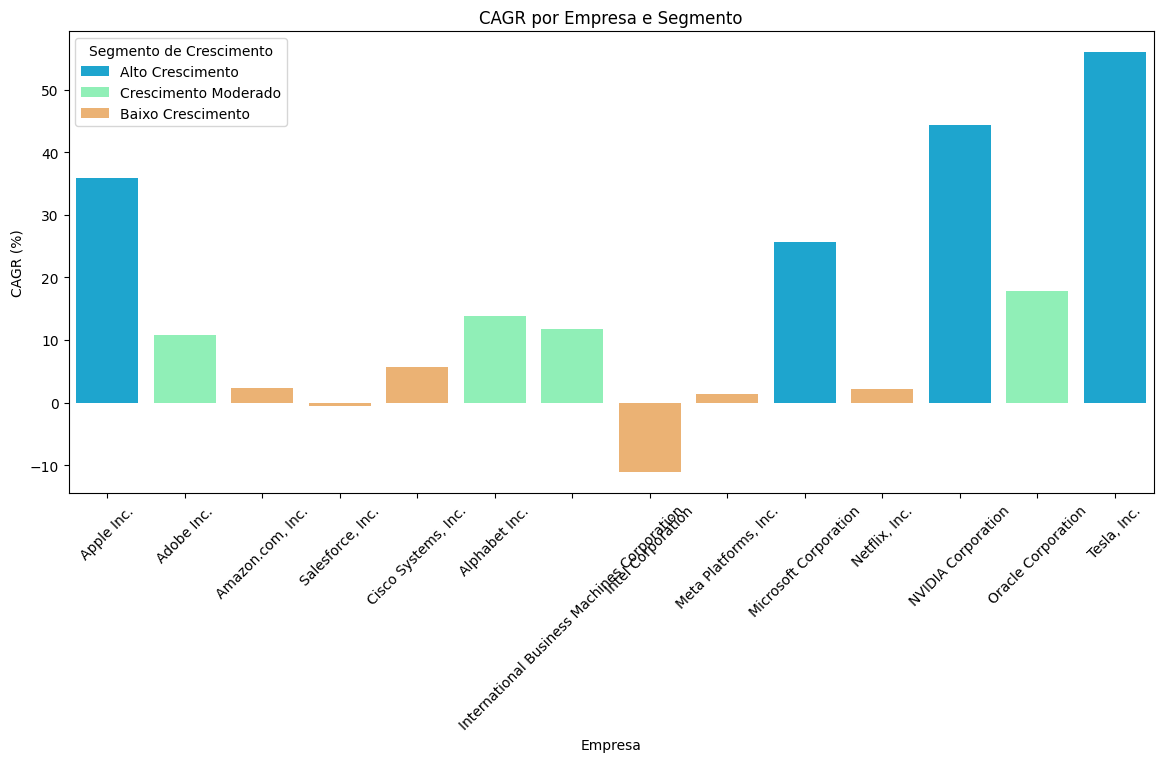

In [ ]:
#carregar o DataFrame original do arquivo CSV
#df_original = pd.read_csv('/content/stock_prices_clean.csv')

#criar cópia do df original
df_copy = df_original.copy()

#dados do CAGR para cada empresa
cagr_data = {
    'company': ['Apple Inc.', 'Adobe Inc.', 'Amazon.com, Inc.', 'Salesforce, Inc.', 'Cisco Systems, Inc.',
                'Alphabet Inc.', 'International Business Machines Corporation', 'Intel Corporation',
                'Meta Platforms, Inc.', 'Microsoft Corporation', 'Netflix, Inc.', 'NVIDIA Corporation',
                'Oracle Corporation', 'Tesla, Inc.'],
    'cagr': [35.92, 10.76, 2.27, -0.56, 5.73, 13.84, 11.74, -11.16, 1.33, 25.67, 2.13, 44.31, 17.84, 55.99]
}

#criação do DataFrame de CAGR
df_cagr = pd.DataFrame(cagr_data)

#função para segmentar o crescimento do CAGR
def segmentar_cagr(cagr):
    if cagr > 20:
        return 'Alto Crescimento'
    elif 10 < cagr <= 20:
        return 'Crescimento Moderado'
    else:
        return 'Baixo Crescimento'

#segmentação ao DataFrame de CAGR
df_cagr['segmento_cagr'] = df_cagr['cagr'].apply(segmentar_cagr)

#merge de df_copy com df_cagr
df_copy = df_copy.merge(df_cagr[['company', 'cagr', 'segmento_cagr']], on='company', how='left')

#salvar os resultados em uma nova tabela chamada segmentacao_cagr
df_copy.to_csv('/content/segmentacao_cagr.csv', index=False)

#resultados descritos
for index, row in df_cagr.iterrows():
    print(f"Empresa: {row['company']}, CAGR: {row['cagr']:.2f}%, Segmento: {row['segmento_cagr']}")

#visualização com gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x='company', y='cagr', hue='segmento_cagr', data=df_cagr, palette='rainbow')
plt.title('CAGR por Empresa e Segmento')
plt.xlabel('Empresa')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=45)
plt.legend(title='Segmento de Crescimento')
plt.show()

*     **Alto Crescimento:**
As empresas Apple, Tesla, NVIDIA, Microsoft apresentaram CAGR significativamente acima da média do mercado, demonstrando forte desempenho nos últimos 5 anos.
*    **Crescimento Moderado:**
As empresas Alphabet, IBM, Oracle, Adobe apresentaram CAGR consistente, mas abaixo do ritmo das empresas de alto crescimento.
*    **Baixo Crescimento:**
As empresas Amazon, Salesforce, Cisco, Meta, Netflix, Intel apresentaram CAGR estagnado ou negativo, indicando potencial necessidade de reestruturação ou mudança de estratégia.

###Segmentação por Volatilidade

Para essa segmentação é utlizado o cálculo do desvio padrão que mede a variabilidade dos retornos das ações de uma empresa em torno de sua média.

A segmentação por desvio padrão permite identificar empresas com alta, moderada ou baixa volatilidade.

Empresa: Adobe Inc., Desvio Padrão: 0.0236, Segmento: Alta Volatilidade
Empresa: Alphabet Inc., Desvio Padrão: 0.0206, Segmento: Alta Volatilidade
Empresa: Amazon.com, Inc., Desvio Padrão: 0.0270, Segmento: Alta Volatilidade
Empresa: Apple Inc., Desvio Padrão: 0.0181, Segmento: Volatilidade Moderada
Empresa: Cisco Systems, Inc., Desvio Padrão: 0.0227, Segmento: Alta Volatilidade
Empresa: Intel Corporation, Desvio Padrão: 0.0244, Segmento: Alta Volatilidade
Empresa: International Business Machines Corporation, Desvio Padrão: 0.0143, Segmento: Volatilidade Moderada
Empresa: Meta Platforms, Inc., Desvio Padrão: 0.0267, Segmento: Alta Volatilidade
Empresa: Microsoft Corporation, Desvio Padrão: 0.0219, Segmento: Alta Volatilidade
Empresa: NVIDIA Corporation, Desvio Padrão: 0.0330, Segmento: Alta Volatilidade
Empresa: Netflix, Inc., Desvio Padrão: 0.0369, Segmento: Alta Volatilidade
Empresa: Oracle Corporation, Desvio Padrão: 0.0223, Segmento: Alta Volatilidade
Empresa: Salesforce, Inc., Des

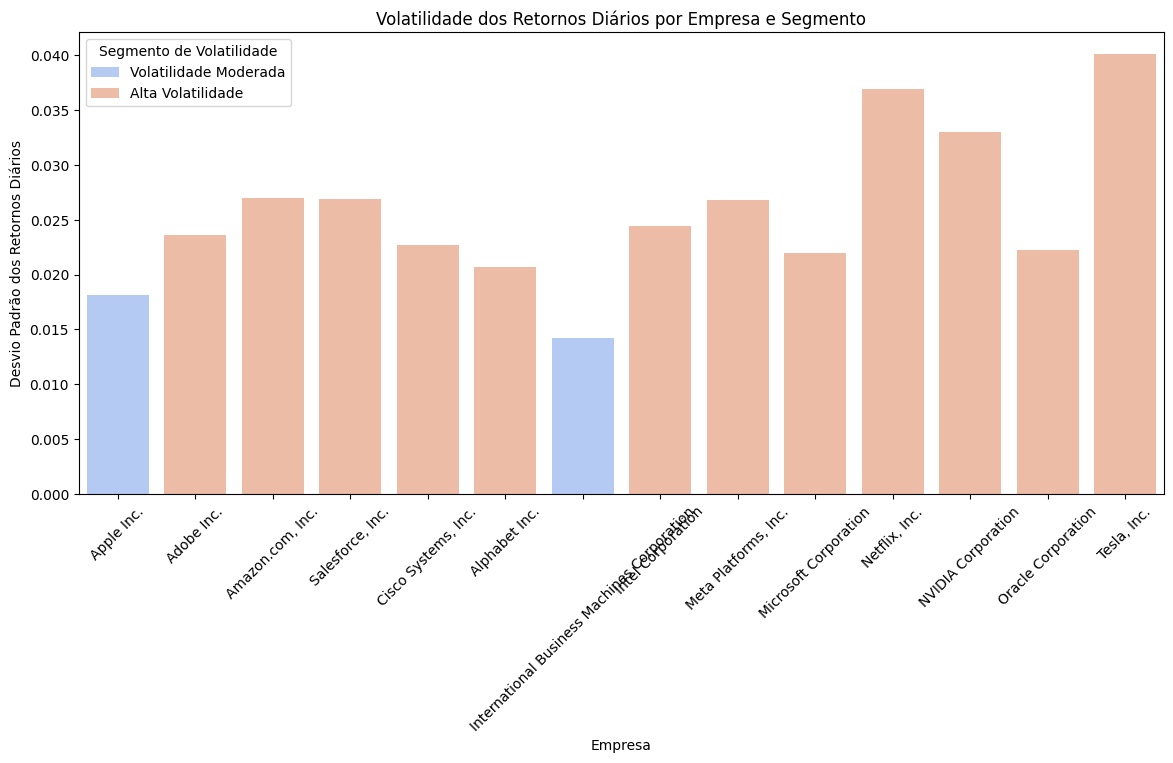

In [ ]:
#carregar o df original do arquivo CSV
df_original = pd.read_csv('/content/stock_prices_clean.csv')

#criar cópia do DF original
df_copy = df_original.copy()

#função para segmentar a volatilidade
def segmentar_volatilidade(std):
    if std > 0.02:
        return 'Alta Volatilidade'
    elif 0.01 < std <= 0.02:
        return 'Volatilidade Moderada'
    else:
        return 'Baixa Volatilidade'

#calcular o desvio padrão dos retornos diários por empresa
volatilidade = df_copy.groupby('company')['daily_return'].std().reset_index()
volatilidade.columns = ['company', 'std']

#unir a volatilidade ao df_copy
df_copy = pd.merge(df_copy, volatilidade, on='company')

#aplicar a segmentação
df_copy['segmento_volatilidade'] = df_copy['std'].apply(segmentar_volatilidade)

#salvar os resultados em uma nova tabela chamada segmentacao_volatilidade
df_copy.to_csv('/content/segmentacao_volatilidade.csv', index=False)

#resultados descritos
for index, row in volatilidade.iterrows():
    segmento = segmentar_volatilidade(row['std'])
    print(f"Empresa: {row['company']}, Desvio Padrão: {row['std']:.4f}, Segmento: {segmento}")

#visualização com gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x='company', y='std', hue='segmento_volatilidade', data=df_copy, palette='coolwarm')
plt.title('Volatilidade dos Retornos Diários por Empresa e Segmento')
plt.xlabel('Empresa')
plt.ylabel('Desvio Padrão dos Retornos Diários')
plt.xticks(rotation=45)
plt.legend(title='Segmento de Volatilidade')
plt.show()

**Alta Volatilidade:** Desvio padrão acima de 0.0200

*   Um desvio padrão alto indica que o preço da ação pode oscilar significativamente em um curto período de tempo.

**Volatilidade Moderada:** Desvio padrão entre 0.0150 e 0.0200

*   Um desvio padrão baixo significa que o preço da ação é mais estável.

---
A volatilidade representa a dispersão dos retornos das ações, não o risco em si. Ações voláteis podem ter retornos altos ou baixos, enquanto ações menos voláteis podem ter retornos consistentes, mas potencialmente mais baixos.

A análise da volatilidade complementa as outras métricas financeiras e análises técnicas para fornecer uma compreensão mais completa do perfil de risco e retorno de uma empresa.

A tolerância ao risco é um fator crucial para o sucesso do investimento, pois ao compreender a volatilidade de diferentes empresas, os novos investidores podem escolher ativos que se alinham com seu perfil de risco individual.

In [ ]:
df_seg_volatilidade = pd.read_csv('/content/segmentacao_volatilidade.csv')
print(df_seg_volatilidade.info())
print(df_seg_volatilidade.dtypes)
print(df_seg_volatilidade.head())

###Segmentação por Setor

A segmentação por setor, com a adição de mais contexto sobre as empresas, fornece uma visão geral do CAGR e da volatilidade anualizada para cada empresa e permite identificar empresas com diferentes características de crescimento e risco.

In [ ]:
#análise do CAGR (Taxa de Crescimento Anual Composta) e a volatilidade das ações de 14 empresas durante os últimos 5 anos e segmentação das empresas por setor

#import df
df = pd.read_csv('/content/stock_prices_clean.csv')

#convertendo colunas para tipos corretos
df['date'] = pd.to_datetime(df['date']) #converte date para datetime do Pandas

#Dicionário contendo o setor de cada símbolo de ação
#adc informações de setor
setor_info = {
    'AAPL': 'Tecnologia',
    'ADBE': 'Tecnologia',
    'AMZN': 'Consumo e Varejo',
    'CRM': 'Tecnologia',
    'CSCO': 'Tecnologia',
    'GOOGL': 'Serviços de comunicação',
    'IBM': 'Tecnologia',
    'INTC': 'Tecnologia',
    'META': 'Serviços de comunicação',
    'MSFT': 'Tecnologia',
    'NFLX': 'Serviços de comunicação',
    'NVDA': 'Tecnologia',
    'ORCL': 'Tecnologia',
    'TSLA': 'Automotivo'
}

#Dicionário contendo o nome completo da empresa para cada símbolo de ação
#símbolos de ação para os nomes das empresas
company_info = {
    'AAPL': 'Apple Inc.',
    'ADBE': 'Adobe Inc.',
    'AMZN': 'Amazon.com, Inc.',
    'CRM': 'Salesforce, Inc.',
    'CSCO': 'Cisco Systems, Inc.',
    'GOOGL': 'Alphabet Inc.',
    'IBM': 'International Business Machines Corporation',
    'INTC': 'Intel Corporation',
    'META': 'Meta Platforms, Inc.',
    'MSFT': 'Microsoft Corporation',
    'NFLX': 'Netflix, Inc.',
    'NVDA': 'NVIDIA Corporation',
    'ORCL': 'Oracle Corporation',
    'TSLA': 'Tesla, Inc.'
}

#adc informações de empresa e setor
df['company'] = df['stock_symbol'].map(company_info) #nova coluna company mapeando cada símbolo de ação para o setor da empresa do dicionário company_info
df['setor'] = df['stock_symbol'].map(setor_info) #nova coluna setor mapeando cada símbolo de ação para o setor da empresa do dicionário setor_info

#cópia do dataframe original para a análise para evitar modificar o dataframe original durante a análise
df_copy = df.copy()

#filtrar os últimos 5 anos de dados
end_date = df_copy['date'].max() #obtém a data mais recente no dataframe df_copy
start_date = end_date - pd.DateOffset(years=5) #calcula a data 5 anos antes da data mais recente
df_5_years = df_copy[df_copy['date'] >= start_date] #filtra o df_copy para incluir apenas dados a partir da data de 5 anos atrás

#Funções para cálculo de CAGR e Volatilidade:
    #função para calcular CAGR
    def calculate_cagr(df, symbol):
        df_symbol = df[df['stock_symbol'] == symbol]
        if len(df_symbol) == 0:
            return np.nan
        start_price = df_symbol['adj_close'].iloc[0]
        end_price = df_symbol['adj_close'].iloc[-1]
        n = len(df_symbol) / 252  #aprox 252 dias úteis por ano
        cagr = (end_price / start_price) ** (1 / n) - 1
        return cagr #retorna o CAGR do símbolo de ação, se houver dados disponíveis, ou NaN caso contrário

    #função para calcular a volatilidade anualizada
    def calculate_volatility(df, symbol):
        df_symbol = df[df['stock_symbol'] == symbol]
        if len(df_symbol) == 0:
            return np.nan
        daily_returns = df_symbol['daily_return'] #calcula a volatilidade diária dos retornos
        volatility = np.std(daily_returns) * np.sqrt(252)  # Annualizando a volatilidade
        return volatility #retorna a volatilidade anualizada do símbolo de ação, se houver dados disponíveis, ou NaN caso contrário

#cálculo de CAGR e Volatilidade para todas as empresas
cagr_list = [] #cria uma lista vazia para armazenar os valores de CAGR
volatility_list = [] #cria uma lista vazia para armazenar os valores de volatilidade
symbols = df_5_years['stock_symbol'].unique() #obtém a lista de símbolos de ações únicos presentes no dataframe filtrado

for symbol in symbols:
    cagr = calculate_cagr(df_5_years, symbol) #função para calcular o CAGR
    volatility = calculate_volatility(df_5_years, symbol) #função para calcular a volatilidade anualizada
    cagr_list.append(cagr) #adc os valores calculados de CAGR a lista cagr_list
    volatility_list.append(volatility) #adc os valores calculados de volatilidade a lista volatility_list

#criação de novo dataframe para armazenar as métricas com 3 colunas
metrics_df = pd.DataFrame({'stock_symbol': symbols, 'cagr': cagr_list, 'volatility': volatility_list})

#adc informações de empresa e setor ao novo dataframe
metrics_df['company'] = metrics_df['stock_symbol'].map(company_info)
metrics_df['setor'] = metrics_df['stock_symbol'].map(setor_info)

#verificar se há valores NaN no dataframe de métricas
print(metrics_df.isna().sum()) #imprime a soma de valores NaN (Not a Number)

#verificar os dados
print(metrics_df.head()metrics_df[['stock_symbol', 'company', 'setor', 'cagr', 'volatility') #imprime as primeiras 5 linhas do dataframe para verificar os dados calculados

#salvar o resultado da segmentação por setor em uma nova tabela
metrics_df.to_csv('segmentacao_setor.csv', index=False) #index=False evita salvar o índice do dataframe no arquivo CSV


stock_symbol    0
cagr            0
volatility      0
company         0
setor           0
dtype: int64
  stock_symbol      cagr  volatility              company             setor
0         AAPL  0.260226    0.336536           Apple Inc.        Tecnologia
1         ADBE  0.114484    0.376043           Adobe Inc.        Tecnologia
2         AMZN  0.044612    0.359256     Amazon.com, Inc.  Consumo e Varejo
3          CRM  0.033142    0.392995     Salesforce, Inc.        Tecnologia
4         CSCO  0.054764    0.293667  Cisco Systems, Inc.        Tecnologia


In [ ]:
print(metrics_df.info)

<bound method DataFrame.info of    stock_symbol      cagr  volatility  \
0          AAPL  0.260226    0.336536   
1          ADBE  0.114484    0.376043   
2          AMZN  0.044612    0.359256   
3           CRM  0.033142    0.392995   
4          CSCO  0.054764    0.293667   
5         GOOGL  0.087183    0.315332   
6           IBM  0.025805    0.275389   
7          INTC -0.080360    0.380207   
8          META -0.051636    0.432534   
9          MSFT  0.230987    0.311611   
10         NFLX  0.022151    0.477116   
11         NVDA  0.204376    0.520467   
12         ORCL  0.115168    0.300421   
13         TSLA  0.401366    0.658330   

                                        company                    setor  
0                                    Apple Inc.               Tecnologia  
1                                    Adobe Inc.               Tecnologia  
2                              Amazon.com, Inc.         Consumo e Varejo  
3                              Salesforce, Inc.     

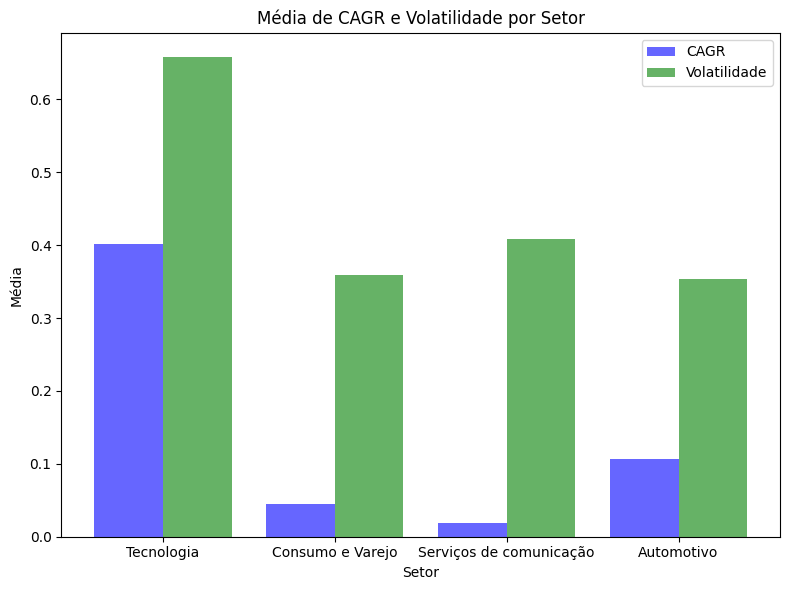

In [ ]:
#Visualização
#gráfico barras da segmentação por setor
def plot_sector_analysis(df):
    setores = df['setor'].unique()
    plt.figure(figsize=(8, 6))

    #média de CAGR e volatilidade por setor
    mean_cagr = df.groupby('setor')['cagr'].mean()
    mean_volatility = df.groupby('setor')['volatility'].mean()

    #gráfico de barras
    bar_width = 0.4
    index = np.arange(len(setores))
    opacity = 0.6

    plt.bar(index, mean_cagr, bar_width, alpha=opacity, color='b', label='CAGR')
    plt.bar(index + bar_width, mean_volatility, bar_width, alpha=opacity, color='g', label='Volatilidade')

    plt.xlabel('Setor')
    plt.ylabel('Média')
    plt.title('Média de CAGR e Volatilidade por Setor')
    plt.xticks(index + bar_width / 2, setores)
    plt.legend()

    plt.tight_layout()
    plt.show()

#chamar a função de plotagem
plot_sector_analysis(metrics_df)


**Empresas com Alto CAGR e Alta Volatilidade:**
1.   Tesla, Inc.
2.   NVIDIA Corporation
3.   Apple Inc.
4.   Microsoft Corporation
*   Essas empresas apresentaram forte crescimento nos últimos anos, mas também experimentaram alta oscilação nos preços das ações.
*   São adequadas para investidores com alta tolerância ao risco que buscam retornos potencialmente altos.

**Empresas com Alto CAGR e Baixa Volatilidade:**
1.   Oracle Corporation
2.   Adobe Inc.
*   Essas empresas combinam bom crescimento com relativa estabilidade nos preços das ações.
*   Podem ser atraentes para investidores que buscam um equilíbrio entre retorno e risco.

**Empresas com Baixo CAGR e Alta Volatilidade:**
1.   Meta Platforms, Inc.
2.   Netflix, Inc.
*   Essas empresas apresentaram baixo crescimento e alta oscilação nos preços das ações, indicando potencial incerteza sobre seu futuro.
*   Devem ser analisadas com cautela por investidores, considerando outros fatores além do CAGR e volatilidade.

**Empresas com Baixo CAGR e Baixa Volatilidade:**
1.   Amazon.com, Inc.
2.   Salesforce, Inc.
3.   Cisco Systems, Inc.
4.   Alphabet Inc. (Google)
5.   International Business Machines Corporation (IBM)
6.   Intel Corporation
*   Essas empresas apresentaram crescimento lento e relativa estabilidade nos preços das ações.
*   Podem ser adequadas para investidores conservadores que buscam renda passiva e proteção contra perdas significativas.




# Risco Relativo

Risco Relativo de cada empresa, definido como a razão entre volatilidade e CAGR, para identificar as ações com maior risco (valores altos) ou menor risco (valores baixos) relativo em relação ao seu potencial de crescimento.

   stock_symbol                                      company  \
10         NFLX                                Netflix, Inc.   
3           CRM                             Salesforce, Inc.   
6           IBM  International Business Machines Corporation   
2          AMZN                             Amazon.com, Inc.   
4          CSCO                          Cisco Systems, Inc.   
5         GOOGL                                Alphabet Inc.   
1          ADBE                                   Adobe Inc.   
12         ORCL                           Oracle Corporation   
11         NVDA                           NVIDIA Corporation   
13         TSLA                                  Tesla, Inc.   
9          MSFT                        Microsoft Corporation   
0          AAPL                                   Apple Inc.   
7          INTC                            Intel Corporation   
8          META                         Meta Platforms, Inc.   

                      setor      cagr  

<ipython-input-16-dc5c17109097>:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm) #função para adicionar uma barra de cores ao gráfico, facilitando a interpretação dos valores de risco relativo


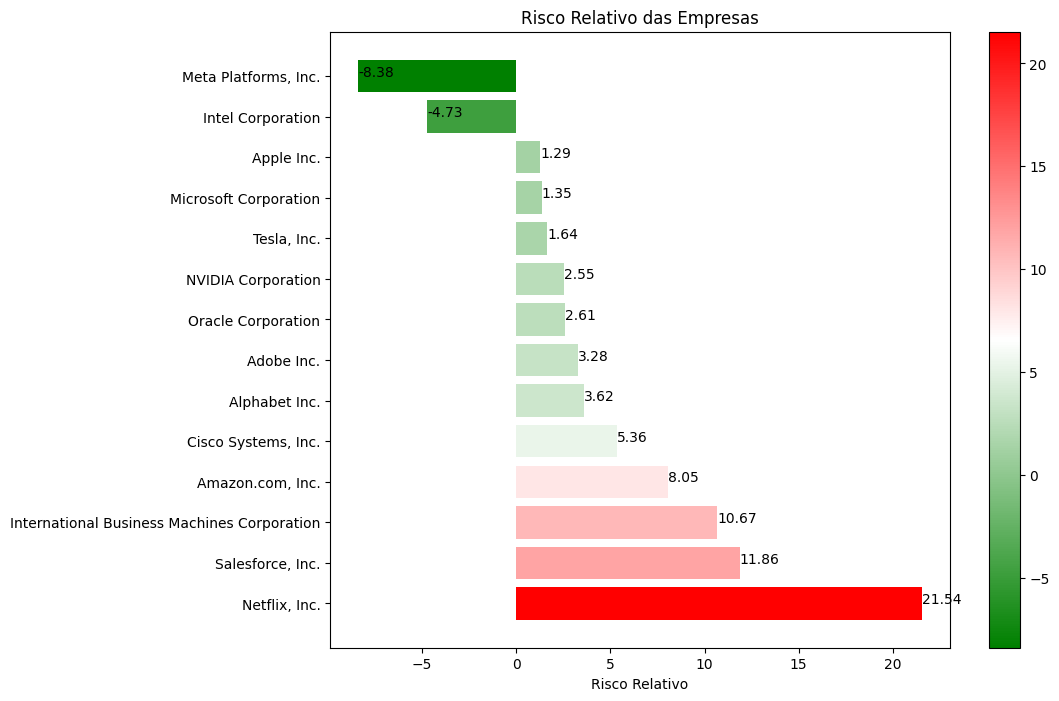

In [ ]:
#Risco Relativo
import matplotlib.colors as colors

#carregar o DataFrame a partir do arquivo de segmentação por setor para um dataframe chamado df_original
#lê o arquivo CSV contendo os resultados da análise de CAGR e volatilidade realizada anteriormente (segmentacao_setor.csv)
df_original = pd.read_csv('/content/segmentacao_setor.csv')

#cópia do df_original para evitar modificar o dataframe original durante a análise
df_copy = df_original.copy()

#calcular o risco relativo
#adc uma nova coluna risco_relativo ao df_copy, calculando a razão entre volatilidade e CAGR para cada empresa
df_copy['risco_relativo'] = df_copy['volatility'] / df_copy['cagr']

#ordenação por risco relativo em ordem decrescente (do maior para o menor)
df_copy = df_copy.sort_values(by='risco_relativo', ascending=False)

#salvar os resultados do RR em uma nova tabela chamada risco_relativo
df_copy.to_csv('/content/risco_relativo.csv', index=False) #o index=False evita salvar o índice do dataframe no arquivo CSV

#resultados descritos
print(df_copy[['stock_symbol', 'company', 'setor', 'cagr', 'volatility', 'risco_relativo']])

#gráfico de barras horizontal
plt.figure(figsize=(10, 8))

#colormap personalizado
cmap = colors.LinearSegmentedColormap.from_list("", ["green", "white", "red"])
#cmap = colors.LinearSegmentedColormap.from_list("", ["red", "orange", "yellow", "green"])


# Normalizar os valores de risco relativo para aplicar o colormap
norm = plt.Normalize(df_copy['risco_relativo'].min(), df_copy['risco_relativo'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#aplicar o colormap às barras
bar_colors = cmap(norm(df_copy['risco_relativo'].values))

#criar o gráfico de barras horizontal
bars = plt.barh(df_copy['company'], df_copy['risco_relativo'], color=bar_colors)
plt.xlabel('Risco Relativo') #rótulo do eixo x como "Risco Relativo"
plt.title('Risco Relativo das Empresas') #título do gráfico

#adc valores numéricos ao lado de cada barra
for index, value in enumerate(df_copy['risco_relativo']):
    plt.text(value, index, f'{value:.2f}') #valor formatado com duas casas decimais

#adc barra de cores
plt.colorbar(sm) #função para adicionar uma barra de cores ao gráfico, facilitando a interpretação dos valores de risco relativo

#exibe o gráfico criado
plt.show()


A técnica de risco relativo, compara a volatilidade (oscilação do preço da ação) com o retorno (CAGR) para avaliar o risco de cada empresa.

Empresas com alto risco relativo apresentam alta volatilidade em relação ao seu retorno, enquanto empresas com baixo risco relativo apresentam menor oscilação em relação ao seu retorno.


**Empresas com Baixo Risco Relativo:**
*   **ORCL (Oracle):** Risco relativo de 2.61, com bom retorno (CAGR de 11.5%) e volatilidade baixa (30.0%).
*   **NVDA (NVIDIA):** Risco relativo de 2.55, com retorno excelente (CAGR de 20.4%) e volatilidade alta (52.0%).
*   **TSLA (Tesla):** Risco relativo de 1.64, com retorno muito alto (CAGR de 40.1%) e volatilidade altíssima (65.8%).
*   **MSFT (Microsoft):** Risco relativo de 1.35, com bom retorno (CAGR de 23.1%) e volatilidade baixa (31.2%).
*   **AAPL (Apple):** Risco relativo de 1.29, com retorno excelente (CAGR de 26.0%) e volatilidade moderada (33.7%).


**Empresas com Risco Relativo Moderado:**
*   **AMZN (Amazon):** Risco relativo de 8.05, com bom retorno (CAGR de 4.5%) e volatilidade moderada (35.9%).
*   **CSCO (Cisco Systems):** Risco relativo de 5.36, com retorno decente (CAGR de 5.5%) e volatilidade baixa (29.4%).
*   **GOOGL (Alphabet):** Risco relativo de 3.62, com bom retorno (CAGR de 8.7%) e volatilidade baixa (31.5%).
*   **ADBE (Adobe):** Risco relativo de 3.28, com retorno alto (CAGR de 11.4%) e volatilidade moderada (37.6%).


**Empresas com Maior Risco Relativo:**

*   **NFLX (Netflix):** Maior risco relativo (21.54), combinando alto retorno (CAGR de 2.2%) com alta volatilidade (47.7%).
*   **CRM (Salesforce):** Segundo maior risco relativo (11.86), com bom retorno (CAGR de 3.3%) e volatilidade moderada (39.3%).
*   **IBM (International Business Machines):** Terceiro maior risco relativo (10.67), com retorno modesto (CAGR de 2.6%) e volatilidade baixa (27.5%).


**Empresas com Desempenho Negativo:**
*   **INTC (Intel Corporation):** Risco relativo (-4.73) com retorno negativo (CAGR de -0.08%) sugere um declínio no valor das ações nos últimos anos. A volatilidade moderada (0.38) indica que o preço das ações oscilam dentro de uma faixa razoável, mas ainda apresentam risco.

✚ **Setor em transformação:** A indústria de semicondutores enfrenta desafios e incertezas, o que pode afetar o futuro da empresa e pode ser uma explicação para o eclínio no valor das ações da Intel.*

✚ **Recomendações:** Considerar com cautela, devido ao alto risco relativo e ao desempenho recente negativo. Realizar uma análise aprofundada do setor e da empresa antes de tomar decisões de investimento.

*   **META - Meta Platforms, Inc.:** Risco relativo (-8.38) com retorno negativo (CAGR de -0.05%) sugere uma queda significativa no valor das ações nos últimos anos. A volatilidade moderada (0.43) indica que o preço da ação oscila com amplitude considerável, elevando o risco para investimentos.

✚ **Desafios no setor:** A Meta, empresa do Facebook, enfrenta forte concorrência e incertezas regulatórias, impactando negativamente o seu futuro.

✚ **Recomendações:** Altamente desaconselhável para investimentos, devido ao risco extremamente alto e ao desempenho recente negativo. Buscar alternativas com menor risco e perspectivas mais promissoras.

# Análise por Coorte

In [ ]:
import pandas as pd
import plotly.graph_objects as go #essa biblioteca oferece mais controle e flexibilidade para a criação de gráficos personalizados

#import do df
df_original = pd.read_csv('/content/stock_prices_clean.csv')

#garantir que a coluna 'date' esteja no formato datetime
df_original['date'] = pd.to_datetime(df_original['date'])

#cópia do df_original para evitar modificar o dataframe original durante a análise
df_copy = df_original.copy()

#criar a nova coluna 'year' a partir de date
df_copy['year'] = df_copy['date'].dt.year

#calcular a média de 'adj_close' por 'company' e 'year'
#agrupa por company (empresa) e year (ano) dentro de cada grupo calcula a média de adj_close e armazena em cohort_analysis
cohort_analysis = df_copy.groupby(['company', 'year'])['adj_close'].mean().unstack()  #a função unstack() transforma o índice multinível (empresa e ano) em colunas separadas

#salvar o resultado em uma nova tabela chamada analise_coorte
cohort_analysis.to_csv('/content/analise_coorte.csv')

#exibir a análise de coorte
print('Análise de Coorte: ')
print(cohort_analysis)

#criar heatmap interativo com Plotly
fig = go.Figure(data=go.Heatmap(
    z=cohort_analysis.values,
    x=cohort_analysis.columns,
    y=cohort_analysis.index,
    colorscale='Spectral',
    colorbar=dict(title='Média de Preço Ajustado de Fechamento')
))

fig.update_layout(
    title='Análise de Coorte dos Preços Ajustados de Fechamento',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Empresa')
)

fig.show()


Análise de Coorte: 
year                                              2010        2011  \
company                                                              
Adobe Inc.                                   31.211905   30.124881   
Alphabet Inc.                                13.403981   14.238593   
Amazon.com, Inc.                              6.957020    9.833601   
Apple Inc.                                    7.910513   11.081564   
Cisco Systems, Inc.                          16.349147   12.300110   
Intel Corporation                            14.176368   15.555628   
International Business Machines Corporation  81.798077  107.922131   
Meta Platforms, Inc.                               NaN         NaN   
Microsoft Corporation                        20.902698   20.607843   
NVIDIA Corporation                            3.111909    3.874644   
Netflix, Inc.                                16.824172   27.493719   
Oracle Corporation                           21.364792   26.512069   


**Desempenho por Empresa:**

*   **Adobe:** Crescimento significativo ao longo do período, com destaque para o salto entre 2018 e 2019.
*   **Alphabet:** Crescimento sólido, com aumentos constantes e poucas variações.
*   **Amazon:** Crescimento consistente, com aceleração em 2020.
*   **Apple:** Crescimento notável, com aumentos significativos em anos específicos.
*   **Cisco:** Crescimento moderado, com certa estabilidade ao longo do tempo.
*   **Intel:** Crescimento lento, com quedas pontuais em alguns anos.
*   **IBM:** Crescimento estagnado, com aumento expressivo apenas no início do período.
*   **Meta Platforms (Facebook):** Crescimento exponencial, especialmente a partir de 2014.
*   **Microsoft:** Crescimento consistente, com aumentos expressivos a partir de 2018.
*   **NVIDIA:** Crescimento variável, com altos e baixos ao longo do período.
*   **Netflix:** Crescimento exponencial, com aumentos vertiginosos em anos específicos.
*   **Oracle:** Crescimento moderado, com certa estabilidade.
*   **Salesforce:** Crescimento significativo, com aumentos expressivos em determinados anos.
*   **Tesla:** Crescimento inicial lento, seguido por aumentos expressivos a partir de 2019.


---


*OBS: Os dados de 2023 não estão disponíveis para todas as empresas, dificultando a comparação com o ano anterior.*


# Análise de Significância

A análise de significância estatística é um procedimento que verifica a discrepância entre uma hipótese estatística e os dados observados, utilizando uma medida de evidência chamada p-valor.

 **Teste de Shapiro-Wilk:**
- Realizado para cada segmento de crescimento (Alto, Moderado e Baixo) a fim de verificar se a distribuição do CAGR é normal.
- Se p > 0.05, a amostra parece normal (não há evidências para rejeitar a hipótese nula de normalidade).
- Se p <= 0.05, a amostra não parece normal (há evidências para rejeitar a hipótese nula de normalidade).

**Resultados:**

- Alto Crescimento (p-valor = 0.993): A distribuição do CAGR para o segmento de Alto Crescimento parece normal.
- Crescimento Moderado (p-valor = 0.539): A distribuição do CAGR para o segmento de Crescimento Moderado também parece normal.
- Baixo Crescimento (p-valor = 0.076): A distribuição do CAGR para o segmento de Baixo Crescimento pode não ser estritamente normal, mas a evidência contra a normalidade é fraca.

**Teste ANOVA:**
- Realizado para verificar se existem diferenças significativas no CAGR entre os segmentos de crescimento comparando o CAGR entre os 3 segmentos.
- Se p < 0.05, há diferenças significativas entre os segmentos de crescimento (rejeita a hipótese nula de igualdade das médias).
- Se p >= 0.05, não há diferenças significativas entre os segmentos de crescimento (não rejeita a hipótese nula de igualdade das médias).

**Resultados:**

- As empresas de alto crescimento apresentam CAGR médios significativamente maiores do que as empresas de crescimento moderado e baixo.

**O valor de p é comparado com o nível de significância (0.05).**

- Os testes de Shapiro-Wilk sugerem que as distribuições de CAGR para os três segmentos podem ser consideradas aproximadamente normais, com a exceção de uma possível leve anormalidade no segmento de Baixo Crescimento.
- O teste ANOVA confirma que existem diferenças estatisticamente significativas no CAGR entre os segmentos de crescimento.

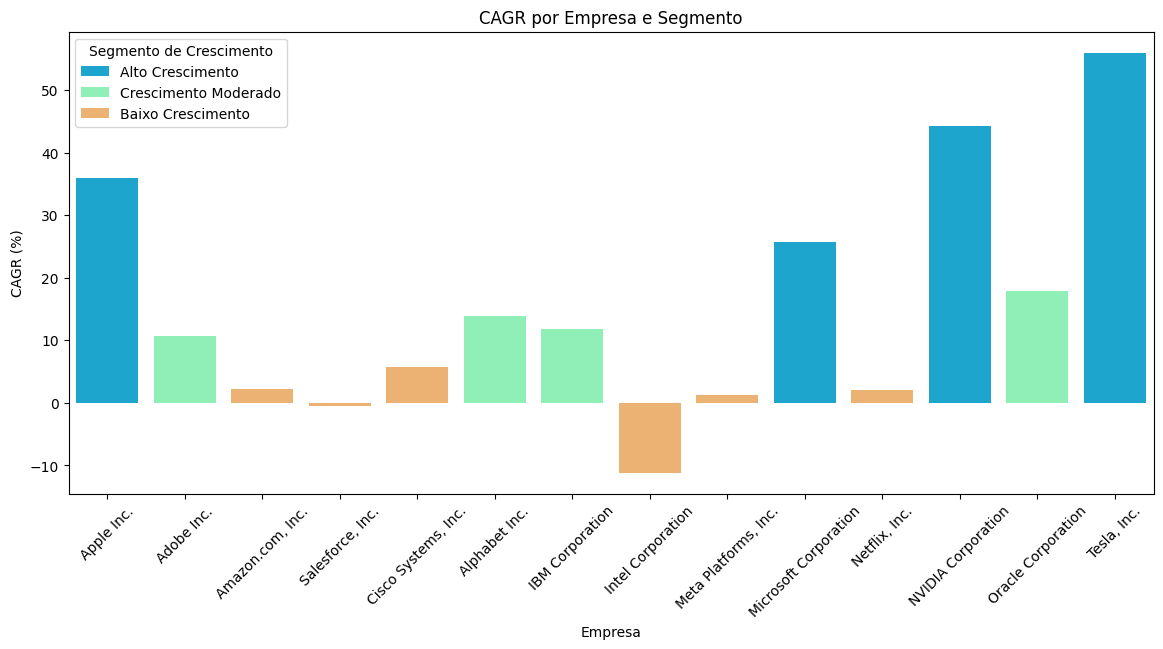

Teste de Shapiro-Wilk para o segmento Alto Crescimento: Estatística=0.998, p-valor=0.993
   Amostra parece normal (não rejeita H0)
Teste de Shapiro-Wilk para o segmento Crescimento Moderado: Estatística=0.920, p-valor=0.539
   Amostra parece normal (não rejeita H0)
Teste de Shapiro-Wilk para o segmento Baixo Crescimento: Estatística=0.813, p-valor=0.076
   Amostra parece normal (não rejeita H0)

Teste ANOVA para CAGR entre os segmentos de crescimento:
Estatística F=31.375, p-valor=0.000
   Há diferenças significativas entre os segmentos de crescimento (rejeita H0)


In [ ]:
from scipy.stats import shapiro, f_oneway

#dados do CAGR fornecidos manualmente
cagr_data = {
    'company': ['Apple Inc.', 'Adobe Inc.', 'Amazon.com, Inc.', 'Salesforce, Inc.', 'Cisco Systems, Inc.',
                'Alphabet Inc.', 'IBM Corporation', 'Intel Corporation',
                'Meta Platforms, Inc.', 'Microsoft Corporation', 'Netflix, Inc.', 'NVIDIA Corporation',
                'Oracle Corporation', 'Tesla, Inc.'],
    'cagr': [35.92, 10.76, 2.27, -0.56, 5.73, 13.84, 11.74, -11.16, 1.33, 25.67, 2.13, 44.31, 17.84, 55.99]
}

#criação do df de CAGR
df_cagr = pd.DataFrame(cagr_data)

#função para segmentar o crescimento do CAGR
def segmentar_cagr(cagr):
    if cagr > 20:
        return 'Alto Crescimento'
    elif 10 < cagr <= 20:
        return 'Crescimento Moderado'
    else:
        return 'Baixo Crescimento'

#segmentação ao DataFrame de CAGR
df_cagr['segmento_cagr'] = df_cagr['cagr'].apply(segmentar_cagr)

#gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x='company', y='cagr', hue='segmento_cagr', data=df_cagr, palette='rainbow')
plt.title('CAGR por Empresa e Segmento')
plt.xlabel('Empresa')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=45)
plt.legend(title='Segmento de Crescimento')
plt.show()

#Teste de Normalidade para cada grupo de segmento de crescimento
for segmento in df_cagr['segmento_cagr'].unique():
    segmento_data = df_cagr[df_cagr['segmento_cagr'] == segmento]['cagr']
    stat, p = shapiro(segmento_data)
    print(f'Teste de Shapiro-Wilk para o segmento {segmento}: Estatística={stat:.3f}, p-valor={p:.3f}')
    if p > 0.05:
        print('   Amostra parece normal (não rejeita H0)')
    else:
        print('   Amostra não parece normal (rejeita H0)')

#Teste ANOVA para verificar diferenças entre os segmentos de crescimento
stat, p = f_oneway(
    df_cagr[df_cagr['segmento_cagr'] == 'Alto Crescimento']['cagr'],
    df_cagr[df_cagr['segmento_cagr'] == 'Crescimento Moderado']['cagr'],
    df_cagr[df_cagr['segmento_cagr'] == 'Baixo Crescimento']['cagr']
)
print('\nTeste ANOVA para CAGR entre os segmentos de crescimento:')
print(f'Estatística F={stat:.3f}, p-valor={p:.3f}')
if p < 0.05:
    print('   Há diferenças significativas entre os segmentos de crescimento (rejeita H0)')
else:
    print('   Não há diferenças significativas entre os segmentos de crescimento (não rejeita H0)')

# Hipóteses

Hipóteses sobre os dados das big techs

Para modelar a relação entre o preço das ações e outras variáveis relevantes e prever os preços ajustados de fechamento (adj_close).

## Hipótese 1

**As ações das big techs com maior crescimento anual composto (CAGR) apresentam menor volatilidade nos retornos diários.**

*   **Refutada:** A relação é oposta ao esperado (maior crescimento está associado a maior volatilidade).

In [ ]:
import numpy as np
from scipy.stats import pearsonr

#coluna 'date' do tipo datetime
df['date'] = pd.to_datetime(df['date'])

#1-calcular o CAGR para cada empresa:
def calculate_cagr(start_value, end_value, periods):
    return (end_value/start_value)**(1/periods) - 1

cagr_dict = {}
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    start_value = company_data.iloc[0]['adj_close']
    end_value = company_data.iloc[-1]['adj_close']
    periods = (company_data['date'].iloc[-1] - company_data['date'].iloc[0]).days / 365
    cagr_dict[company] = calculate_cagr(start_value, end_value, periods)

cagr_df = pd.DataFrame(list(cagr_dict.items()), columns=['company', 'CAGR'])


#2-calcular a volatilidade dos retornos diários para cada empresa:
volatility_dict = {}
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    daily_returns = company_data['adj_close'].pct_change().dropna()
    volatility_dict[company] = daily_returns.std()

volatility_df = pd.DataFrame(list(volatility_dict.items()), columns=['company', 'Volatility'])


#3-analisar a correlação entre CAGR e volatilidade dos retornos diários:
analysis_df = pd.merge(cagr_df, volatility_df, on='company')
correlation = analysis_df['CAGR'].corr(analysis_df['Volatility'])
print(f"Correlação entre CAGR e Volatilidade: {correlation}")

#from scipy.stats import pearsonr
corr, p_value = pearsonr(analysis_df['CAGR'], analysis_df['Volatility'])
print(f"Teste de correlação de Pearson: Correlação = {corr}, Valor p = {p_value}")


Correlação entre CAGR e Volatilidade: 0.8162492756984856
Teste de correlação de Pearson: Correlação = 0.8162492756984858, Valor p = 0.00036933838682115354


Visualizar a relação entre CAGR e volatilidade usando um gráfico de dispersão para ilustrar a correlação positiva entre o crescimento das ações e sua volatilidade.

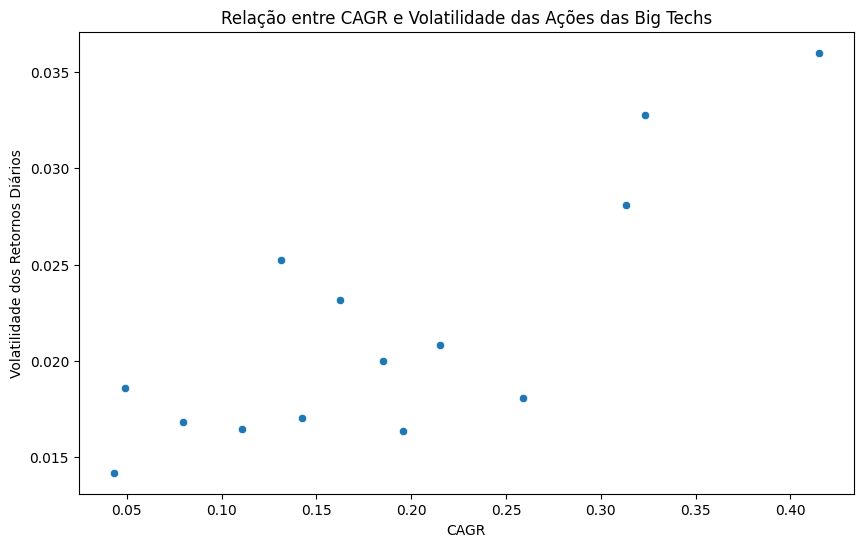

In [ ]:
#gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=analysis_df['CAGR'], y=analysis_df['Volatility'])

#adc títulos e rótulos
plt.title('Relação entre CAGR e Volatilidade das Ações das Big Techs')
plt.xlabel('CAGR')
plt.ylabel('Volatilidade dos Retornos Diários')
plt.show()

**Resultados**

*   Correlação entre CAGR e Volatilidade: 0.8162492756984856
*   Teste de correlação de Pearson:
1.   Correlação = 0.8162492756984858
2.   Valor p = 0.00036933838682115354


**Análise**

*   Correlação Forte e Positiva: A correlação de 0.8162 indica uma relação forte e positiva entre CAGR e volatilidade.
*   Significância Estatística: O valor p é significativamente menor que 0.05, indicando que a correlação observada é estatisticamente significativa.

**Conclusão**

*   **Hipótese Refutada:** Embora exista uma correlação forte e significativa, a relação é positiva, o que significa que as ações com maior crescimento (CAGR) tendem a ter maior volatilidade, não menor. Portanto, a hipótese de que as ações com maior crescimento apresentam menor volatilidade é refutada. Na verdade, elas tendem a ser mais voláteis.

## Hipótese 2

**As empresas de tecnologia com maior volume de negociação apresentam menor volatilidade nos retornos diários.**

*   **Refutada:** Não há relação significativa entre volume de negociação e volatilidade.

In [ ]:
#calcular o volume médio de negociação diário para cada empresa
avg_volume = df.groupby('company')['volume'].mean().reset_index()
avg_volume.columns = ['company', 'avg_volume']

#unir volatilidade e volume médio
volatility_volume_df = pd.merge(analysis_df, avg_volume, on='company')

#correlação entre volume médio de negociação e volatilidade
correlation = volatility_volume_df['avg_volume'].corr(volatility_volume_df['Volatility'])
pearson_corr = pearsonr(volatility_volume_df['avg_volume'], volatility_volume_df['Volatility'])

#resultados
print(f"Correlação entre Volume Médio de Negociação e Volatilidade: {correlation}")
print(f"Teste de correlação de Pearson: Correlação = {pearson_corr[0]}, Valor p = {pearson_corr[1]}")


Correlação entre Volume Médio de Negociação e Volatilidade: 0.017926989088759625
Teste de correlação de Pearson: Correlação = 0.0179269890887596, Valor p = 0.9514970637555173


Visualizar a relação entre o volume médio de negociação e a volatilidade dos retornos diários com um gráfico de dispersão para confirmar a ausência de uma relação clara entre as duas variáveis.

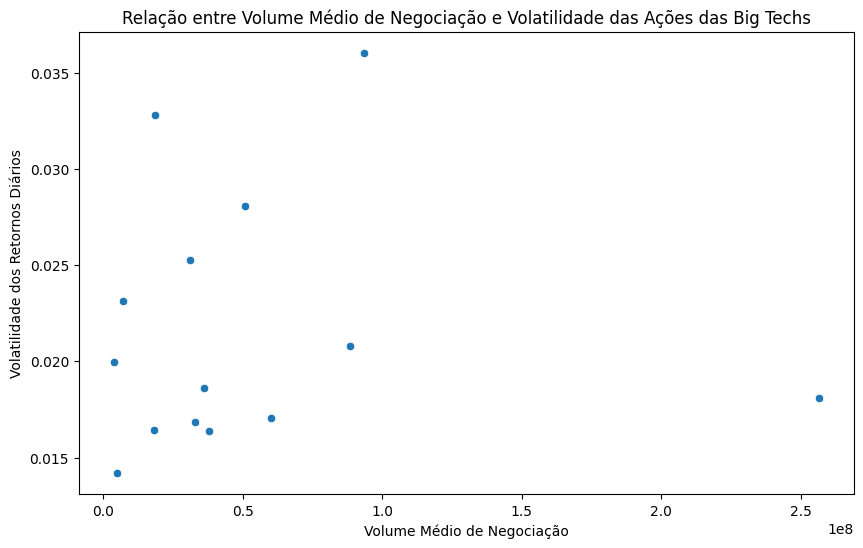

In [ ]:
#gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=volatility_volume_df['avg_volume'], y=volatility_volume_df['Volatility'])

#adc títulos e rótulos
plt.title('Relação entre Volume Médio de Negociação e Volatilidade das Ações das Big Techs')
plt.xlabel('Volume Médio de Negociação')
plt.ylabel('Volatilidade dos Retornos Diários')
plt.show()

**Resultados**

*   Correlação entre Volume Médio de Negociação e Volatilidade: 0.017926989088759625
*   Teste de correlação de Pearson:
1.   Correlação = 0.0179269890887596
2.   Valor p = 0.9514970637555173


**Análise**

*   Correlação Quase Inexistente: A correlação de 0.0179 é praticamente zero, indicando nenhuma relação significativa entre o volume médio de negociação e a volatilidade.
*   Significância Estatística: O valor p é muito alto, indicando que a correlação observada não é estatisticamente significativa.

**Conclusão**

*   **Hipótese Refutada:** A correlação muito próxima de zero e o valor p alto indicam que não há uma relação significativa entre o volume médio de negociação e a volatilidade dos retornos diários.
Não há evidências para sugerir que o volume médio de negociação tem qualquer efeito sobre a volatilidade dos retornos diários. Portanto, a hipótese não é suportada pelos dados.

# Regressão Linear

### Regressão Linear Simples

Para prever os preços ajustados de fechamento (adj_close) com base em apenas 1 variável independente: preços de abertura (open)

Mean Squared Error: 113.36788008864822
R^2 Score: 0.9893708158396498


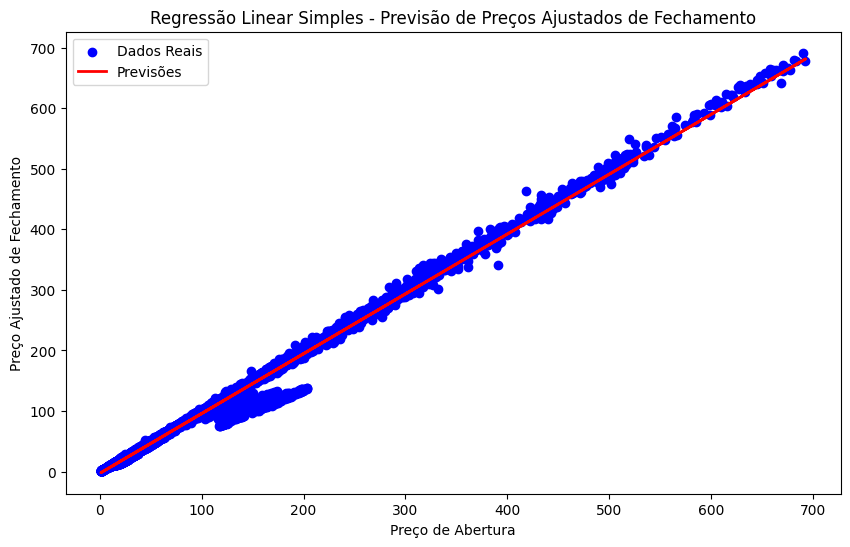

In [ ]:
#import das bibliotecas necessárias

from sklearn.model_selection import train_test_split #para dividir os dados em conjuntos de treinamento e teste
from sklearn.linear_model import LinearRegression #cria uma instância e treina o modelo com os dados de treinamento
from sklearn.metrics import mean_squared_error, r2_score

#preparação dos dados
X = df[['open']]  #variável independente
y = df['adj_close']  #variável dependente

#dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinar o modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

#fazer previsões utilizando o modelo treinado para prever os valores do conjunto de teste
y_pred = model.predict(X_test)

#avaliação do modelo
mse = mean_squared_error(y_test, y_pred) #erro quadrático médio (MSE)
r2 = r2_score(y_test, y_pred)  #coeficiente de determinação (R^2) para avaliar a performance do modelo

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

#visualizar os resultados utilizando matplotlib para criar gráfico que compara os dados reais com as previsões
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsões')
plt.title('Regressão Linear Simples - Previsão de Preços Ajustados de Fechamento')
plt.xlabel('Preço de Abertura')
plt.ylabel('Preço Ajustado de Fechamento')
plt.legend()
plt.show()

Os resultados indicam que o modelo de regressão linear está se ajustando bem aos dados:


*   **Mean Squared Error (MSE):** O valor de 113.36788008864822 representa a média dos quadrados dos erros entre os valores preditos e os valores reais.

Um MSE mais baixo é desejável, indicando que os valores preditos estão próximos dos valores reais.

*   **R^2 Score:** O valor de 0.9893708158396498 está próximo de 1, o que significa que o modelo está explicando 98.94% da variabilidade dos dados em torno da média.

Isso indica um excelente ajuste do modelo.

### Regressão Linear Múltipla

Para prever os preços ajustados de fechamento (adj_close) com mais variáveis independentes que visam melhorar ainda mais a precisão do modelo: preços de abertura, preço em alta, preço em baixa e volume das negociações (open, high, low, volume)

Mean Squared Error: 102.60409330452548
R^2 Score: 0.9903800106124702


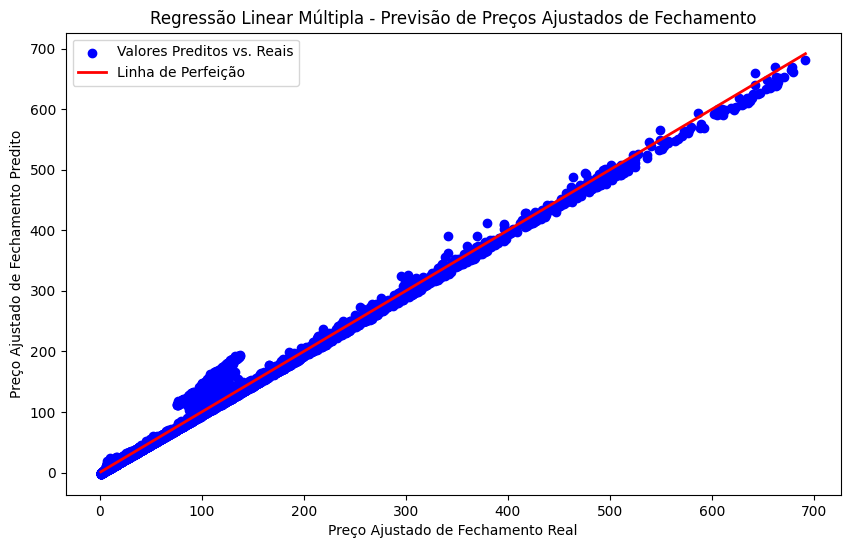

In [ ]:
#preparação dos dados com mais variáveis independentes
X = df[['open', 'high', 'low', 'volume']]  #variáveis adicionais
y = df['adj_close']

#dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinar o modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

#fazer previsões utilizando o modelo treinado para prever os valores do conjunto de teste
y_pred = model.predict(X_test)

#avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

#visualizar os resultados utilizando matplotlib para criar gráfico que compara os dados reais com as previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valores Preditos vs. Reais')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Linha de Perfeição')
plt.title('Regressão Linear Múltipla - Previsão de Preços Ajustados de Fechamento')
plt.xlabel('Preço Ajustado de Fechamento Real')
plt.ylabel('Preço Ajustado de Fechamento Predito')
plt.legend()
plt.show()


*   **Análise Residual**

Para verificar a distribuição dos resíduos (a diferença entre os valores reais e os valores preditos) e garantir que não haja padrões não capturados pelo modelo.

**Os resíduos foram distribuídos aleatoriamente para garantir a qualidade do modelo.**

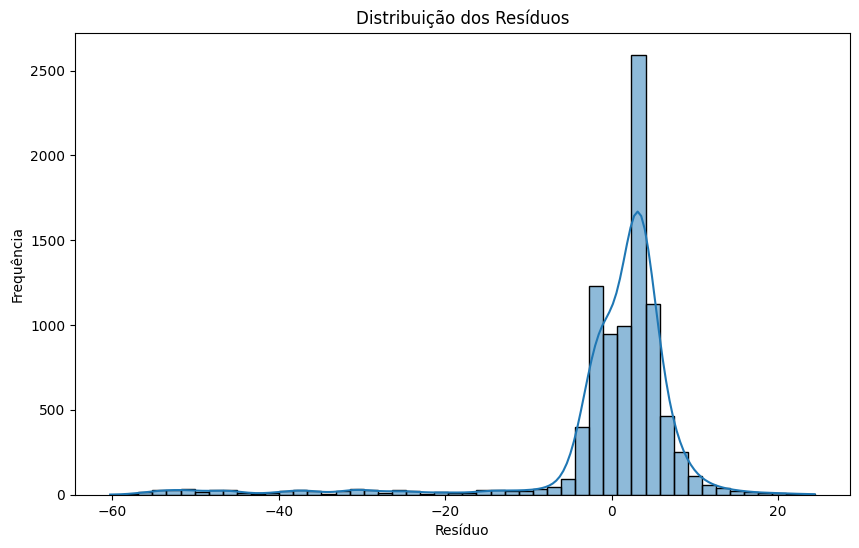

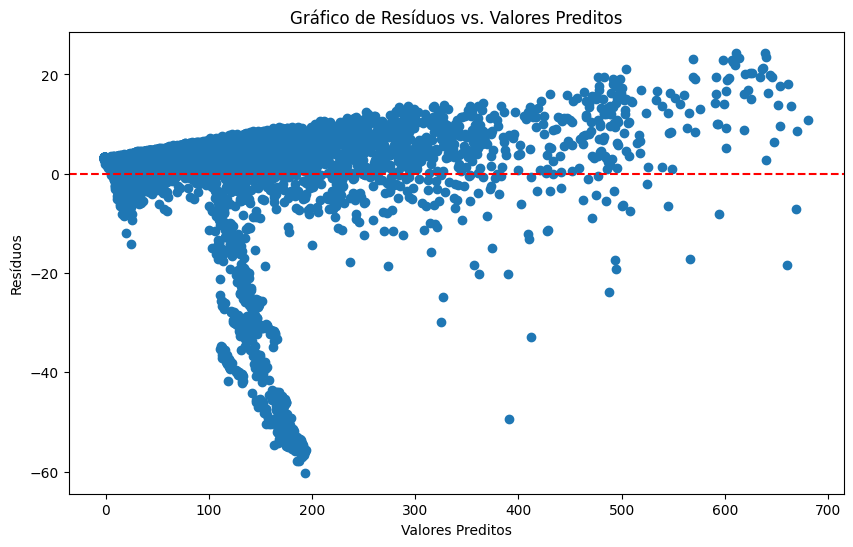

In [ ]:
#calcular os resíduos
residuals = y_test - y_pred

#visualizar os resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()

# Gráfico de Resíduos vs. Valores Preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos vs. Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()


*   **Validação Cruzada**

Verifica a estabilidade e a generalização para garantir que o modelo não esteja superajustado aos dados de treinamento.

**A validação cruzada confirma a estabilidade do modelo, assegurando que ele não esteja superajustado aos dados de treinamento.**

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Scores de Validação Cruzada: {cv_scores}')
print(f'Média dos Scores de Validação Cruzada: {cv_scores.mean()}')


Scores de Validação Cruzada: [0.99570864 0.99519486 0.65734819 0.99640925 0.99699569]
Média dos Scores de Validação Cruzada: 0.9283313251914904


Os resultados da validação cruzada mostram a performance do modelo em diferentes subconjuntos dos dados, ajudando a avaliar sua estabilidade e generalização.

A maioria dos scores estão acima de 0.99, indicando um excelente ajuste na maioria dos subconjuntos de dados.
No entanto, um dos scores é significativamente menor, 0.65734819, indicando que o modelo teve um desempenho pior em um dos subconjuntos de dados.


*   **Excelente Desempenho Geral:**

A média dos scores de validação cruzada é alta (0.928), indicando que o modelo, em geral, tem um bom desempenho na previsão dos preços ajustados de fechamento das ações.

A maioria dos scores individuais estão acima de 0.99, o que mostra que o modelo é altamente preciso na maioria dos casos.

*   **Inconsistência em Alguns Subconjuntos:**

O score significativamente menor (0.65734819) sugere que o modelo pode estar superajustado aos dados de treinamento e pode não generalizar bem para todos os subconjuntos de dados.

Essa inconsistência pode ser devida a variabilidade nos dados e/ou falta de algumas variáveis explicativas.



*   Analisar o Subconjunto com Desempenho Baixo
*   Ajustes no Modelo






In [ ]:
#Análise do Subconjunto com Baixo Desempenho:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    if score < 0.7:
        # Analisar este subconjunto
        print("Subconjunto com baixo desempenho:")
        print(X_test)
        print(y_test)


In [ ]:
#Aplicar Regularização:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f'Scores de Validação Cruzada com Ridge: {scores}')
print(f'Média dos Scores de Validação Cruzada com Ridge: {scores.mean()}')

Scores de Validação Cruzada com Ridge: [0.99570863 0.99519486 0.65734817 0.99640928 0.99699571]
Média dos Scores de Validação Cruzada com Ridge: 0.9283313311400538


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.47507e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


**Os resultados com a Ridge Regression são praticamente idênticos aos obtidos anteriormente com a regressão linear simples, sugerindo que a regularização não teve um impacto significativo na melhoria do desempenho do modelo.**